##### Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("Covid Data.csv")

##### Understanding the Dataset

In [ ]:
df.shape

(57970, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57970 entries, 0 to 57969
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   USMER                 57970 non-null  int64  
 1   MEDICAL_UNIT          57970 non-null  int64  
 2   SEX                   57970 non-null  int64  
 3   PATIENT_TYPE          57970 non-null  int64  
 4   DATE_DIED             57970 non-null  object 
 5   INTUBED               57970 non-null  int64  
 6   PNEUMONIA             57970 non-null  int64  
 7   AGE                   57970 non-null  int64  
 8   PREGNANT              57970 non-null  int64  
 9   DIABETES              57970 non-null  int64  
 10  COPD                  57970 non-null  int64  
 11  ASTHMA                57970 non-null  int64  
 12  INMSUPR               57970 non-null  int64  
 13  HIPERTENSION          57970 non-null  int64  
 14  OTHER_DISEASE         57970 non-null  int64  
 15  CARDIOVASCULAR     

In [ ]:
df.describe(include="number")

USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  57970.000000  57970.000000  57970.000000  57970.000000  57970.000000   
mean       1.448560      3.655580      1.580128      1.686096     33.118561   
std        0.497351      0.497251      0.493542      0.464082     44.900113   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      3.000000      1.000000      1.000000      1.000000   
50%        1.000000      4.000000      2.000000      2.000000      2.000000   
75%        2.000000      4.000000      2.000000      2.000000     97.000000   
max        2.000000      4.000000      2.000000      2.000000     99.000000   

          PNEUMONIA           AGE      PREGNANT     DIABETES          COPD  \
count  57970.000000  57970.000000  57970.000000  57970.00000  57970.000000   
mean       2.813783     55.716198     57.147714      1.91330      2.165085   
std       11.089993     17.717496     46.883671      4.47194      4.459524   
min        1.000000      0.000000      1.000000      1.00000      1.000000   
25%        1.000000     44.000000      2.000000      1.00000      2.000000   
50%        2.000000     57.000000     97.000000      2.00000      2.000000   
75%        2.000000     69.000000     97.000000      2.00000      2.000000   
max       99.000000    107.000000     98.000000     98.00000     98.000000   

             ASTHMA       INMSUPR  HIPERTENSION  OTHER_DISEASE  \
count  57970.000000  57970.000000  57970.000000   57970.000000   
mean       2.182560      2.182370      1.820804       2.174452   
std        4.456883      4.528423      4.144233       4.737616   
min        1.000000      1.000000      1.000000       1.000000   
25%        2.000000      2.000000      1.000000       2.000000   
50%        2.000000      2.000000      2.000000       2.000000   
75%        2.000000      2.000000      2.000000       2.000000   
max       98.000000     98.000000     98.000000      98.000000   

       CARDIOVASCULAR       OBESITY  RENAL_CHRONIC       TOBACCO  \
count    57970.000000  57970.000000   57969.000000  57969.000000   
mean         2.165620      1.885130       2.134054      2.158274   
std          4.513154      2.795046       4.409773      4.790499   
min          1.000000      1.000000       1.000000      1.000000   
25%          2.000000      2.000000       2.000000      2.000000   
50%          2.000000      2.000000       2.000000      2.000000   
75%          2.000000      2.000000       2.000000      2.000000   
max         98.000000     98.000000      98.000000     98.000000   

       CLASIFFICATION_FINAL           ICU  
count          57969.000000  57969.000000  
mean               4.398230     33.375080  
std                1.845249     44.739116  
min                1.000000      1.000000  
25%                3.000000      2.000000  
50%                3.000000      2.000000  
75%                7.000000     97.000000  
max                7.000000     99.000000

In [ ]:
df.describe(include="object")

DATE_DIED
count        57970
unique         238
top     9999-99-99
freq         17993

In [ ]:
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   
5      2             1    1             2  9999-99-99        2          1   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   
5   40         2         2  ...       2        2             2              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL   ICU  
0               2        2            2.0      2.0                   3.0  97.0  
1               2        1            1.0      2.0                   5.0  97.0  
2               2        2            2.0      2.0                   3.0   2.0  
3               2        2            2.0      2.0                   7.0  97.0  
4               2        2            2.0      2.0                   3.0  97.0  
5               2        2            2.0      2.0                   3.0   2.0  

[6 rows x 21 columns]

##### Missing Values, Outliers, and Type Casting

In [ ]:
# Replacing 97, 98, and 99 with null
missing_values = (97, 98, 99)
df.replace(missing_values, np.nan, inplace=True)
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      NaN        1.0   
1      2             1    2             1  03/06/2020      NaN        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   
5      2             1    1             2  9999-99-99      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0      2.0           1.0   
1  72.0       NaN       2.0  ...     2.0      2.0           1.0   
2  55.0       NaN       1.0  ...     2.0      2.0           2.0   
3  53.0       2.0       2.0  ...     2.0      2.0           2.0   
4  68.0       NaN       1.0  ...     2.0      2.0           1.0   
5  40.0       2.0       2.0  ...     2.0      2.0           2.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0   
1            2.0             2.0      1.0            1.0      2.0   
2            2.0             2.0      2.0            2.0      2.0   
3            2.0             2.0      2.0            2.0      2.0   
4            2.0             2.0      2.0            2.0      2.0   
5            2.0             2.0      2.0            2.0      2.0   

   CLASIFFICATION_FINAL  ICU  
0                   3.0  NaN  
1                   5.0  NaN  
2                   3.0  2.0  
3                   7.0  NaN  
4                   3.0  NaN  
5                   3.0  2.0  

[6 rows x 21 columns]

In [ ]:
# Replacing the date 9999-99-99 with null
missing_values = "9999-99-99"
df.replace(missing_values, np.nan, inplace=True)
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      NaN        1.0   
1      2             1    2             1  03/06/2020      NaN        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   
5      2             1    1             2         NaN      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0      2.0           1.0   
1  72.0       NaN       2.0  ...     2.0      2.0           1.0   
2  55.0       NaN       1.0  ...     2.0      2.0           2.0   
3  53.0       2.0       2.0  ...     2.0      2.0           2.0   
4  68.0       NaN       1.0  ...     2.0      2.0           1.0   
5  40.0       2.0       2.0  ...     2.0      2.0           2.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0   
1            2.0             2.0      1.0            1.0      2.0   
2            2.0             2.0      2.0            2.0      2.0   
3            2.0             2.0      2.0            2.0      2.0   
4            2.0             2.0      2.0            2.0      2.0   
5            2.0             2.0      2.0            2.0      2.0   

   CLASIFFICATION_FINAL  ICU  
0                   3.0  NaN  
1                   5.0  NaN  
2                   3.0  2.0  
3                   7.0  NaN  
4                   3.0  NaN  
5                   3.0  2.0  

[6 rows x 21 columns]

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
CLASIFFICATION_FINAL        1
OBESITY                    48
AGE                        63
HIPERTENSION              106
RENAL_CHRONIC             123
DIABETES                  124
ASTHMA                    125
COPD                      125
CARDIOVASCULAR            128
INMSUPR                   129
OTHER_DISEASE             141
TOBACCO                   145
PNEUMONIA                 759
DATE_DIED               17993
INTUBED                 19128
ICU                     19140
PREGNANT                33653
dtype: int64

In [ ]:
# Missing values of DATE_DIED represents alive patients
# Missing values of AGE can be removed
# Missing values of PNEUMONIA, PREGNANT, INTUBED, and ICU should be kept
df.dropna(subset=["AGE"], inplace=True)

<Axes: xlabel='AGE'>

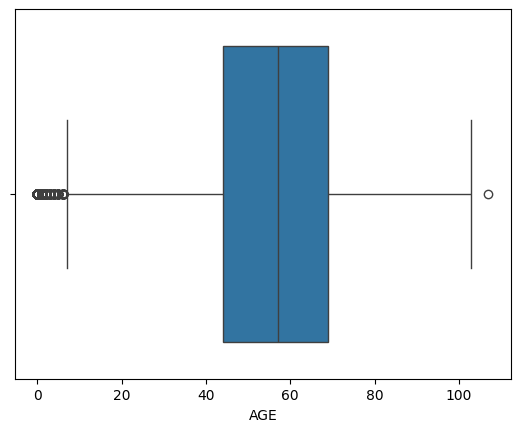

In [ ]:
# Checking for outliers in "AGE" column
sns.boxplot(x=df["AGE"])

<Axes: xlabel='AGE'>

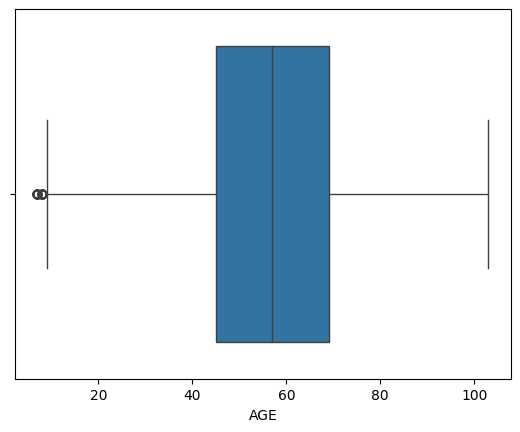

In [ ]:
# Removing the outliers in "AGE" column
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['AGE'] >= lower_bound) & (df['AGE'] <= upper_bound)]
sns.boxplot(x=df["AGE"])

In [ ]:
# Changing DATE_DIED string format to date format
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], format="%d/%m/%y", errors='ignore')

##### EDA

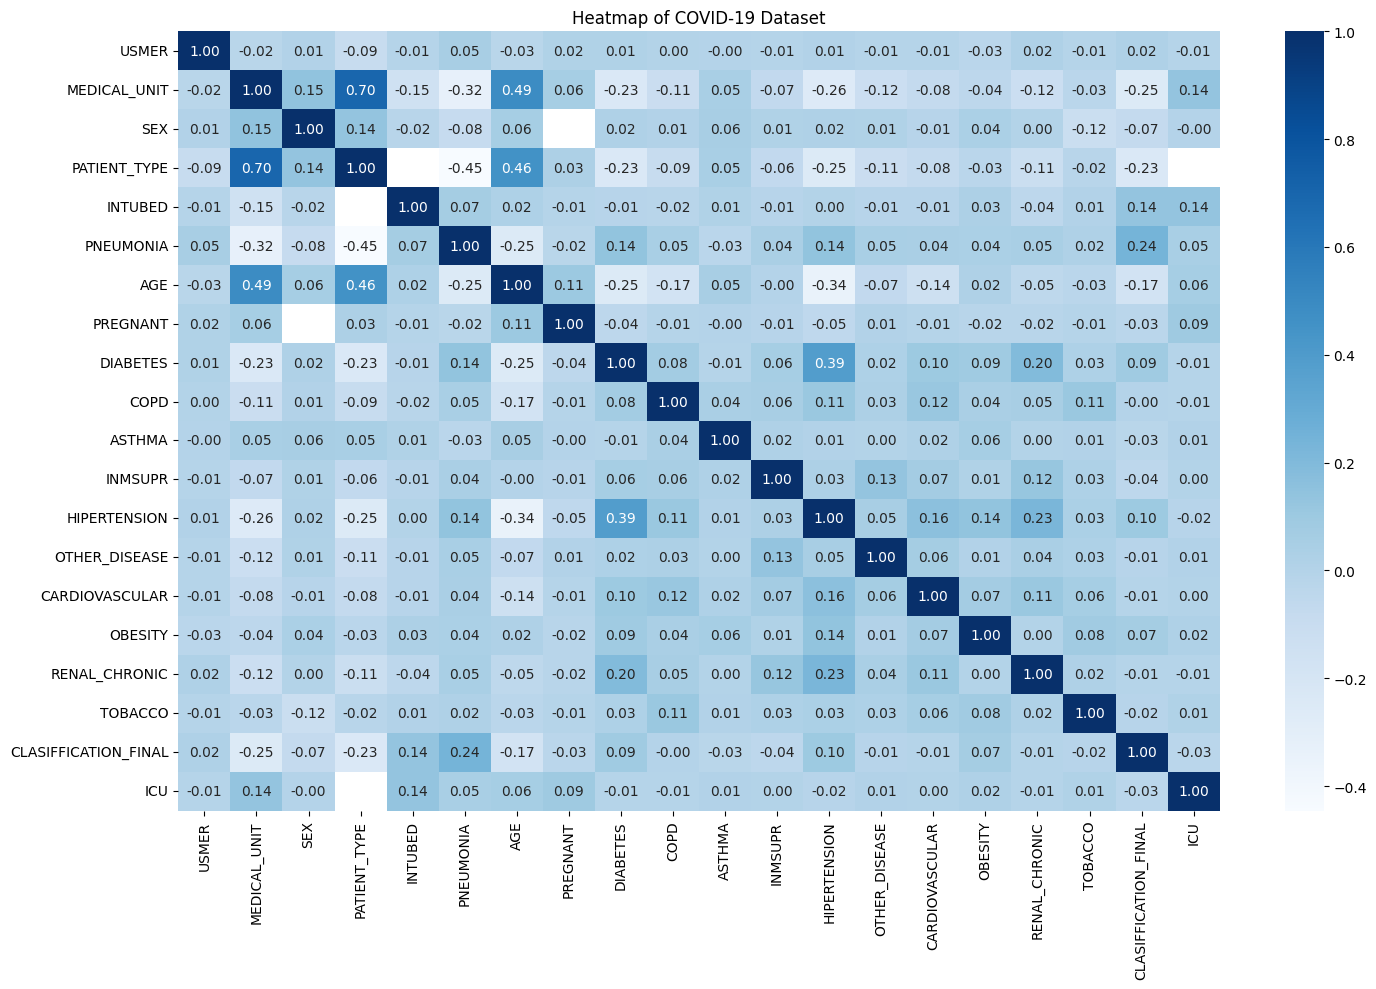

In [ ]:
# Plotting heatmap to find correlations in the dataset
plt.figure(figsize=(15, 10))
corr = df.drop("DATE_DIED", axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f",cmap="Blues")
plt.title("Heatmap of COVID-19 Dataset")
plt.tight_layout()
plt.show()

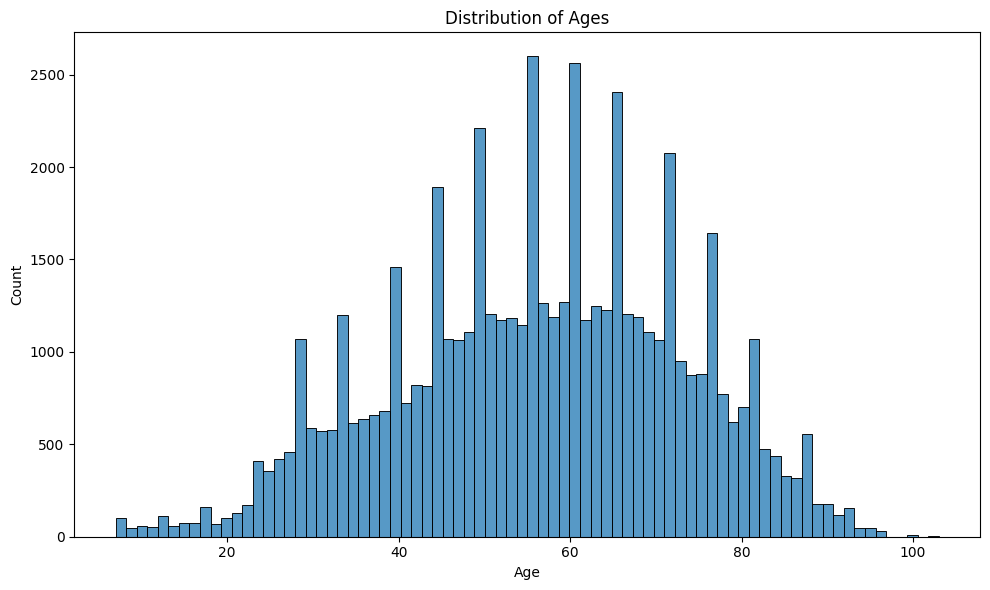

In [ ]:
# Plotting the distribution of ages infected with COVID-19
plt.figure(figsize=(10, 6))
sns.histplot(df["AGE"])
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

<ipython-input-17-a7198f6ca9c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=classification, x="CLASIFFICATION_FINAL", y="count", palette="viridis")


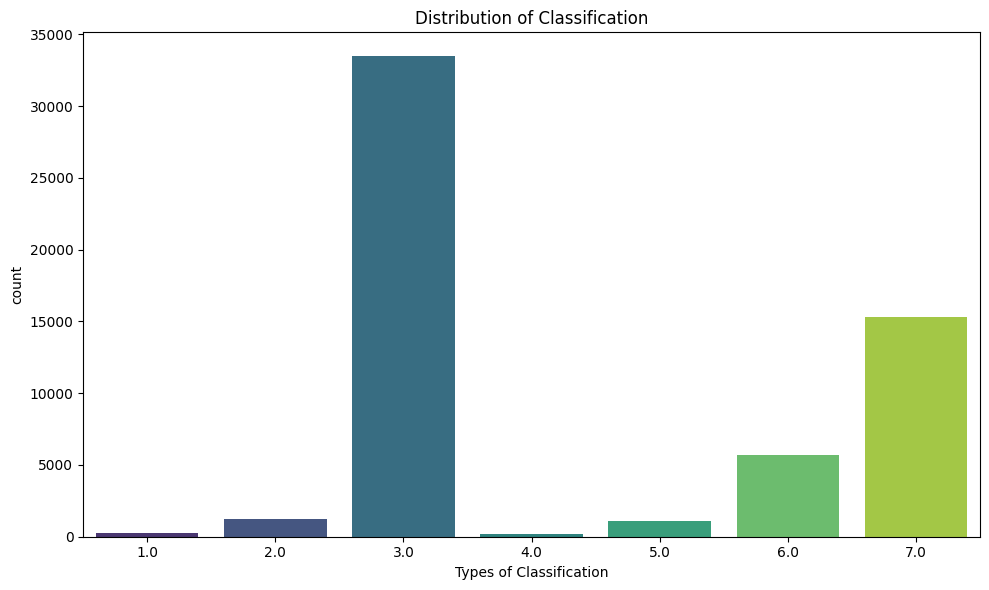

In [ ]:
# Plotting the distribution of all classification types
# Class 1-3: Diagnosed with COVID-19 in different severity
# Class 4-7: Not a carrier of COVID-19 or that the test was inconclusive
plt.figure(figsize=(10, 6))
classification = df["CLASIFFICATION_FINAL"].value_counts().reset_index()
sns.barplot(data=classification, x="CLASIFFICATION_FINAL", y="count", palette="viridis")
plt.title("Distribution of Classification")
plt.xlabel("Types of Classification")
plt.tight_layout()
plt.show()

<ipython-input-18-03e46b4cd109>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=patient_type, x="PATIENT_TYPE", y="count", palette="RdBu")


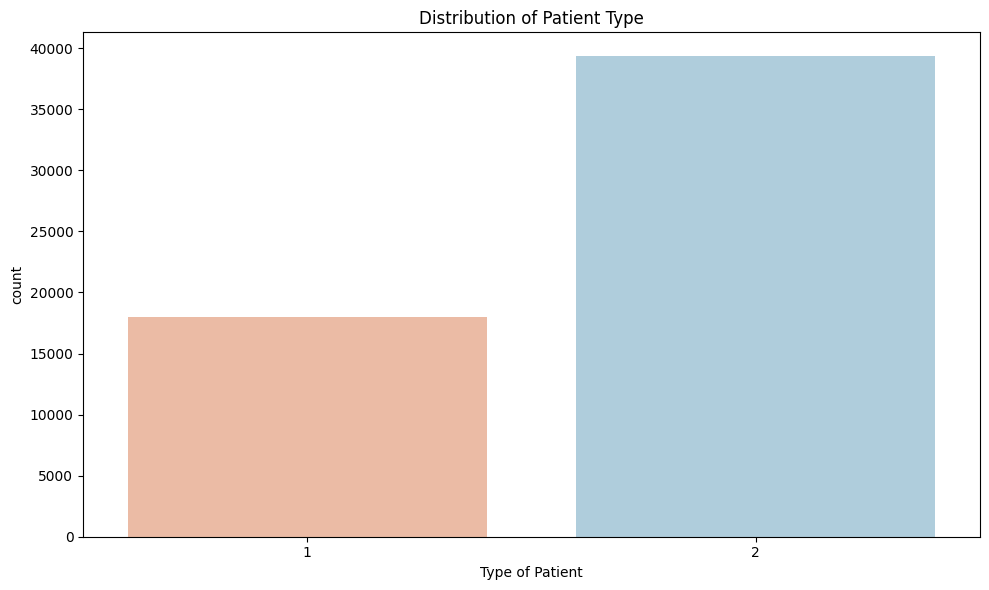

In [ ]:
# Plotting the distribution of patient types
# 1: Patient returned home
# 2: Patient is hospitalized
plt.figure(figsize=(10, 6))
patient_type = df["PATIENT_TYPE"].value_counts().reset_index()
sns.barplot(data=patient_type, x="PATIENT_TYPE", y="count", palette="RdBu")
plt.title("Distribution of Patient Type")
plt.xlabel("Type of Patient")
plt.tight_layout()
plt.show()

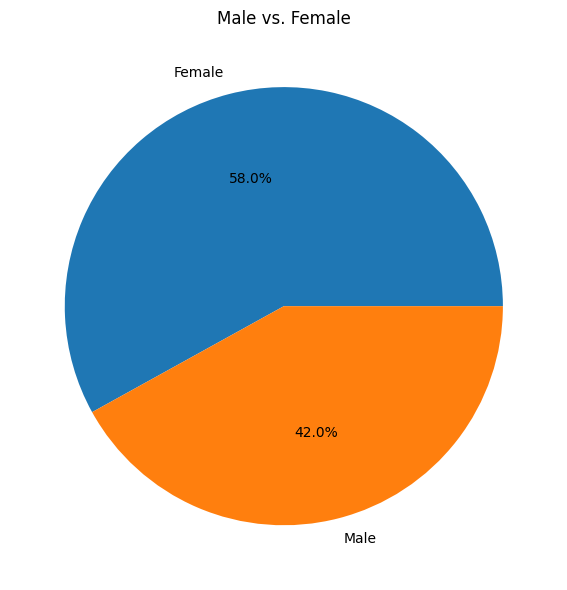

In [ ]:
# Plotting the percentage of male vs. female
plt.figure(figsize=(10, 6))
gender = df["SEX"].value_counts().reset_index()
labels = ["Female", "Male"]
plt.pie(gender["count"], labels=labels, autopct="%1.1f%%")
plt.title("Male vs. Female")
plt.tight_layout()
plt.show()

<ipython-input-20-164cc8a0691a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["DATE_DIED"].fillna("Alive", inplace=True)
<ipython-input-20-164cc8a0691a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["DATE_DIED"].replace(unique, "Dead", inplace=True)


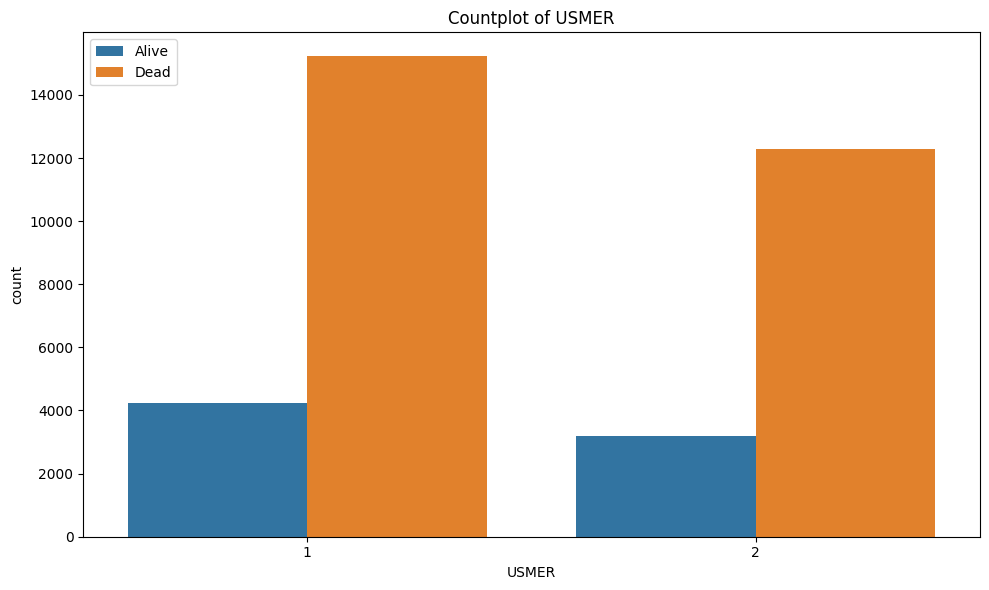

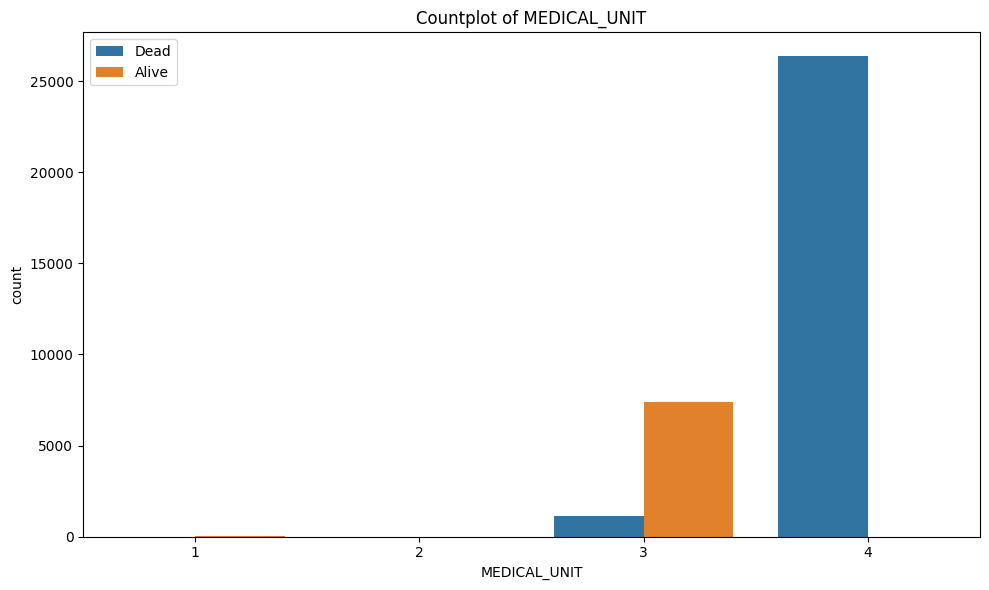

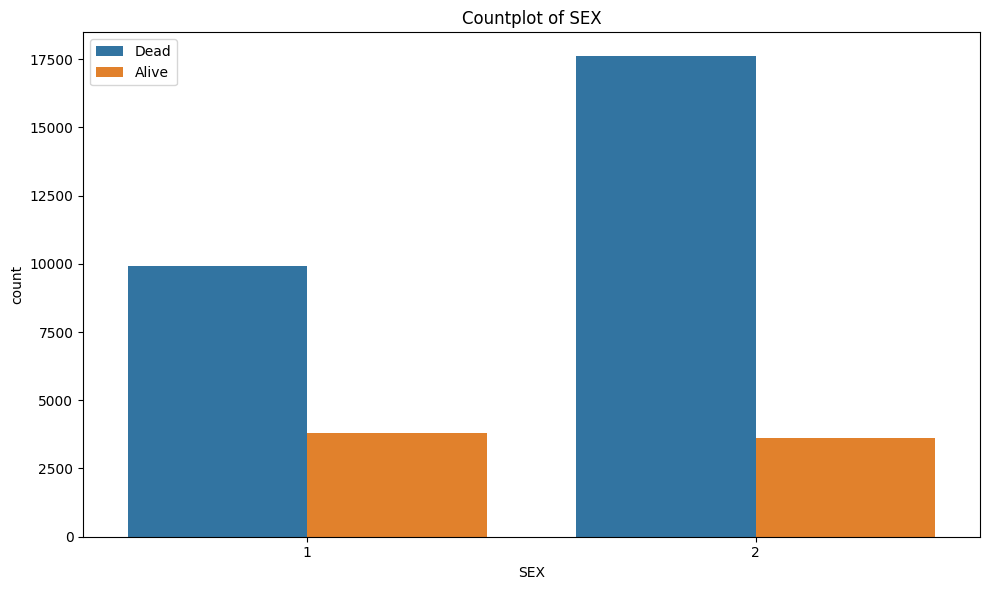

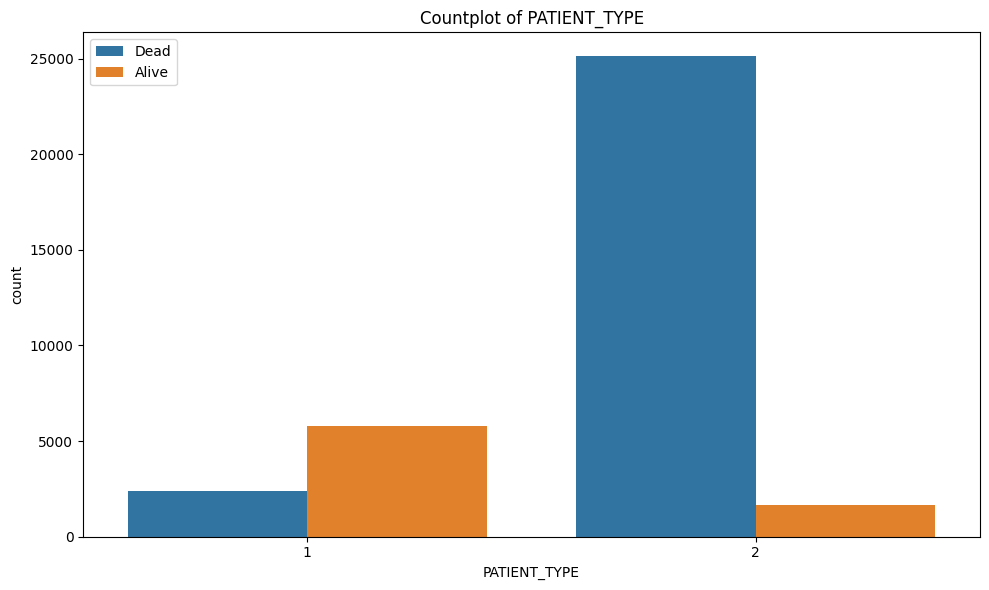

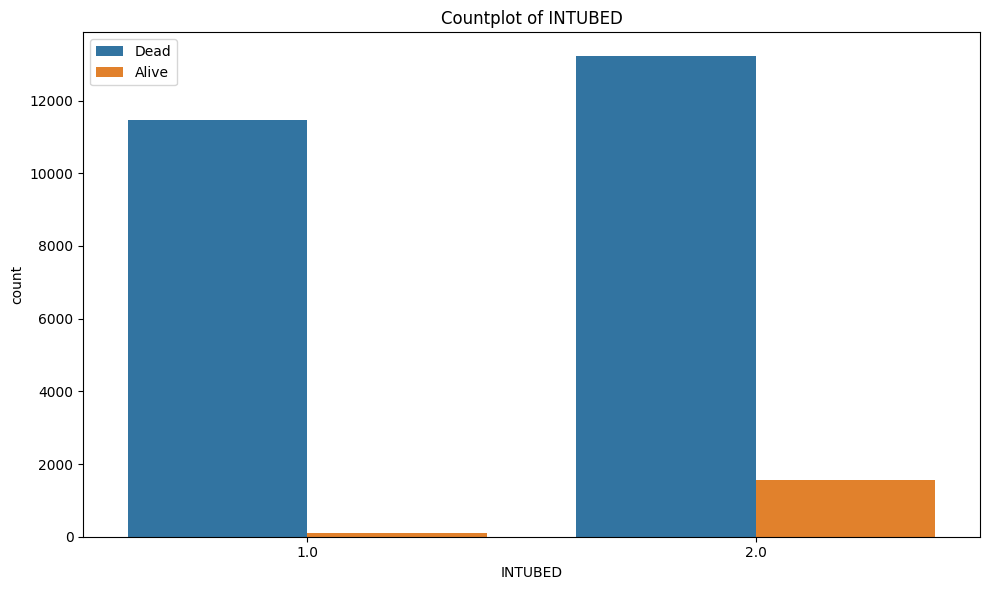

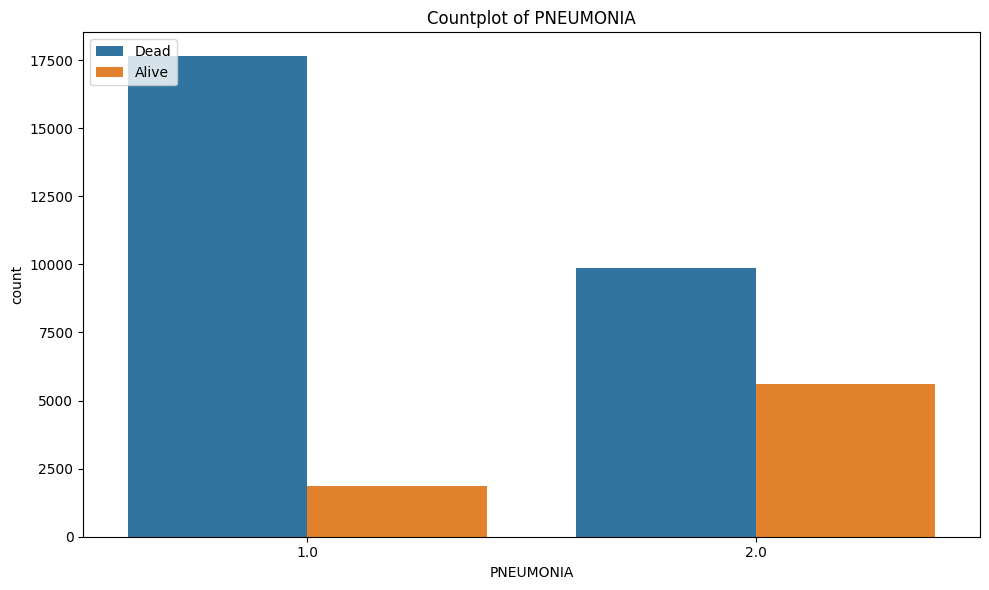

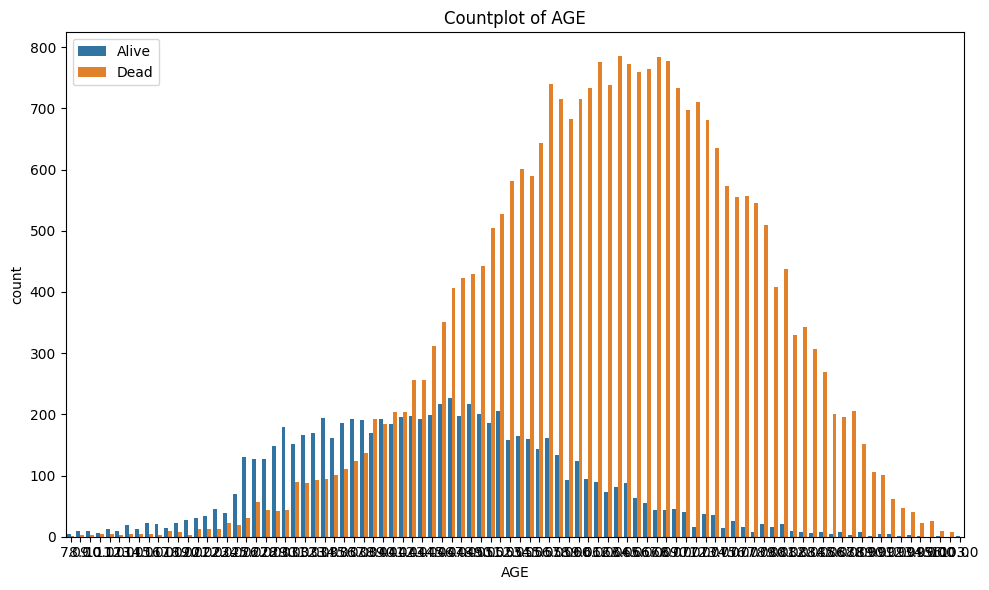

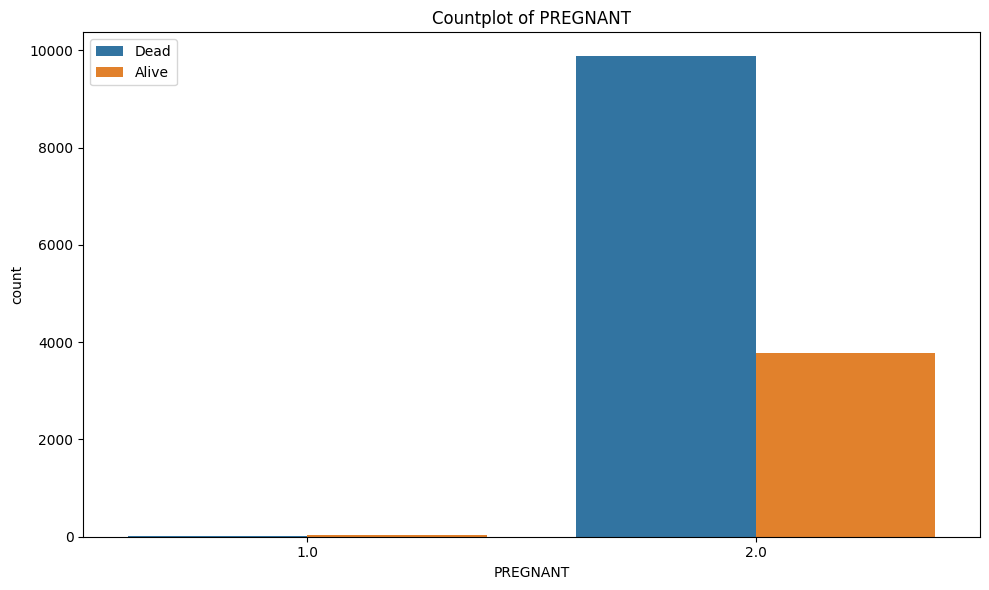

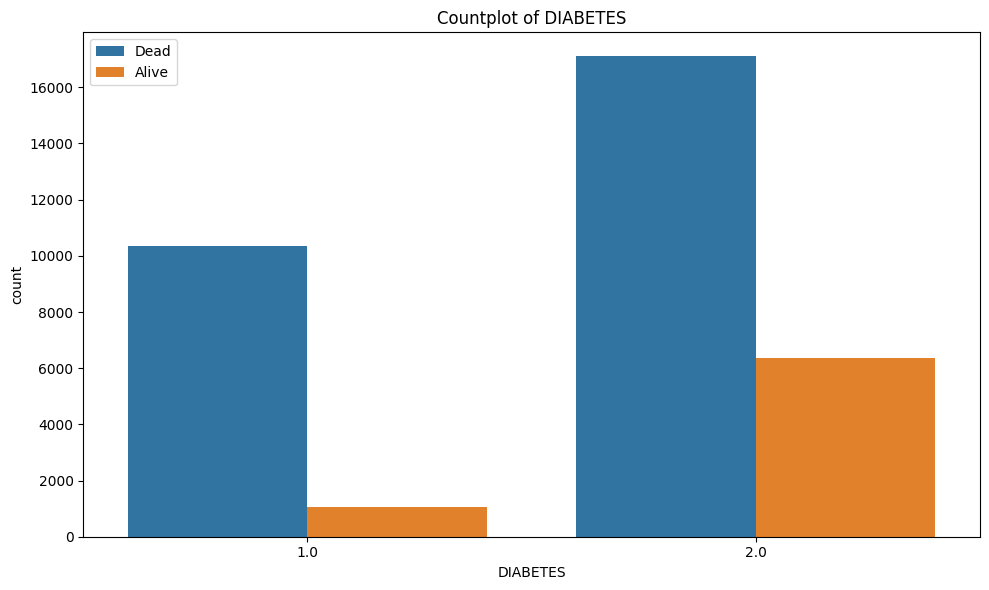

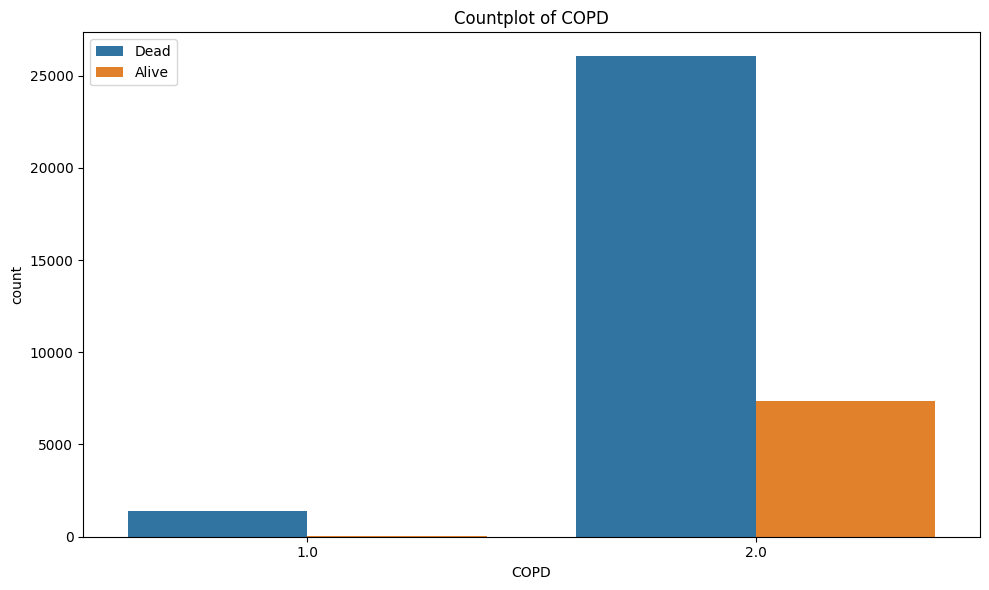

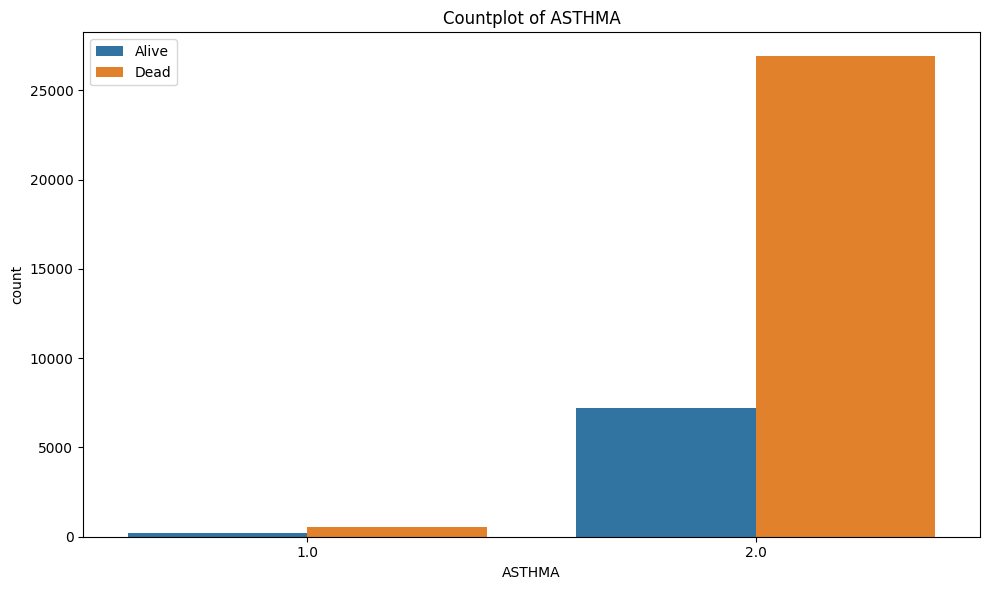

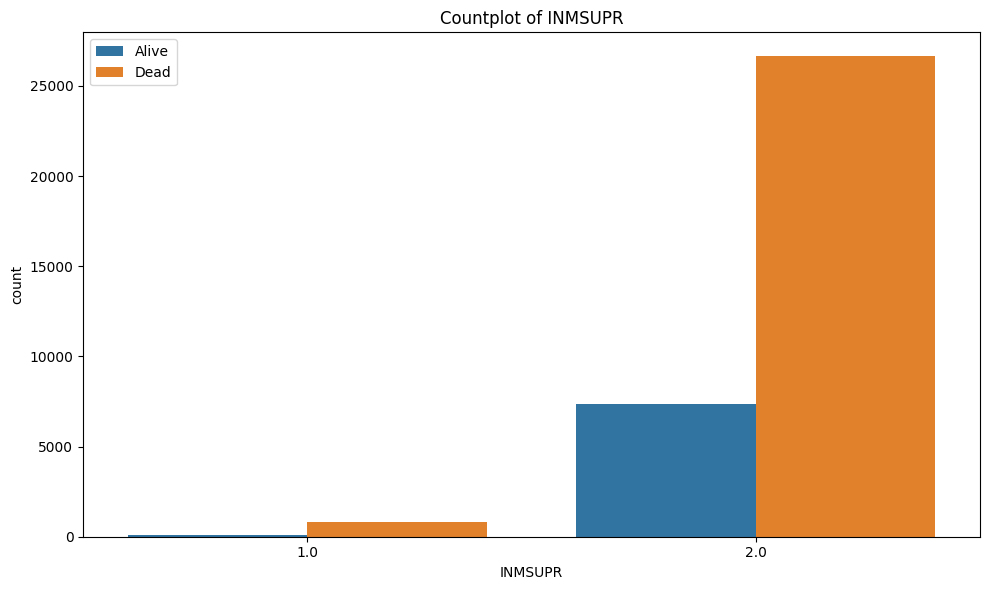

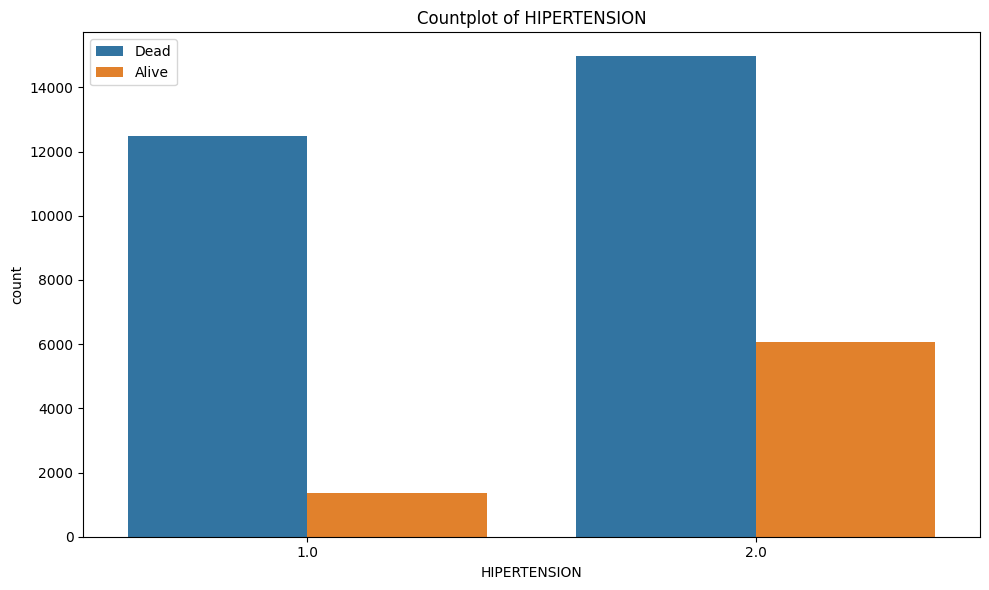

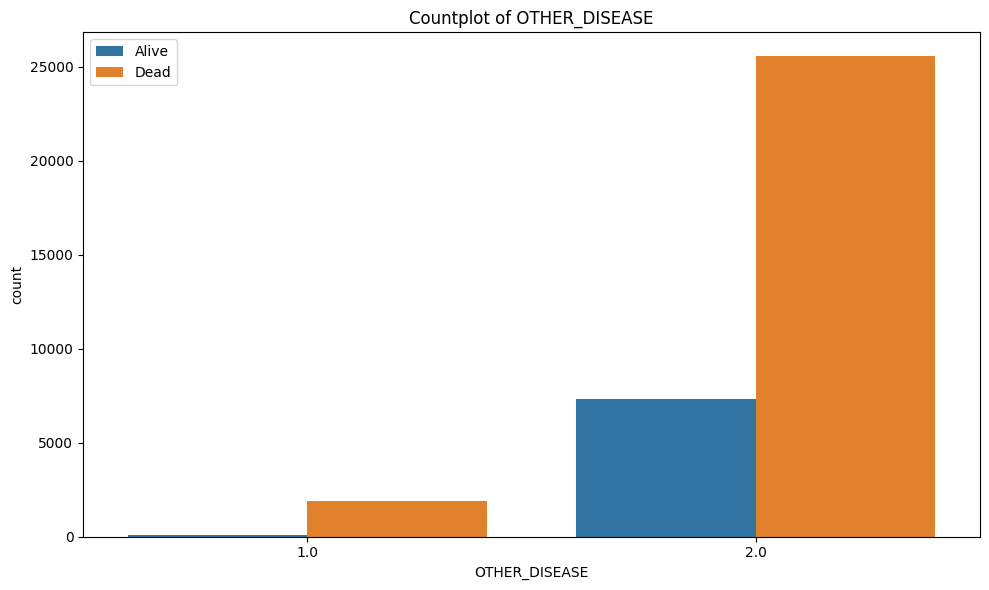

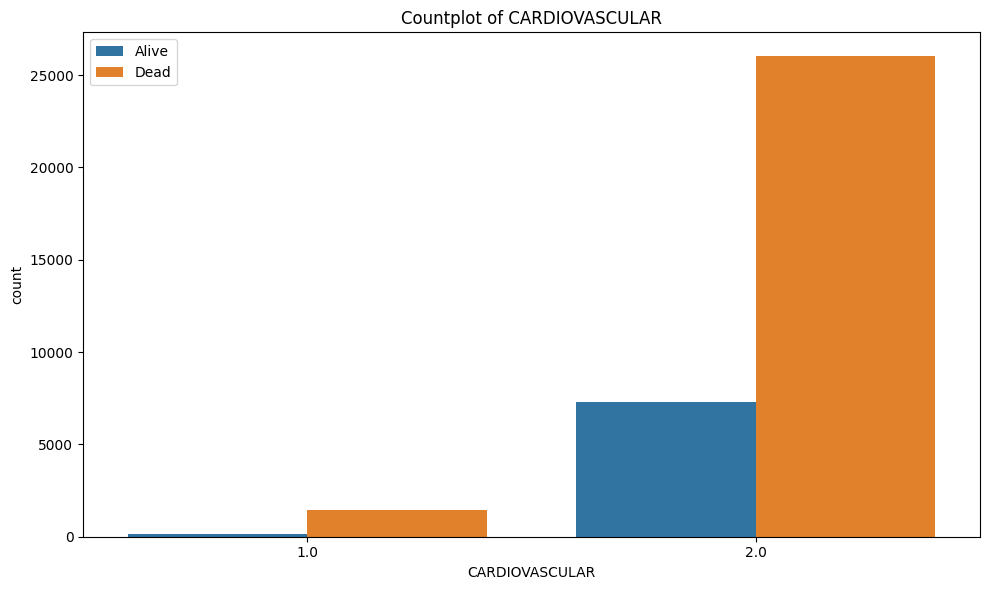

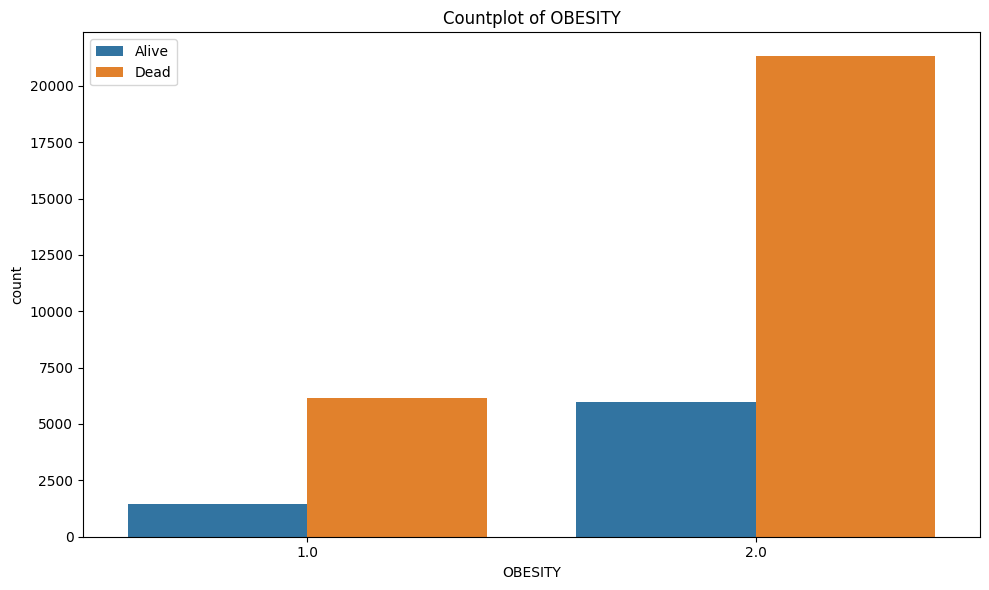

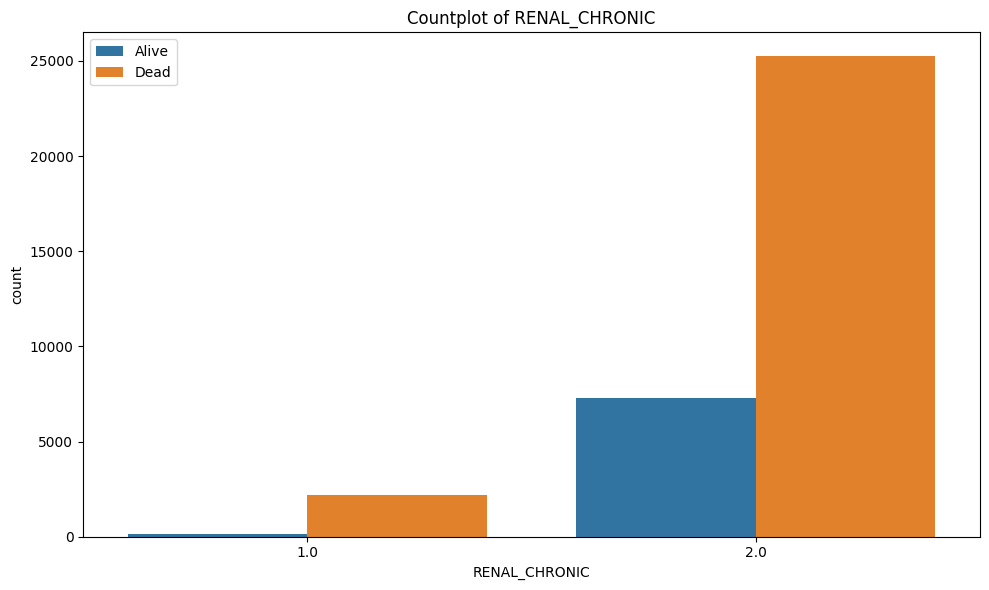

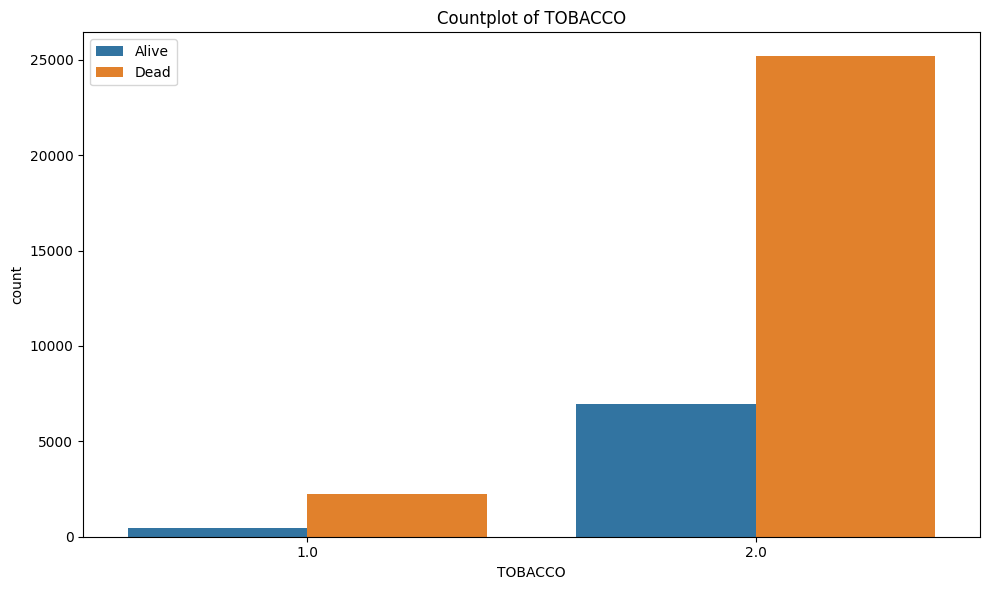

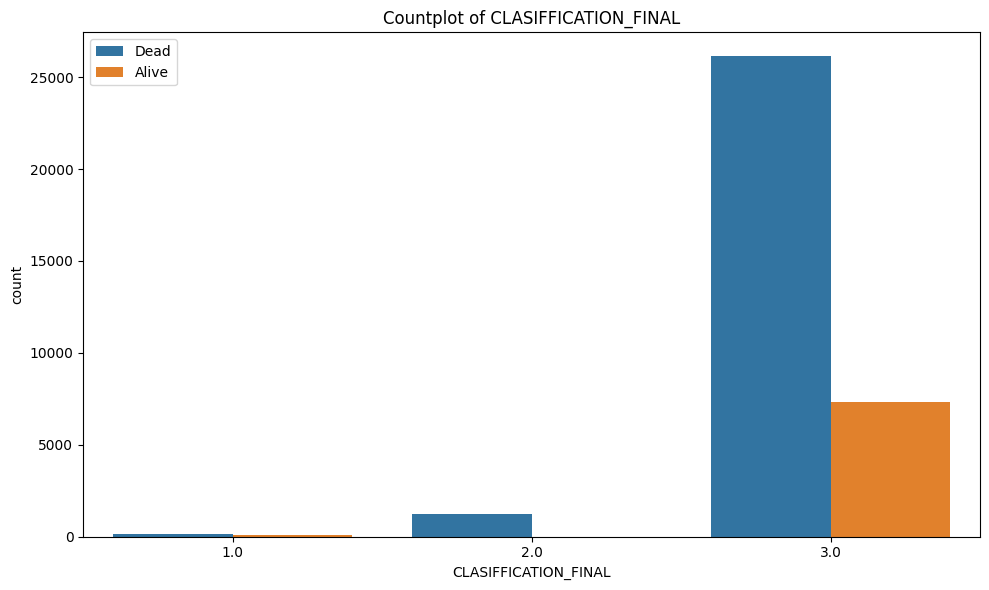

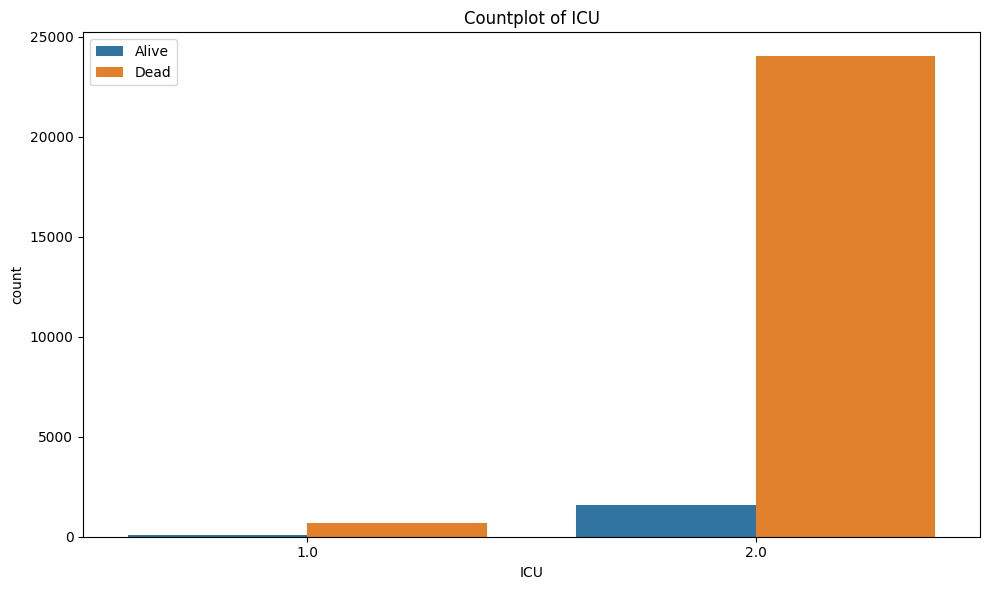

In [ ]:
# Countplot of all symptoms & other health problems by number of alive and dead
died = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])]
unique = died["DATE_DIED"].unique()
died["DATE_DIED"].fillna("Alive", inplace=True)
died["DATE_DIED"].replace(unique, "Dead", inplace=True)

symptoms = ["USMER", "MEDICAL_UNIT", "SEX", "PATIENT_TYPE", "INTUBED", "PNEUMONIA",
            "AGE", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE",
            "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "CLASIFFICATION_FINAL", "ICU"]

for symptom in symptoms:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=died[symptom],hue=died["DATE_DIED"])
  plt.title(f"Countplot of {symptoms[symptoms.index(symptom)]}")
  plt.legend(loc="upper left")
  plt.tight_layout()
  plt.show()

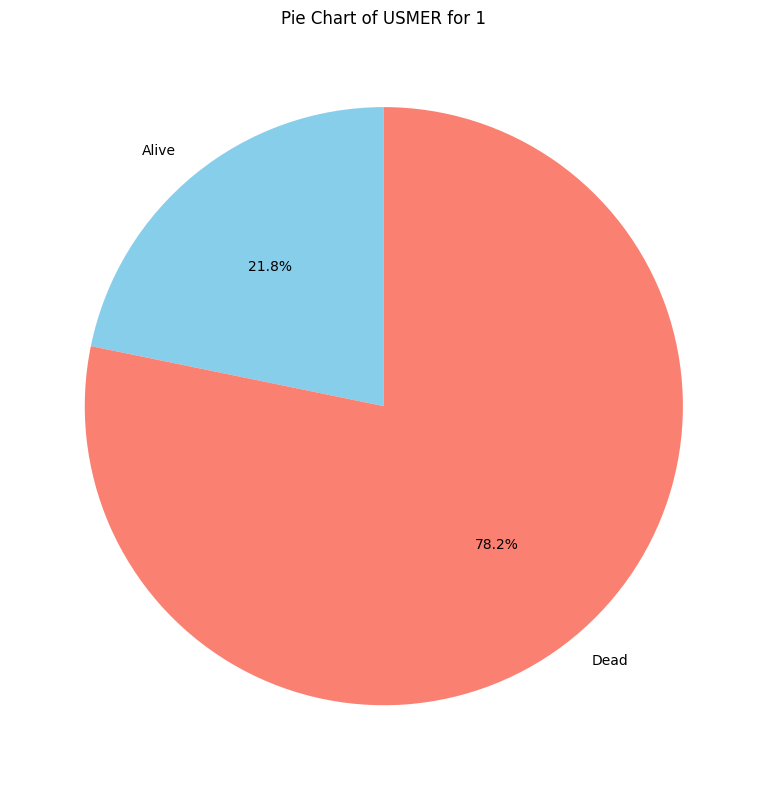

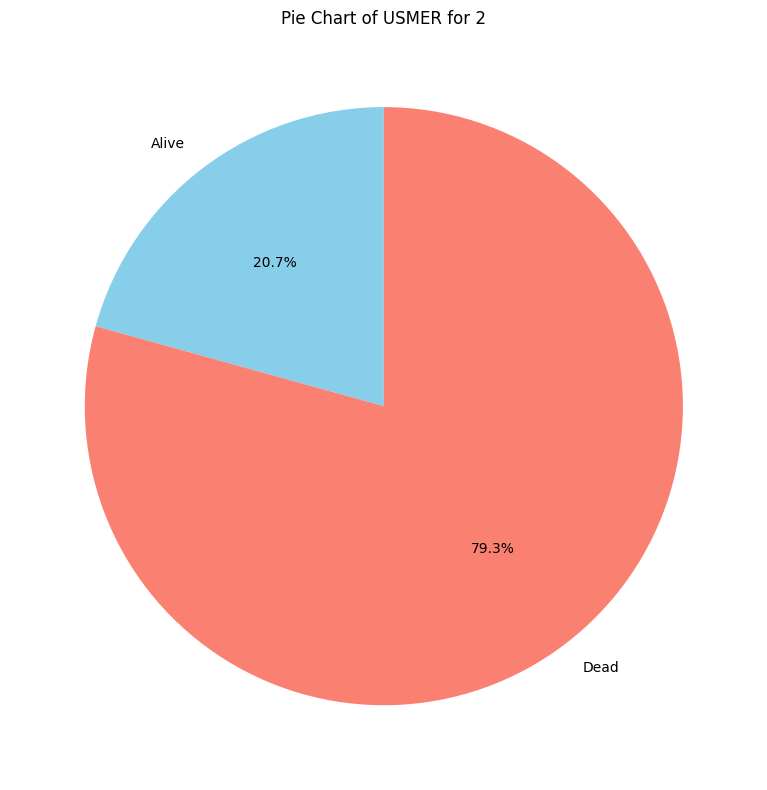

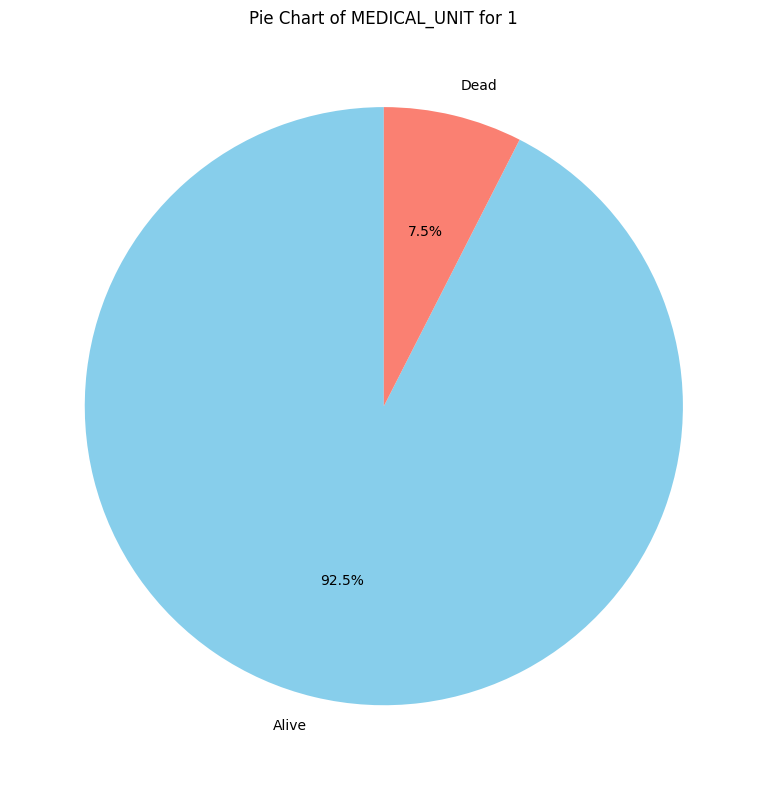

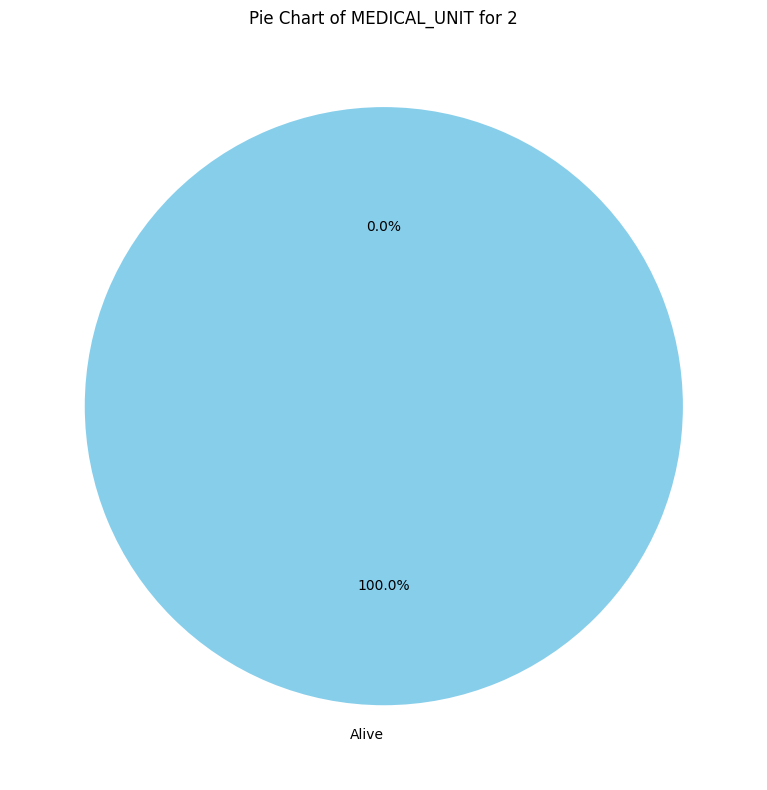

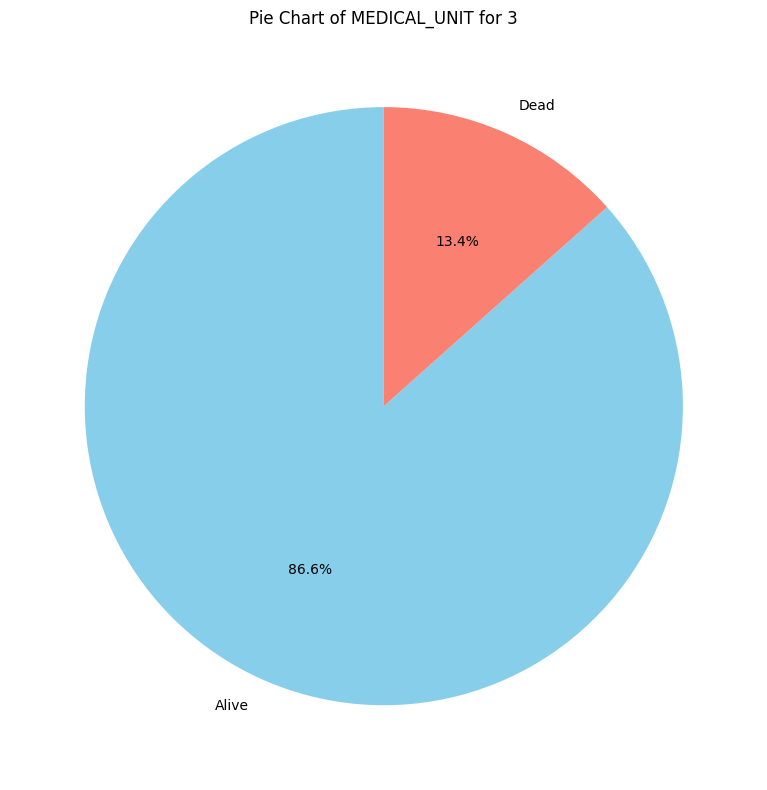

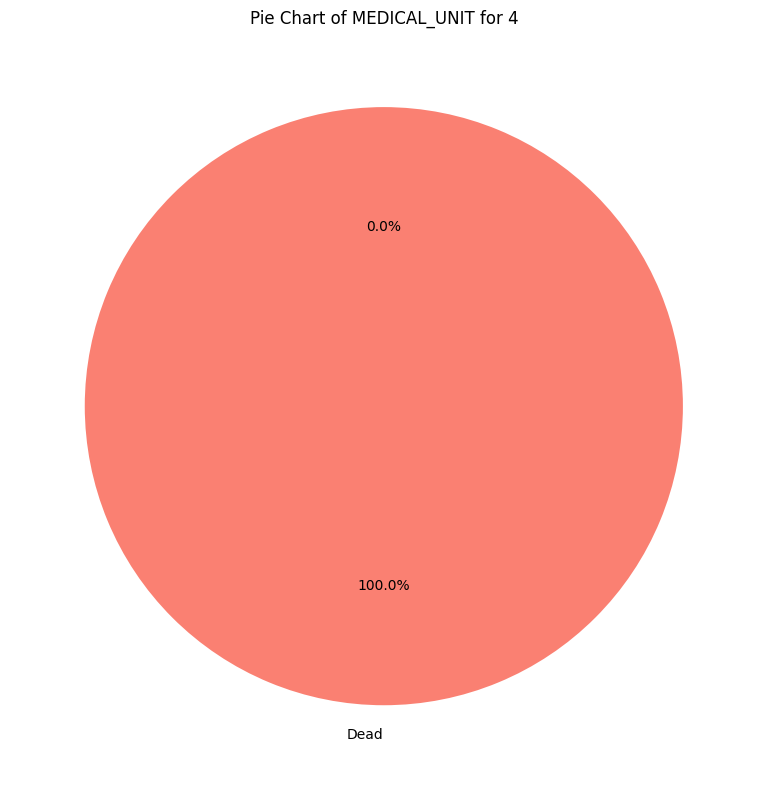

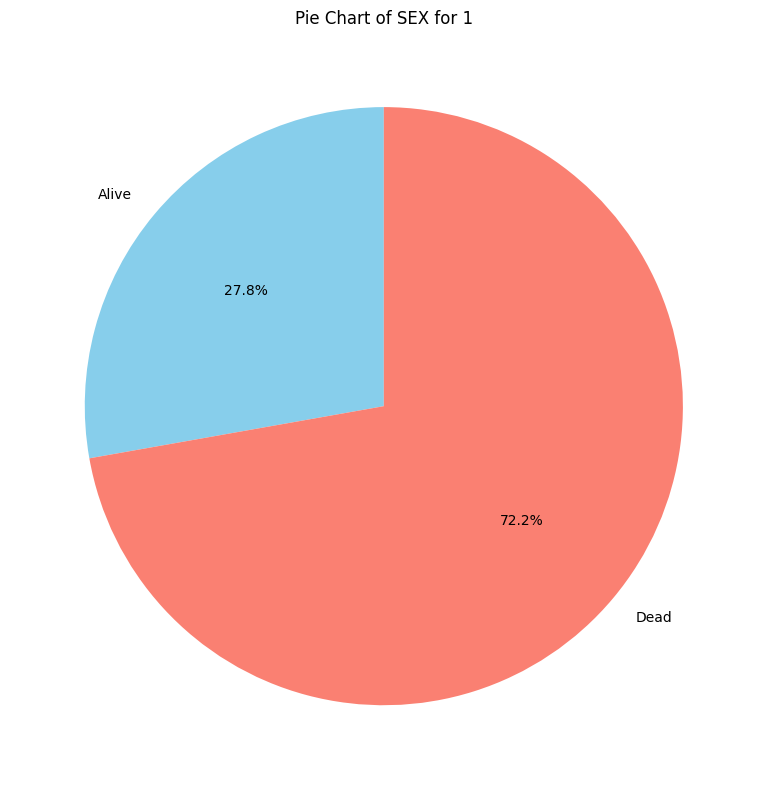

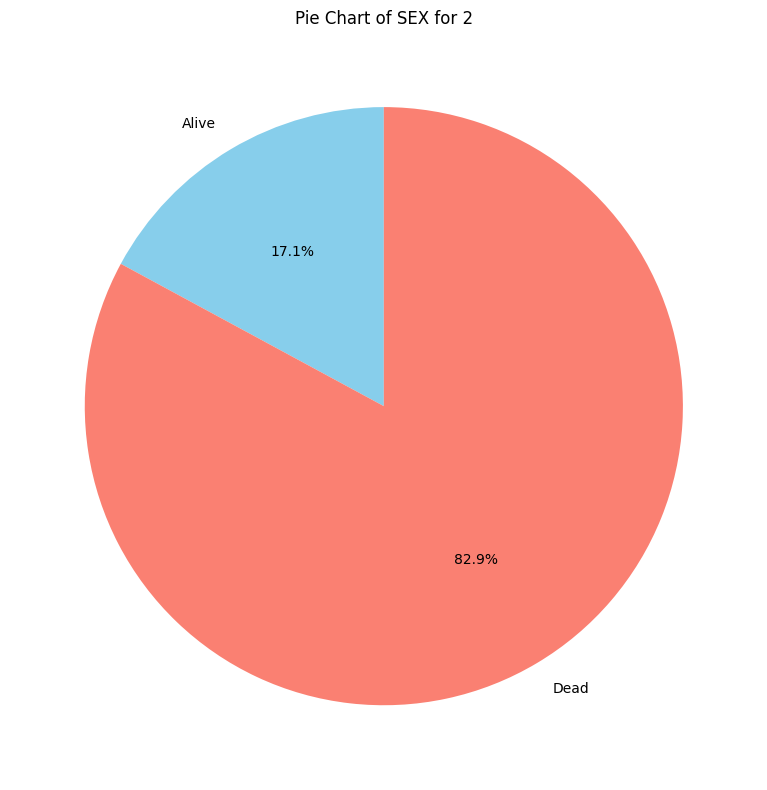

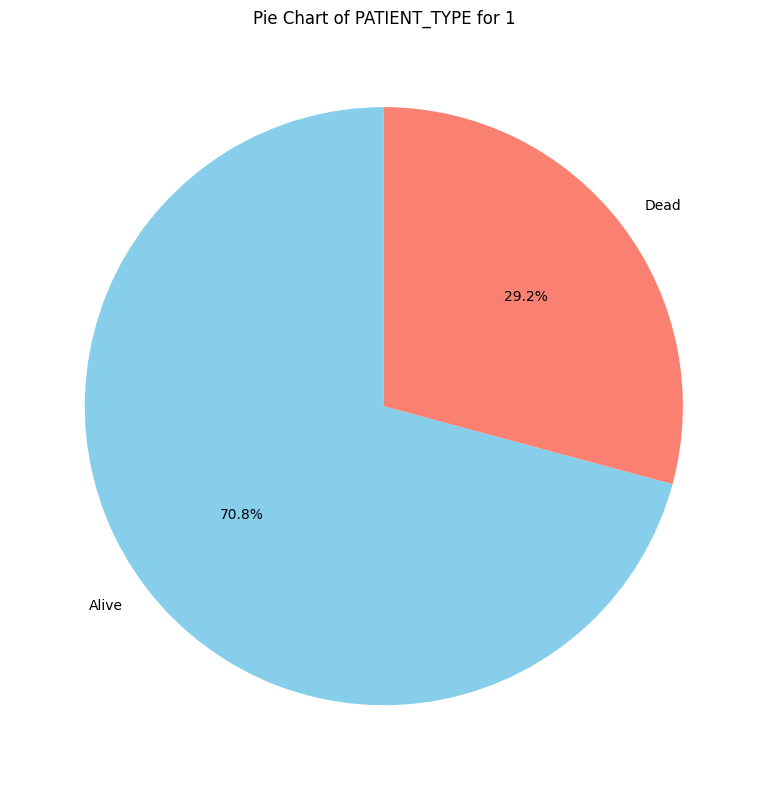

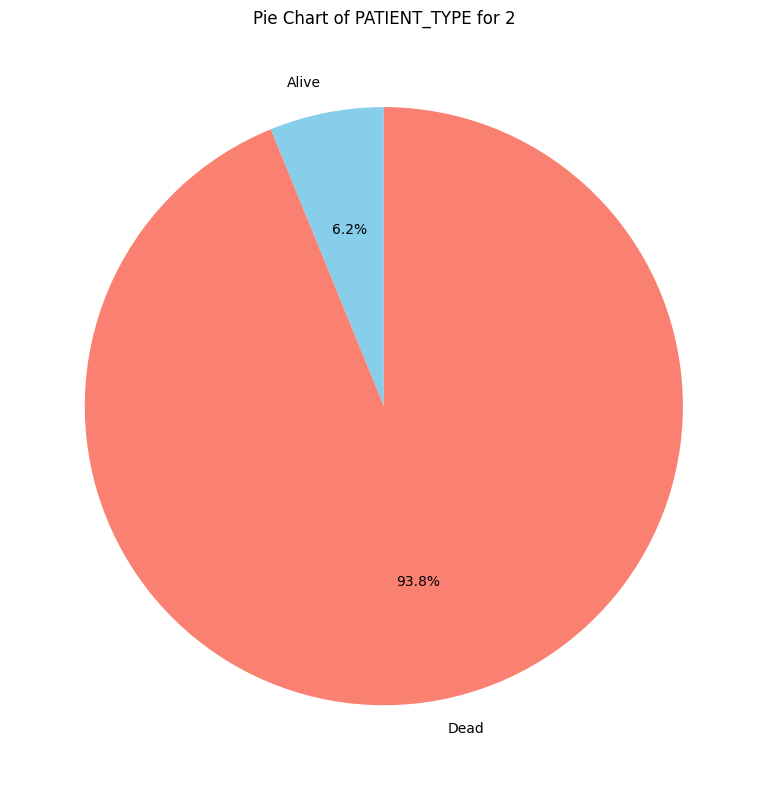

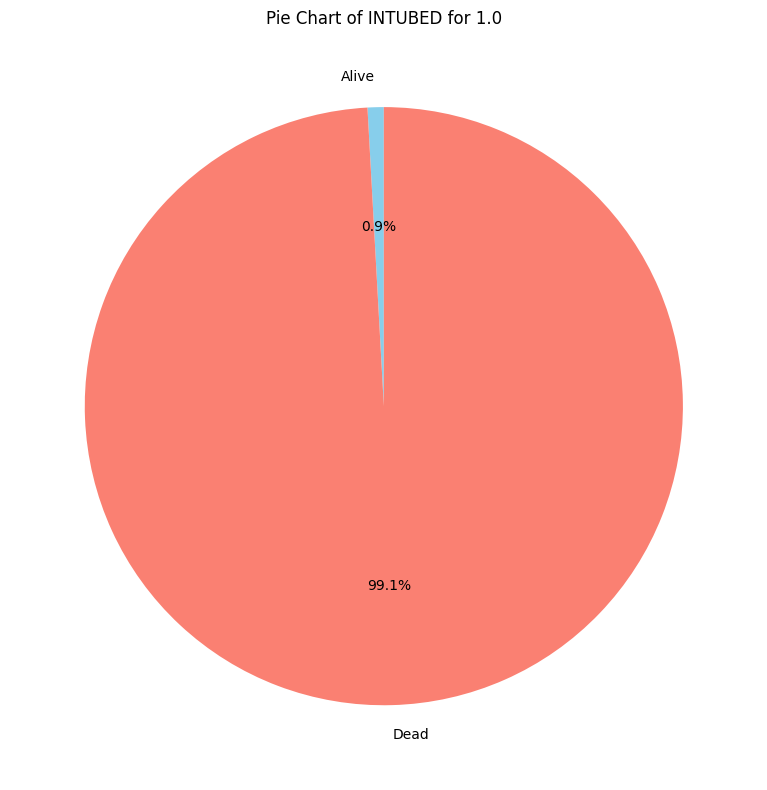

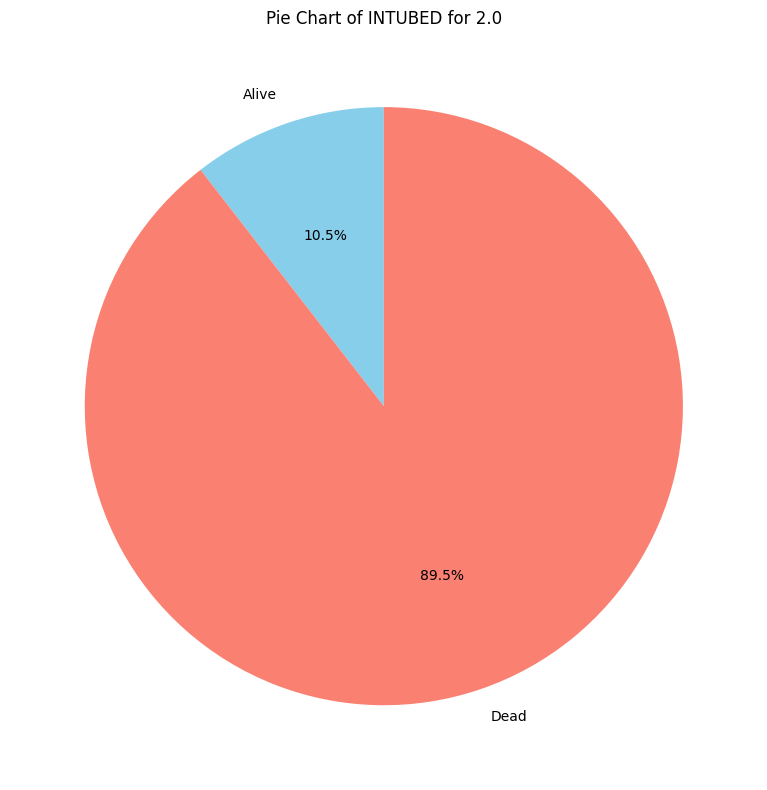

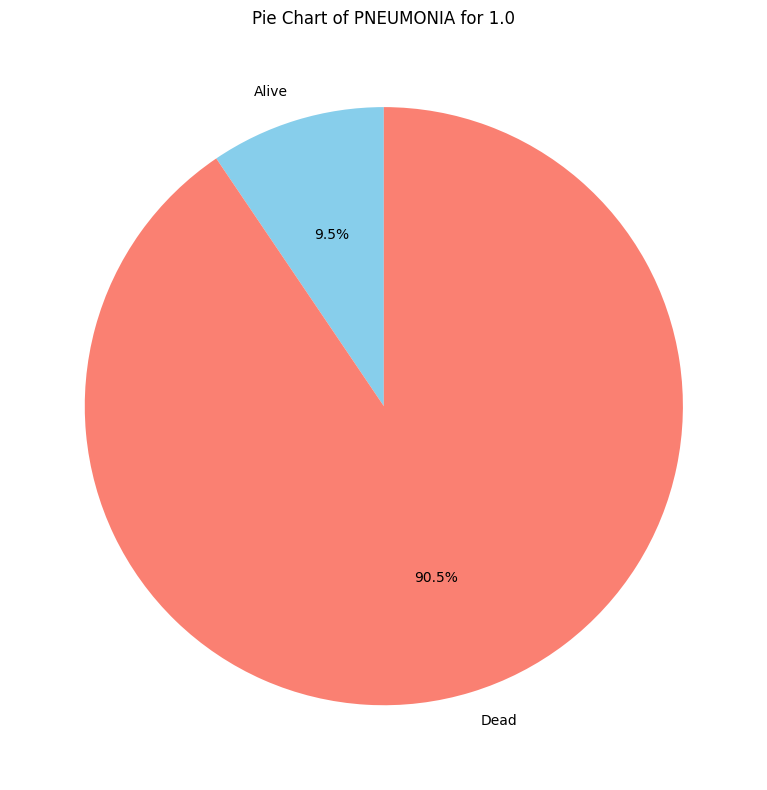

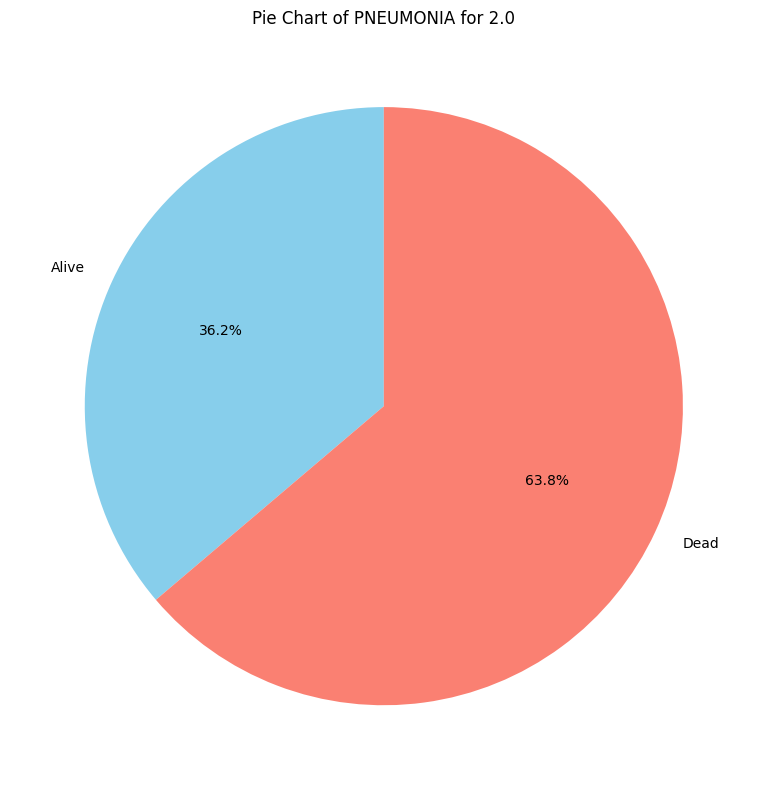

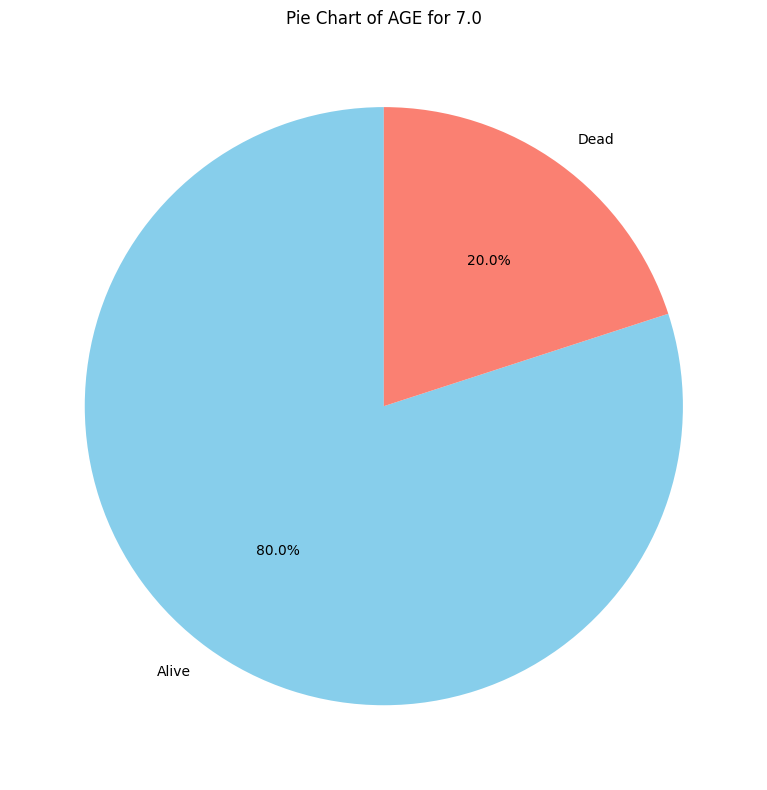

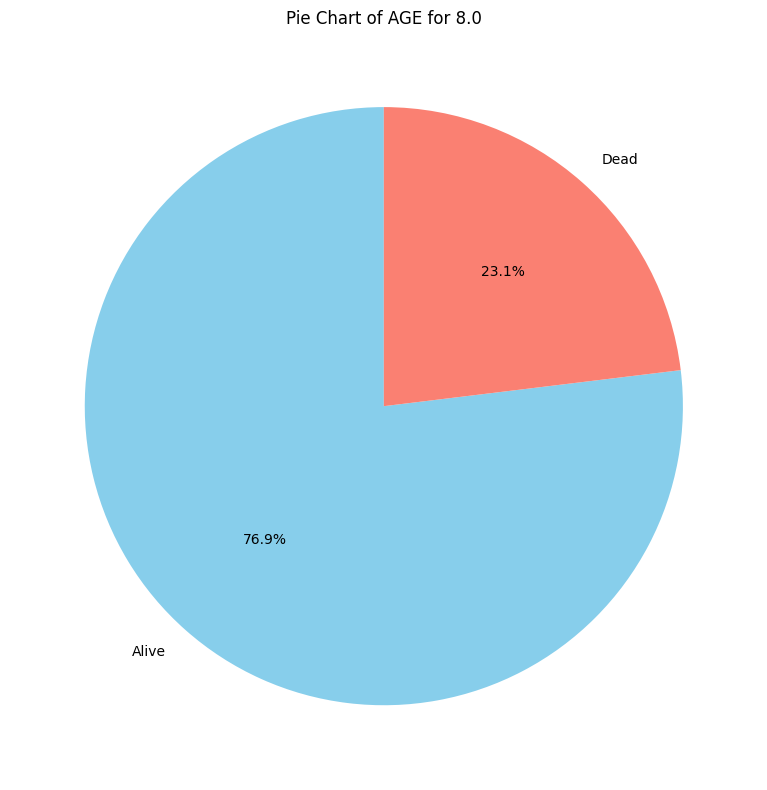

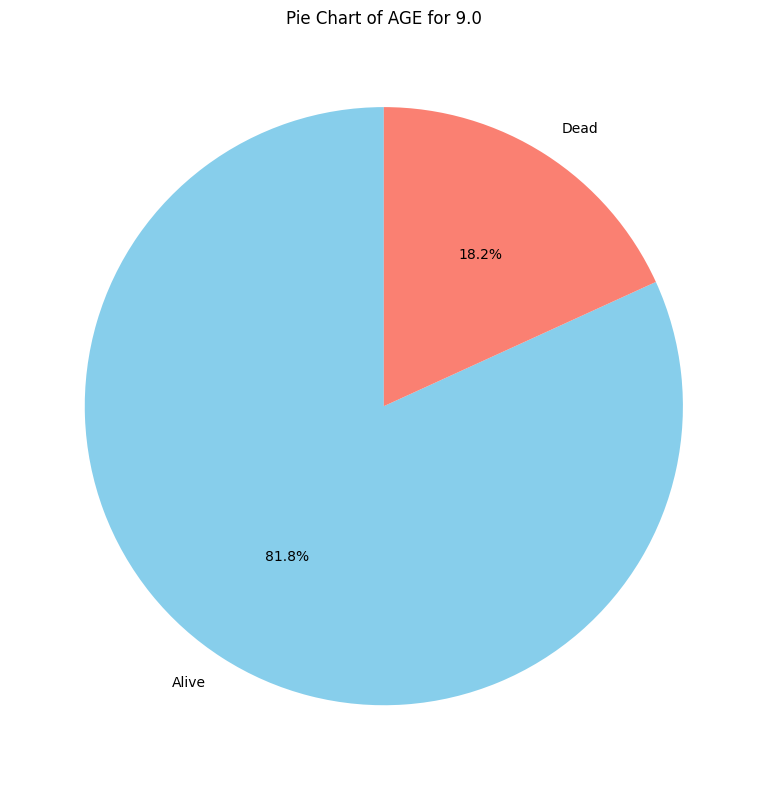

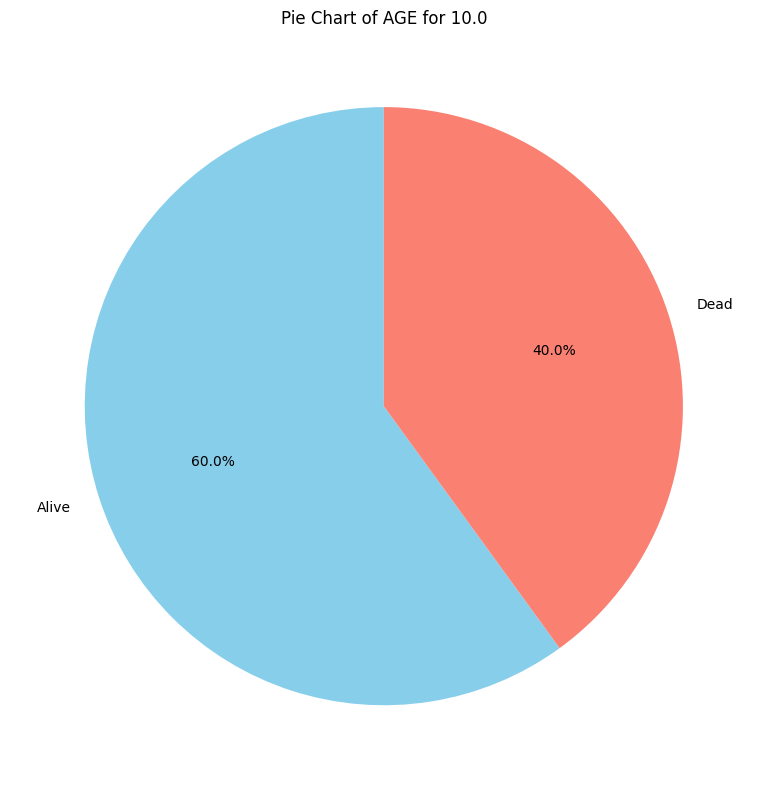

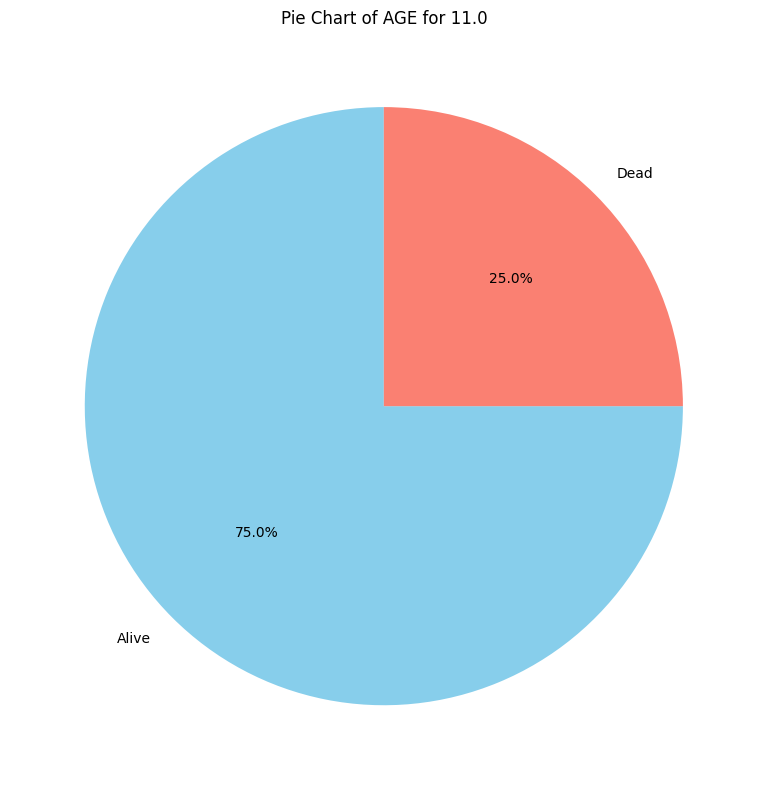

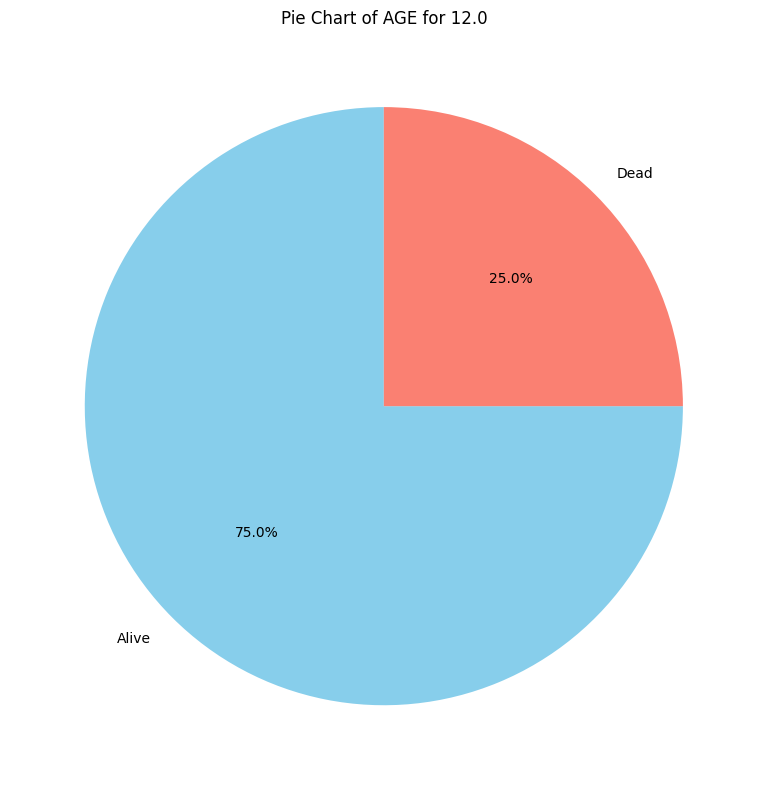

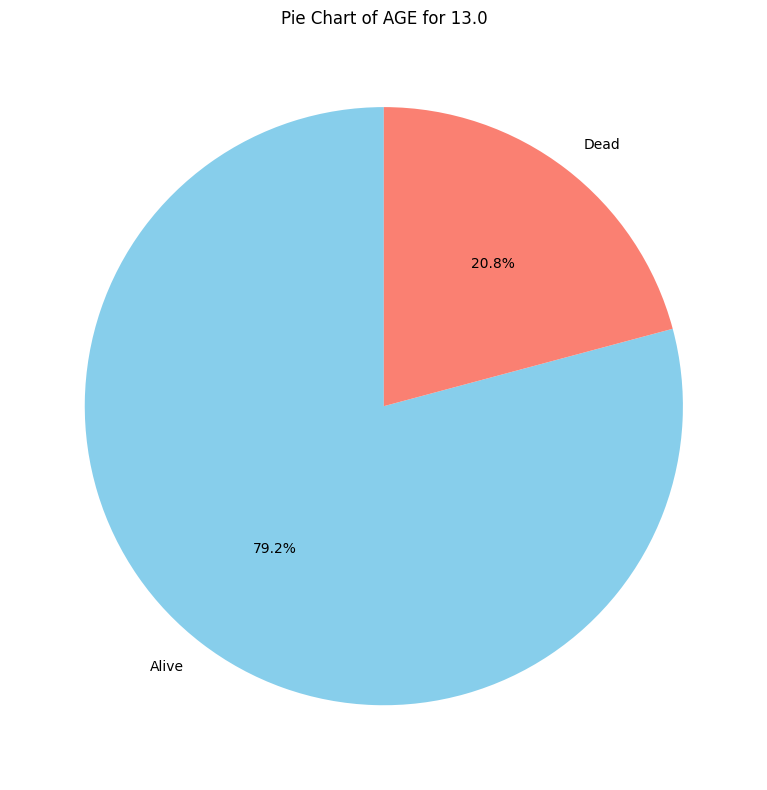

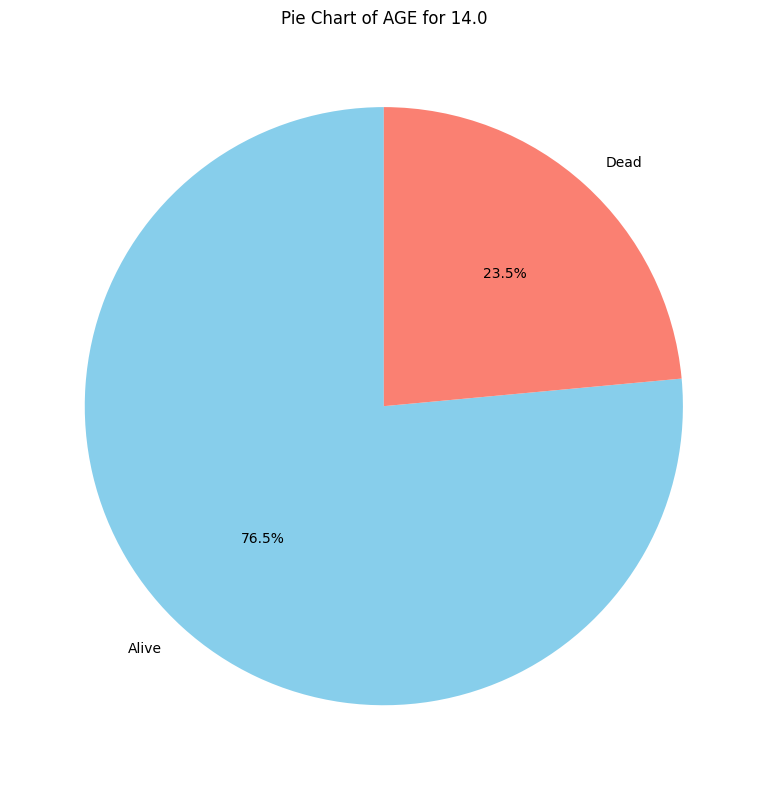

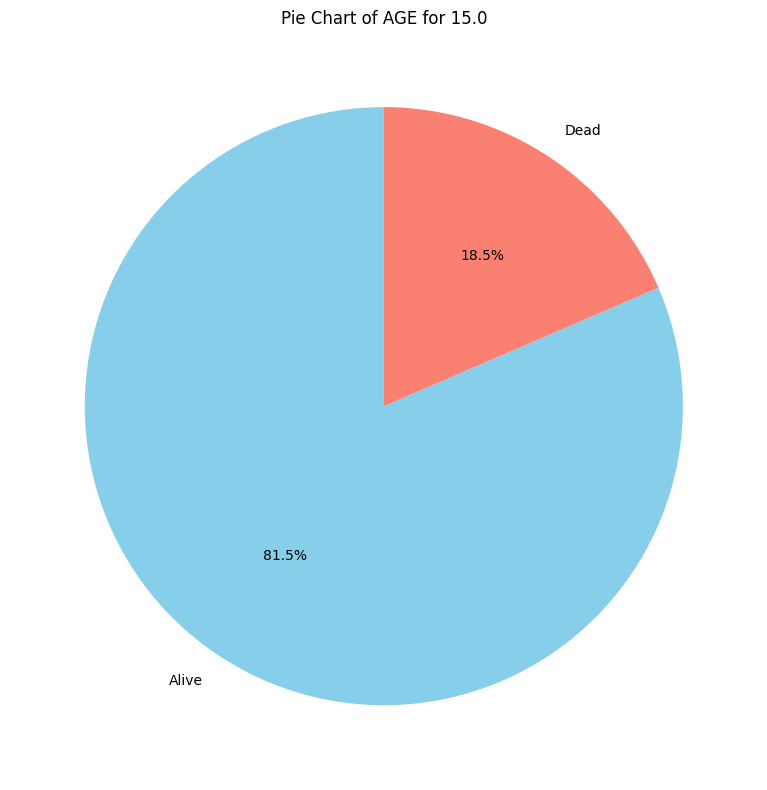

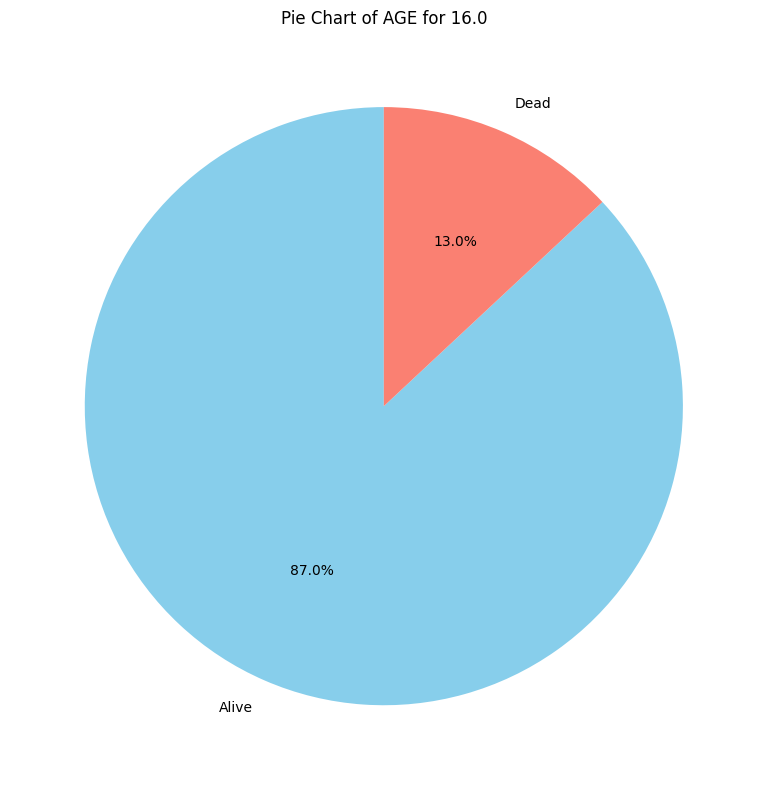

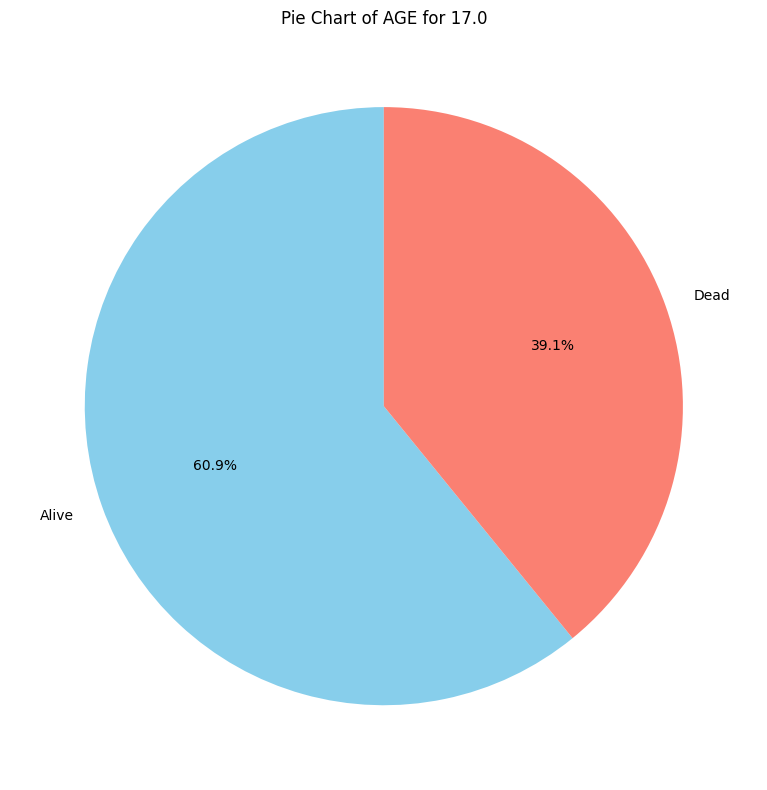

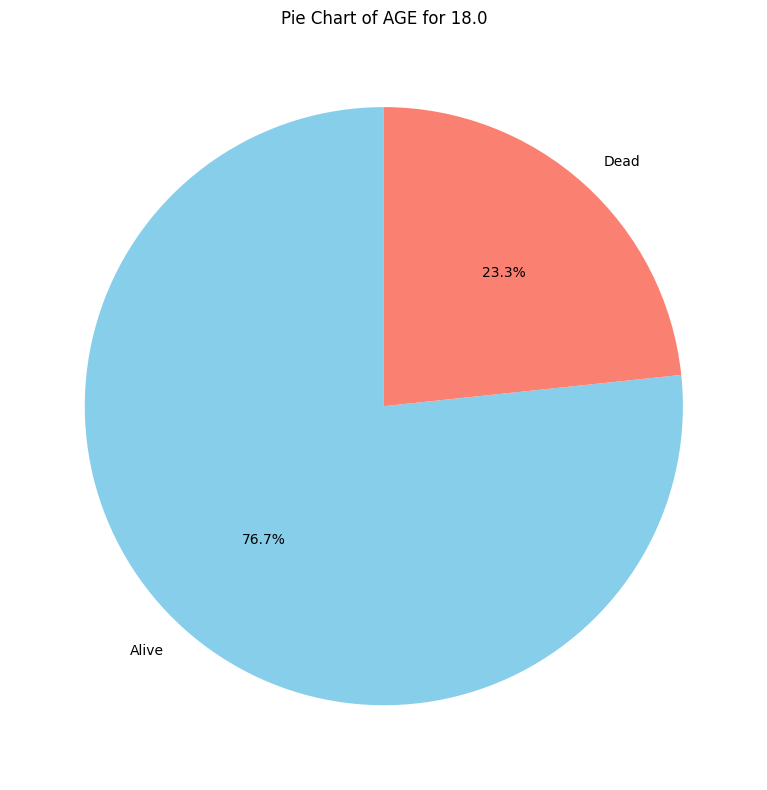

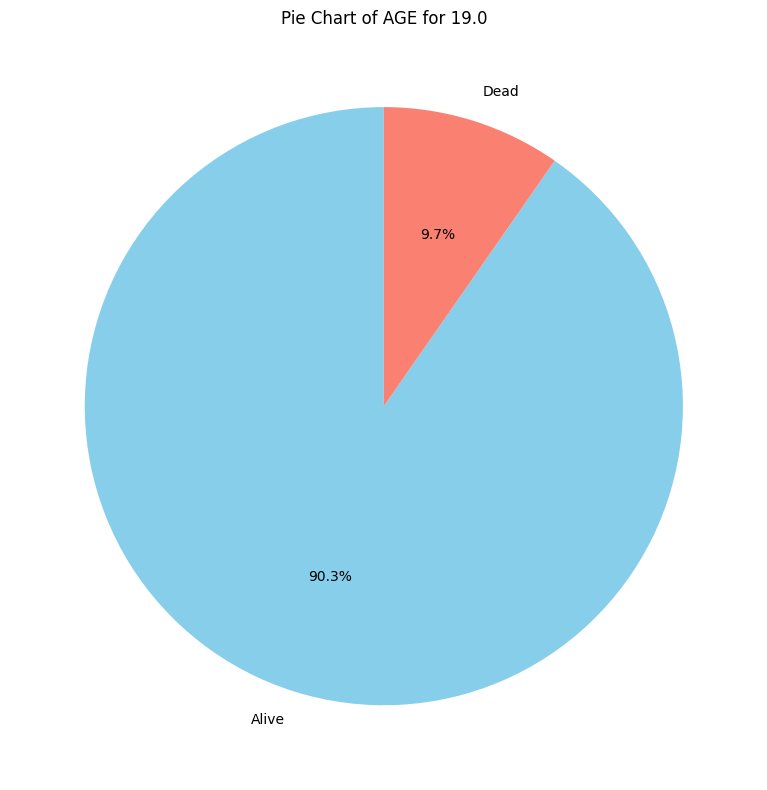

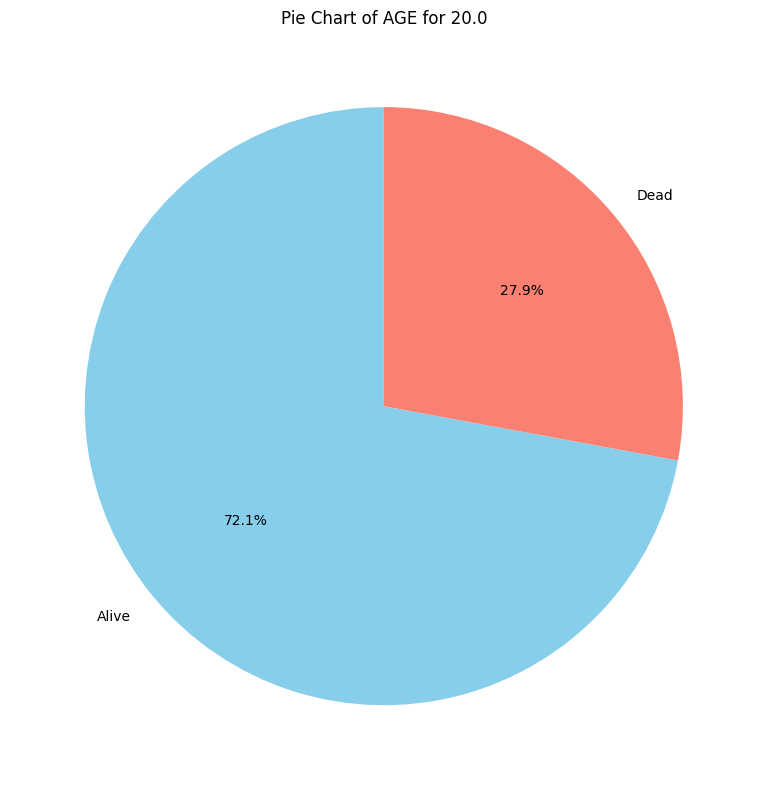

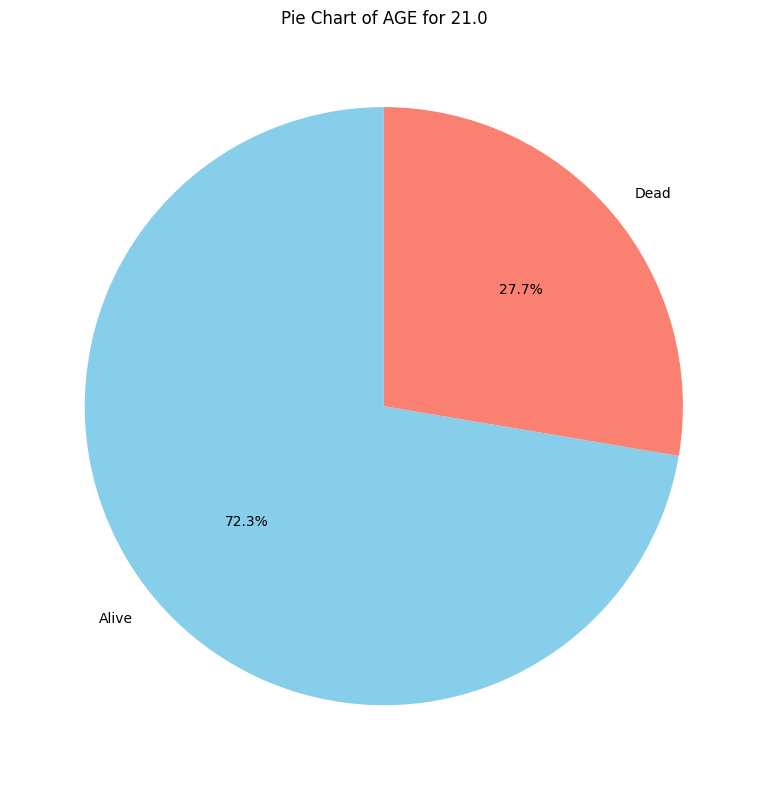

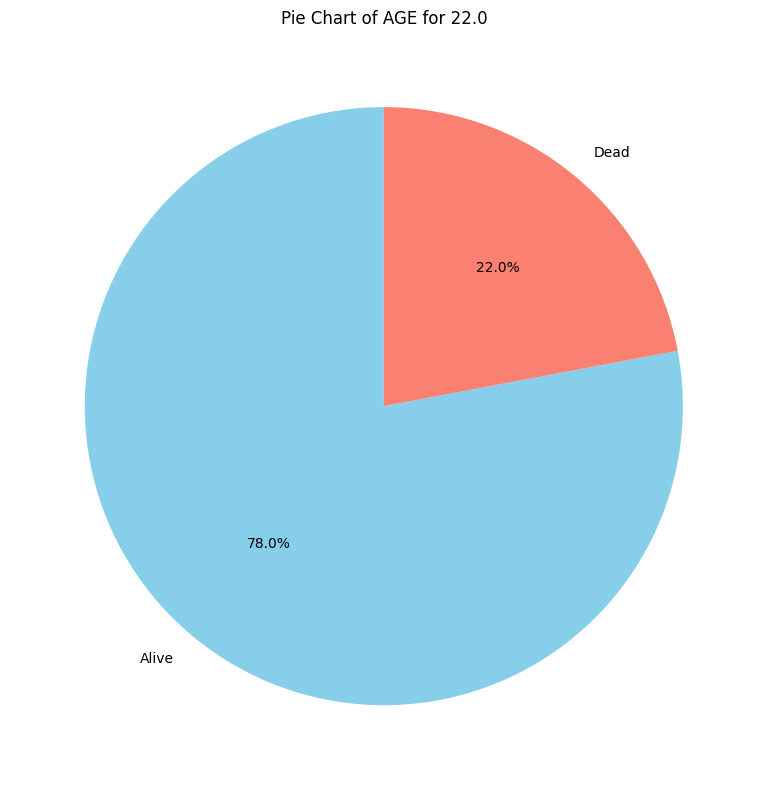

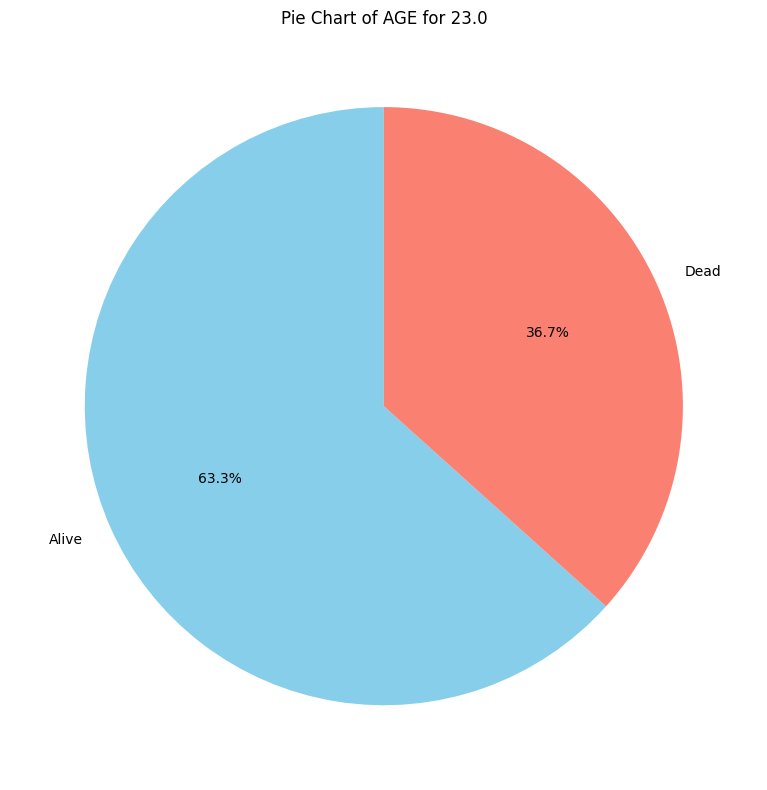

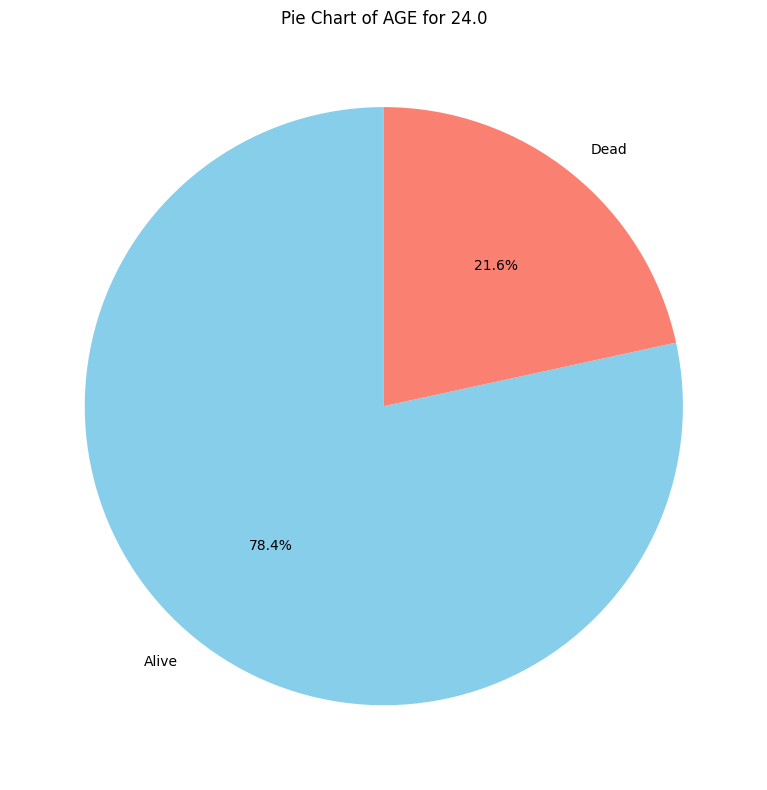

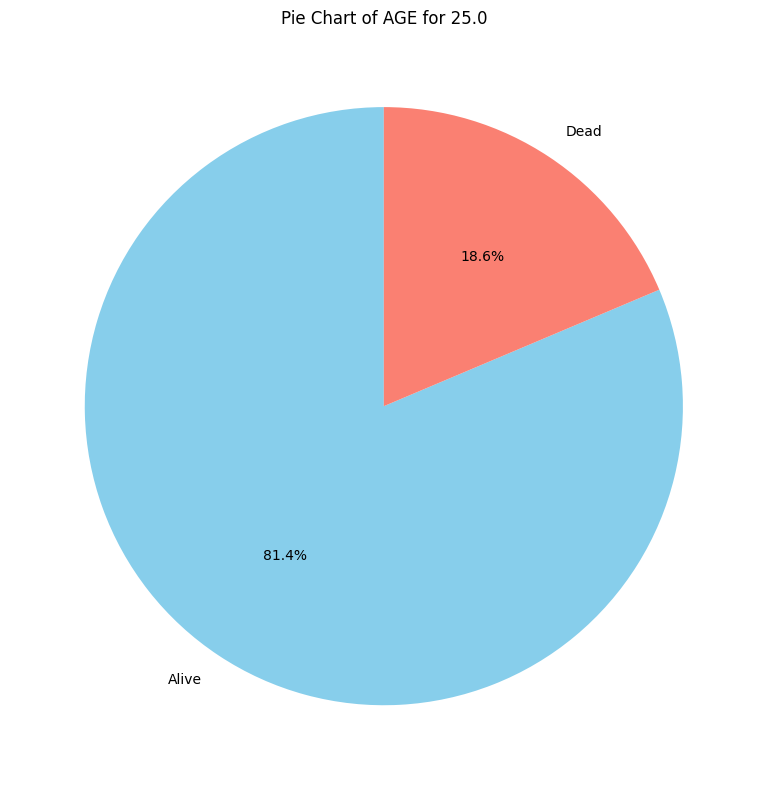

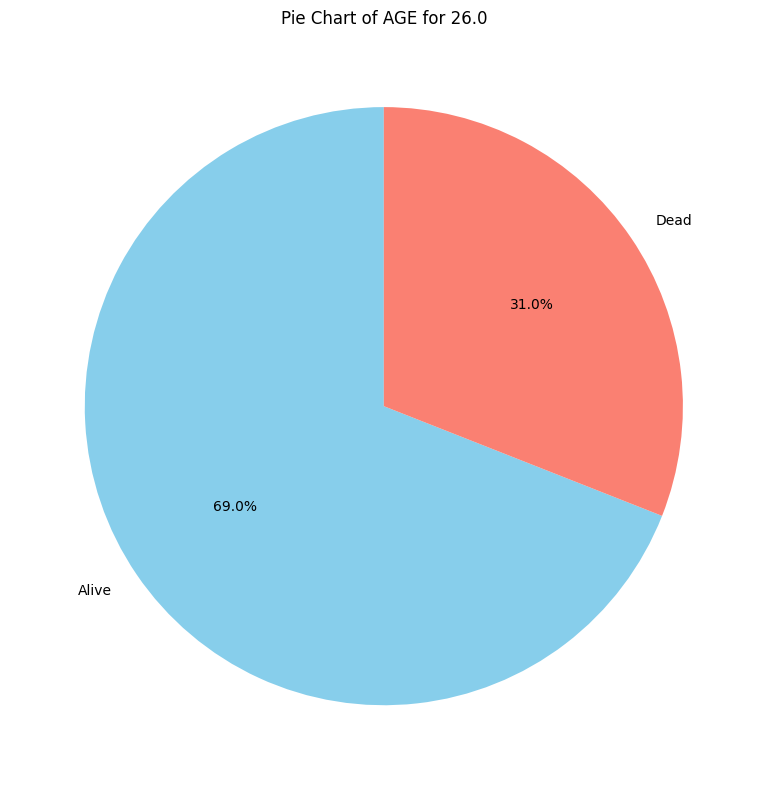

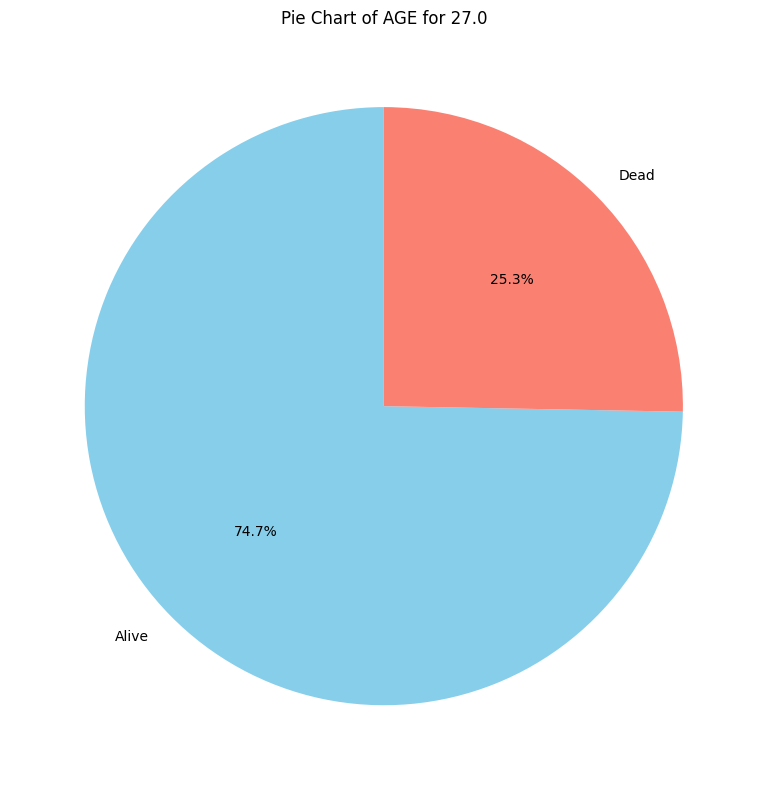

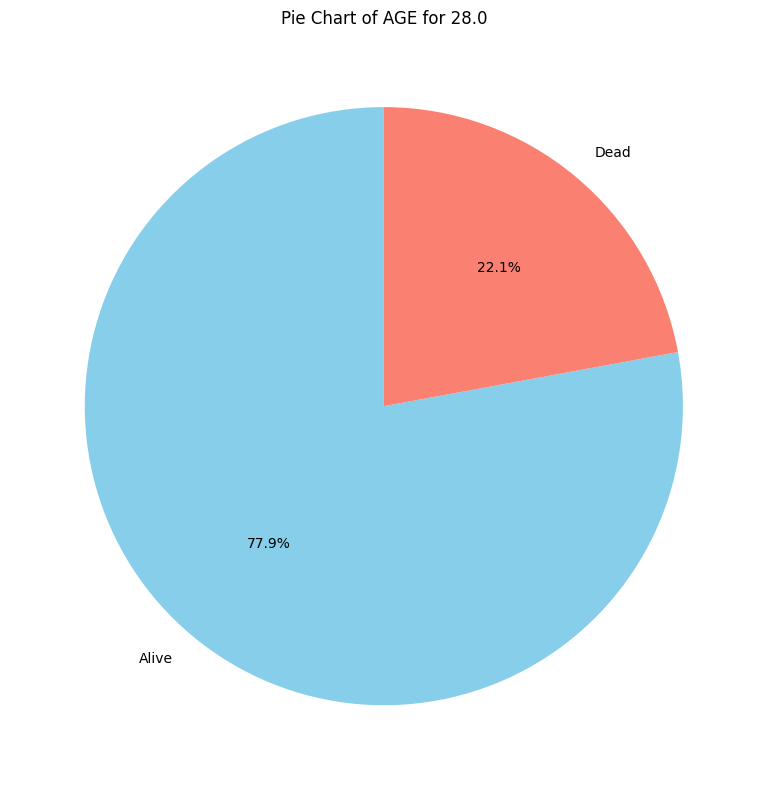

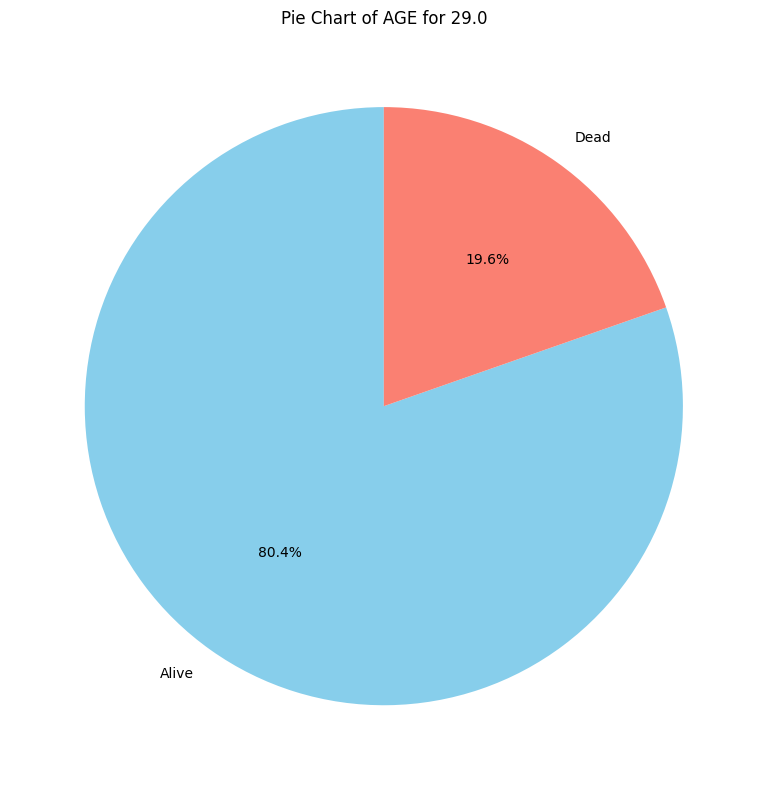

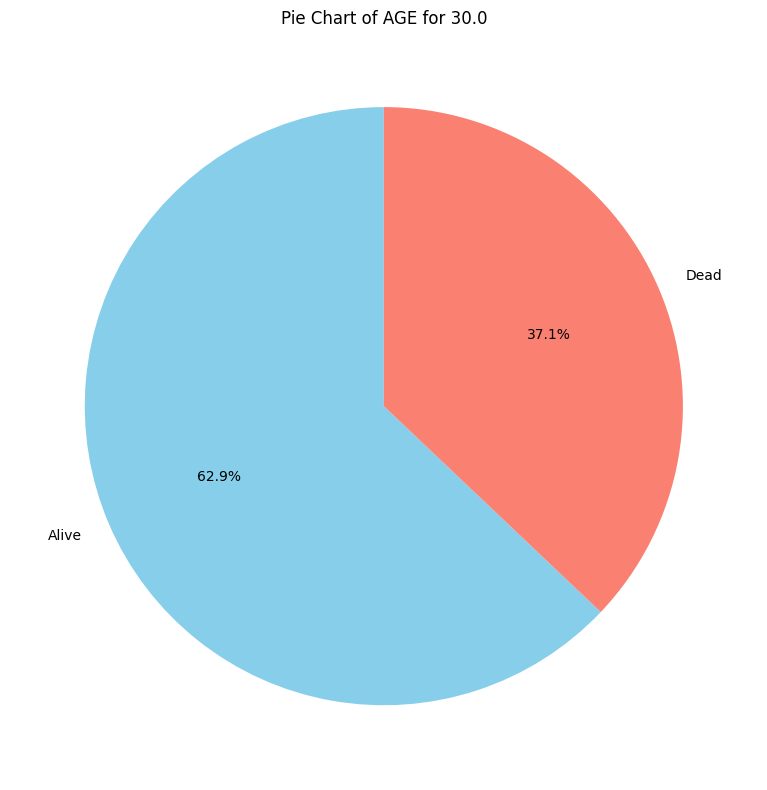

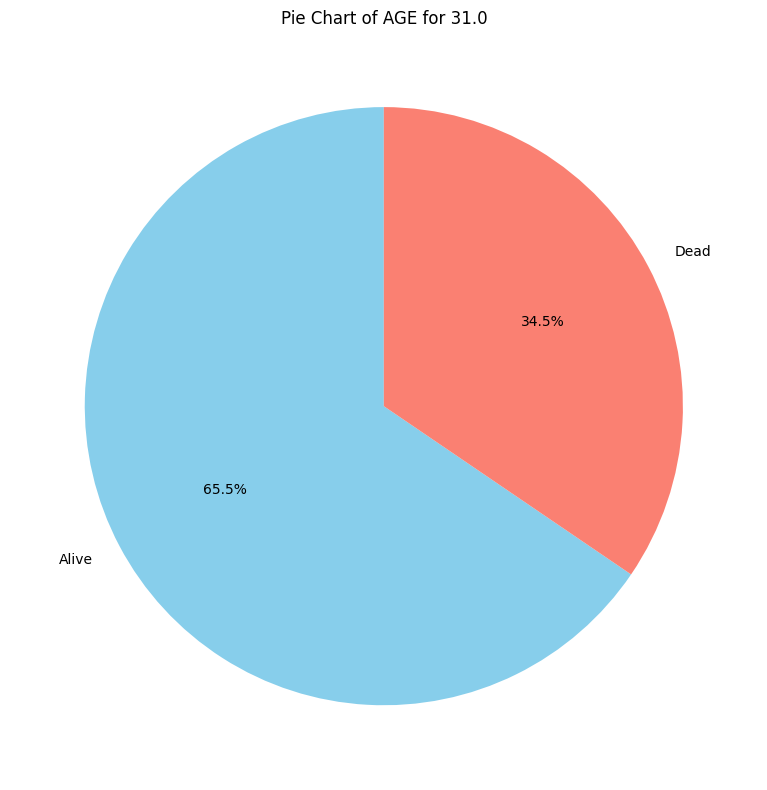

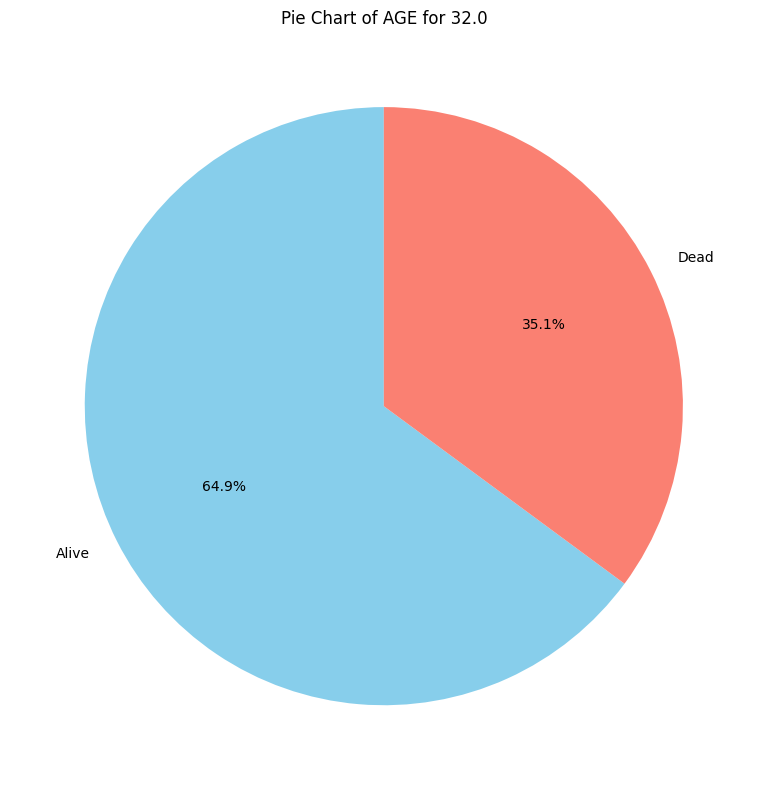

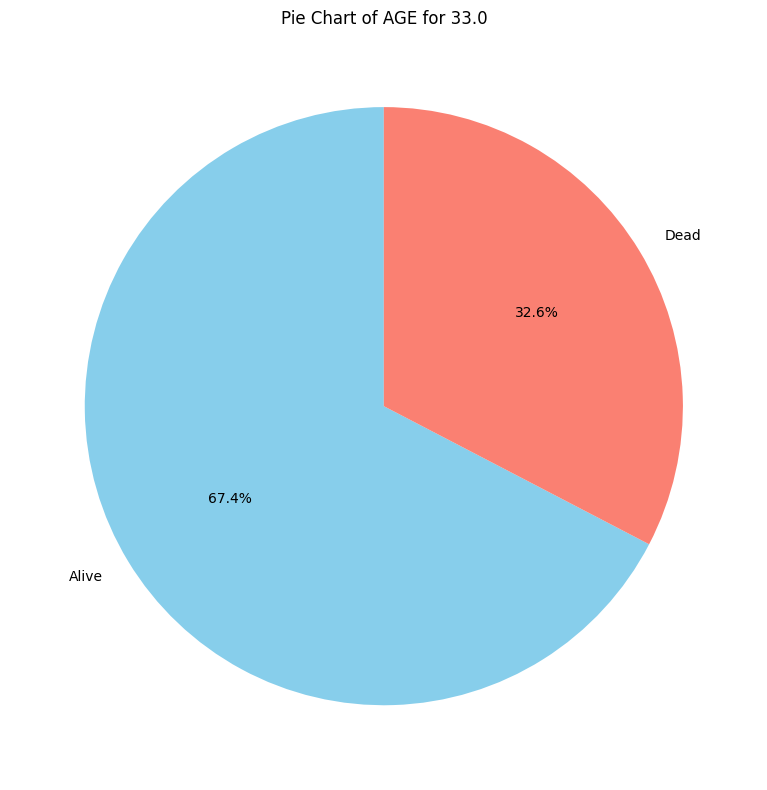

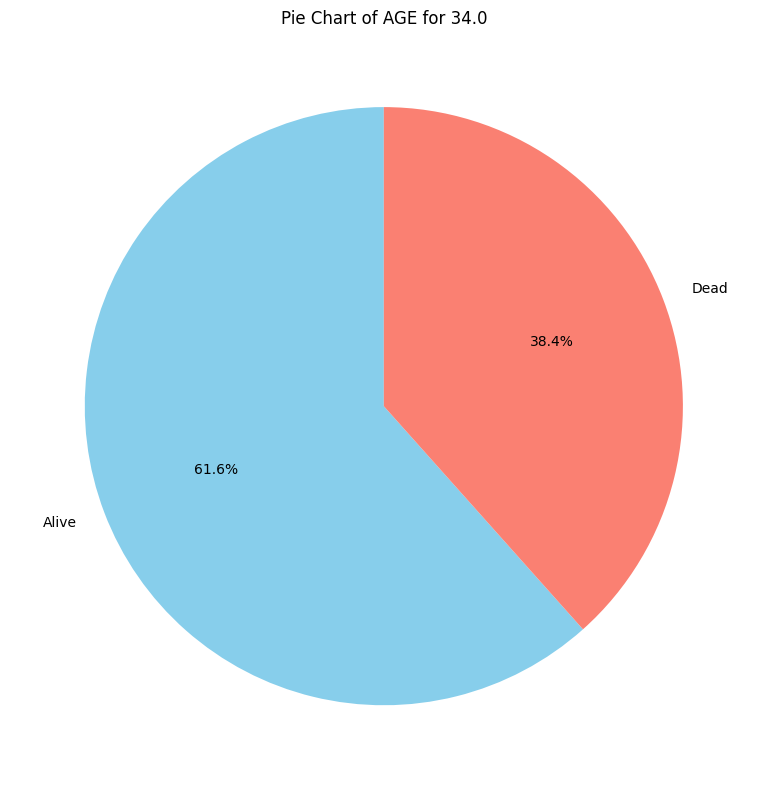

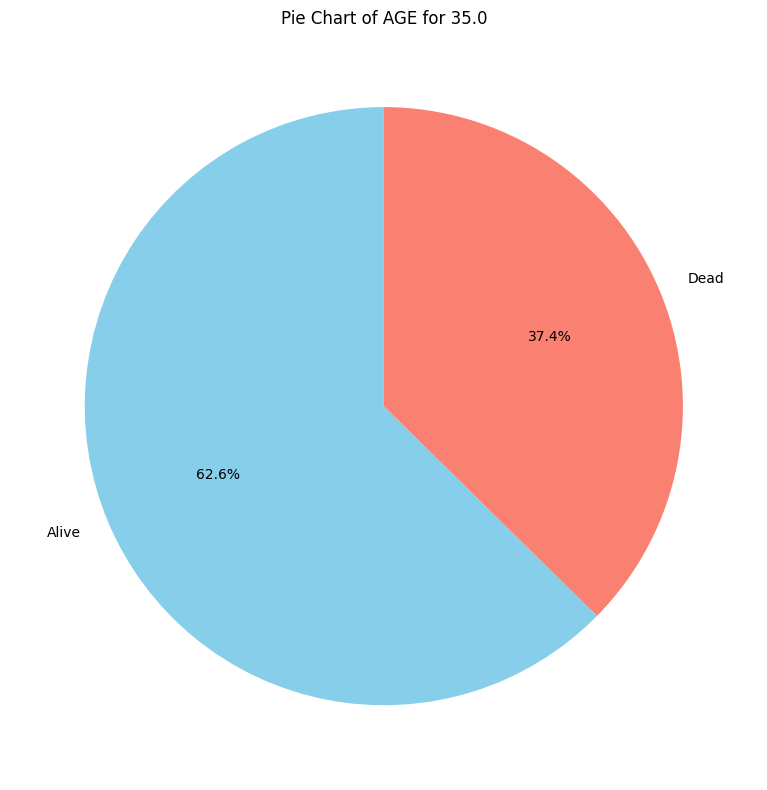

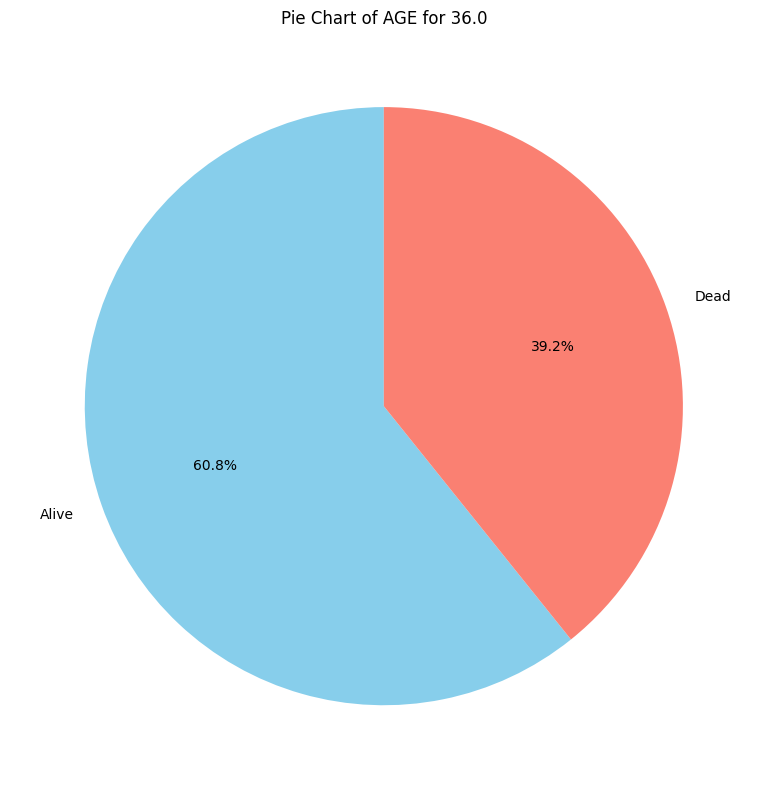

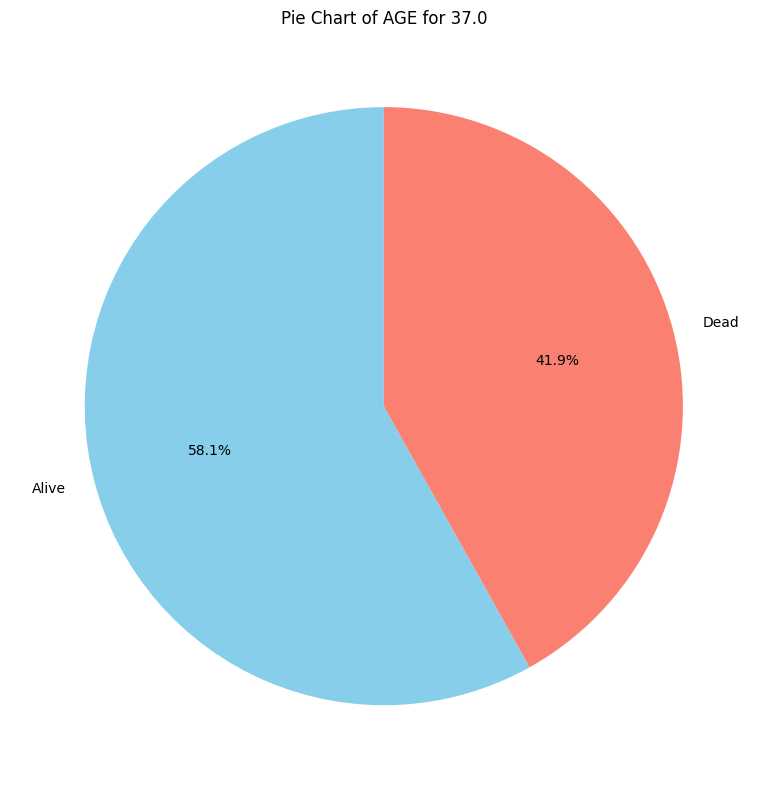

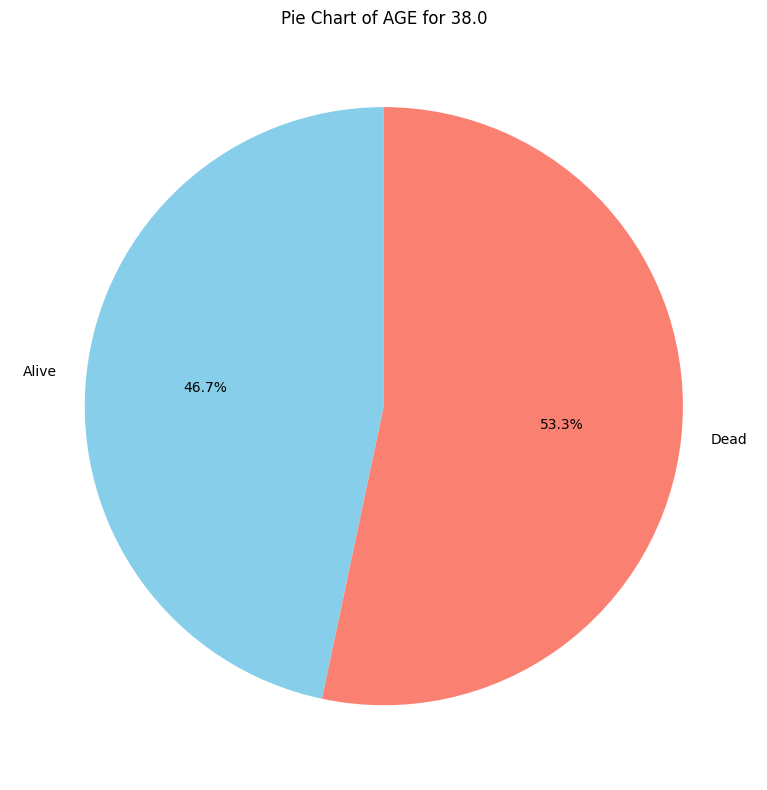

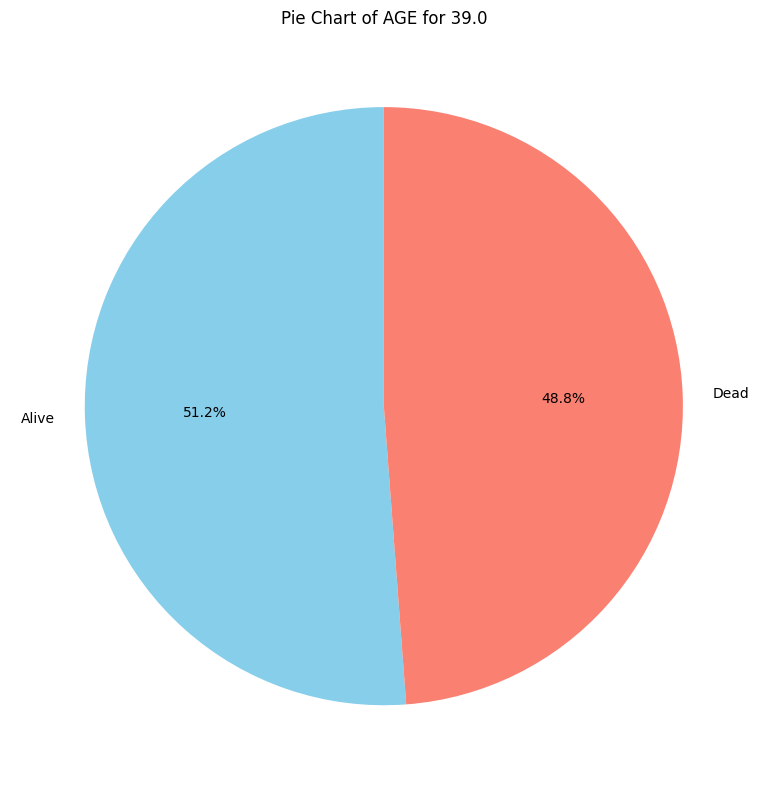

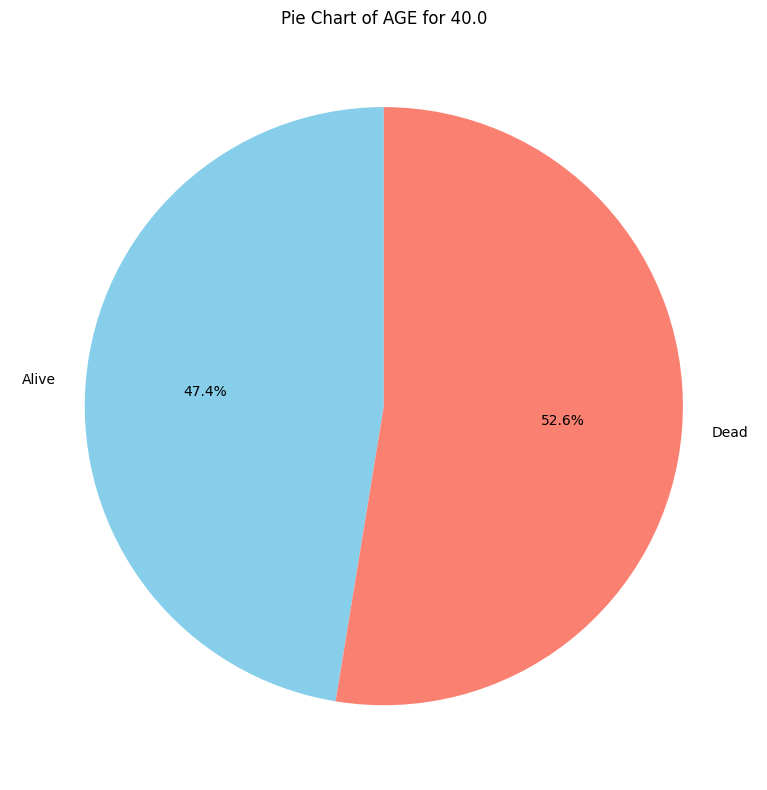

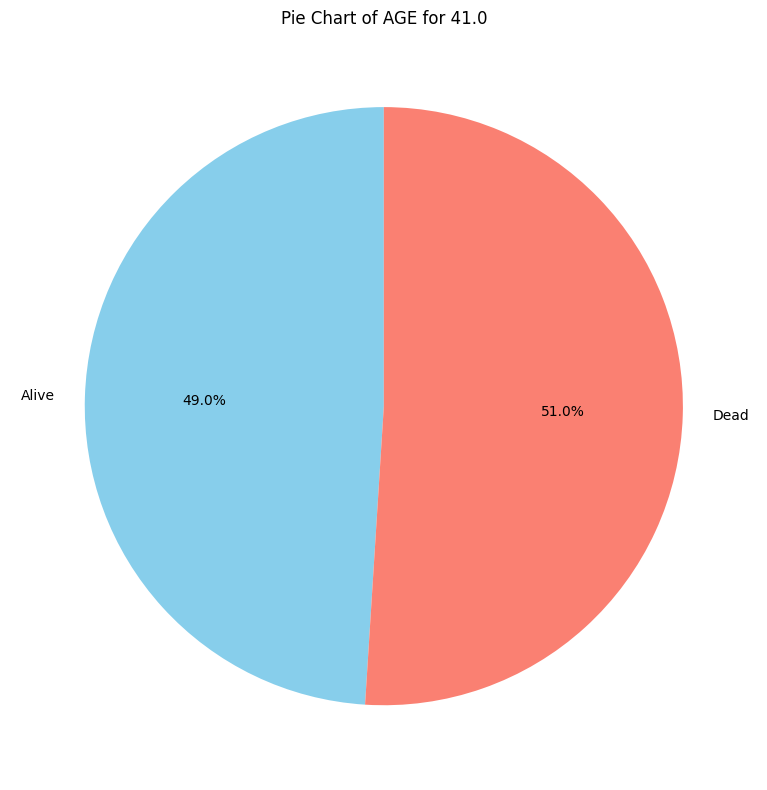

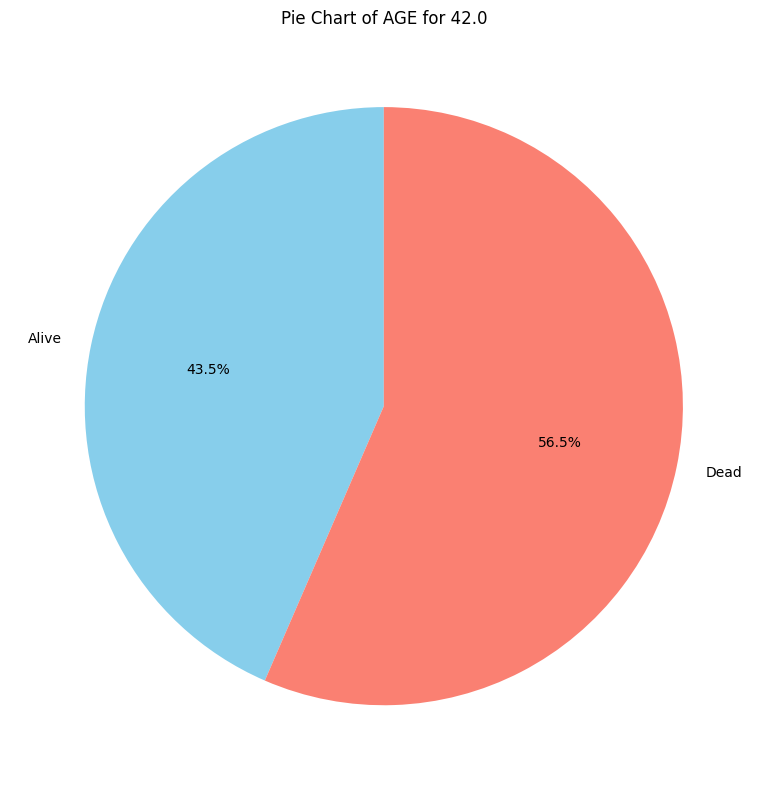

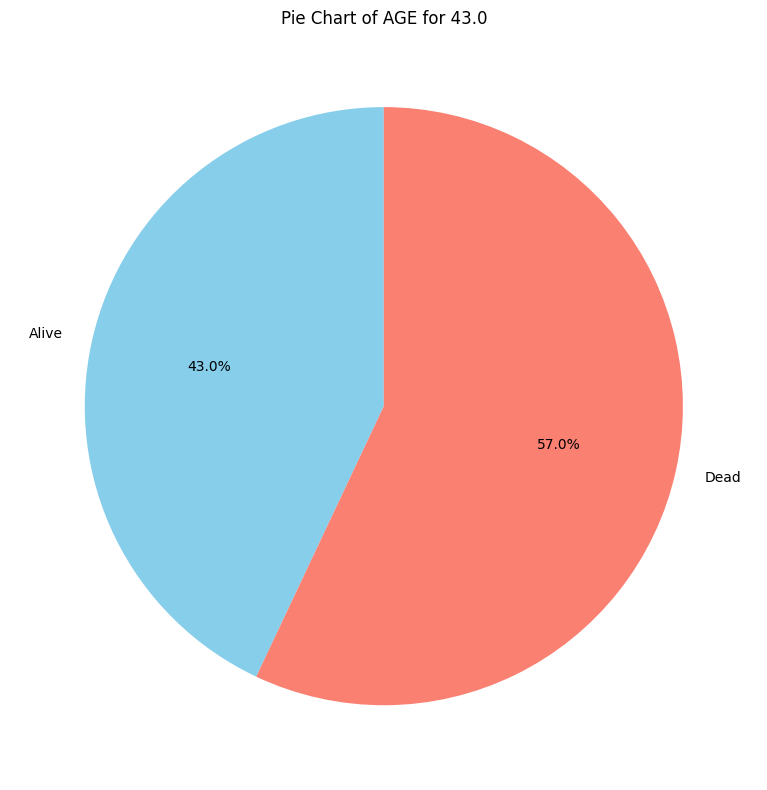

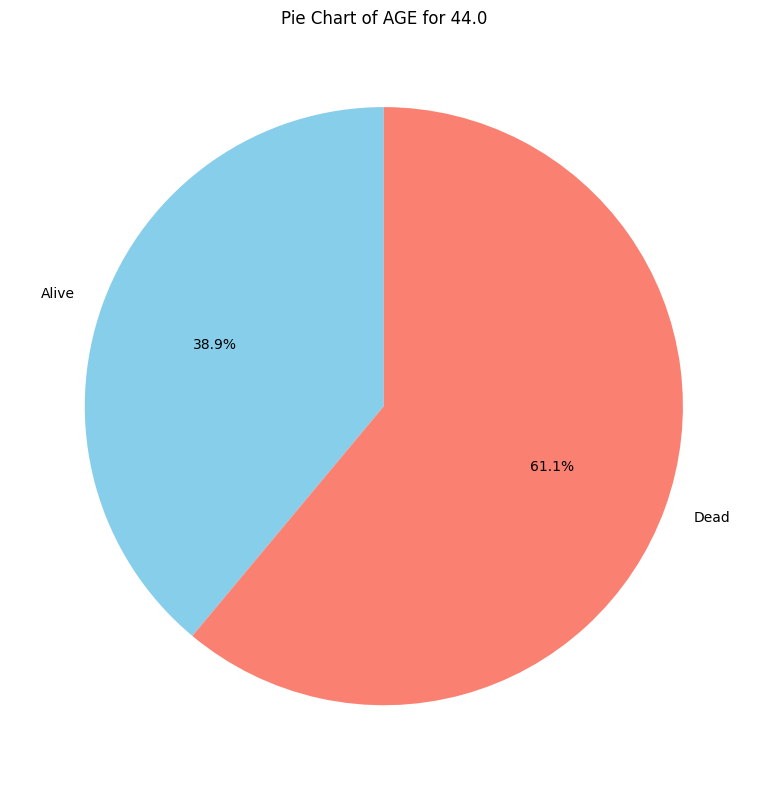

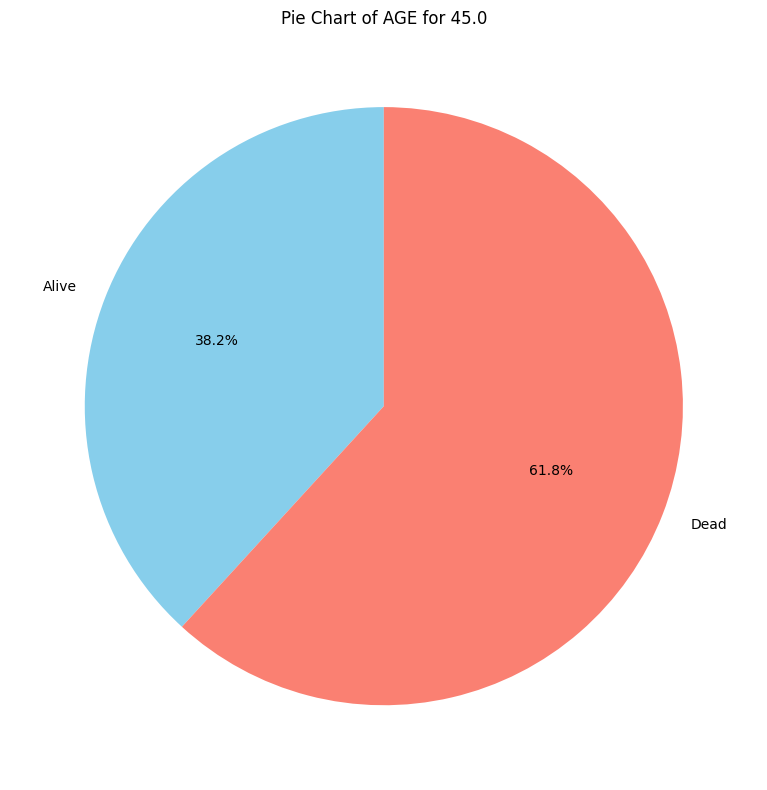

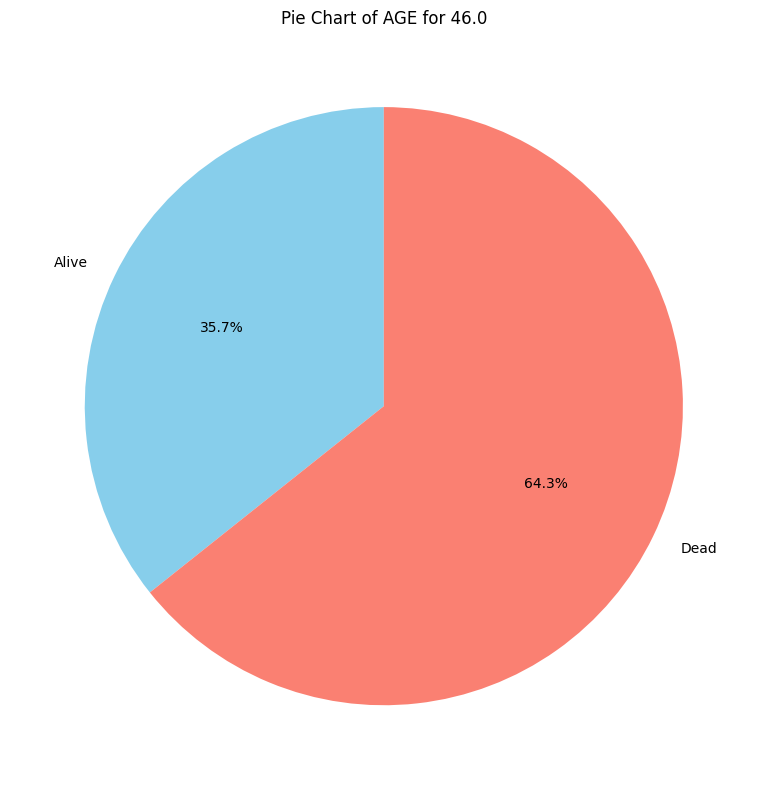

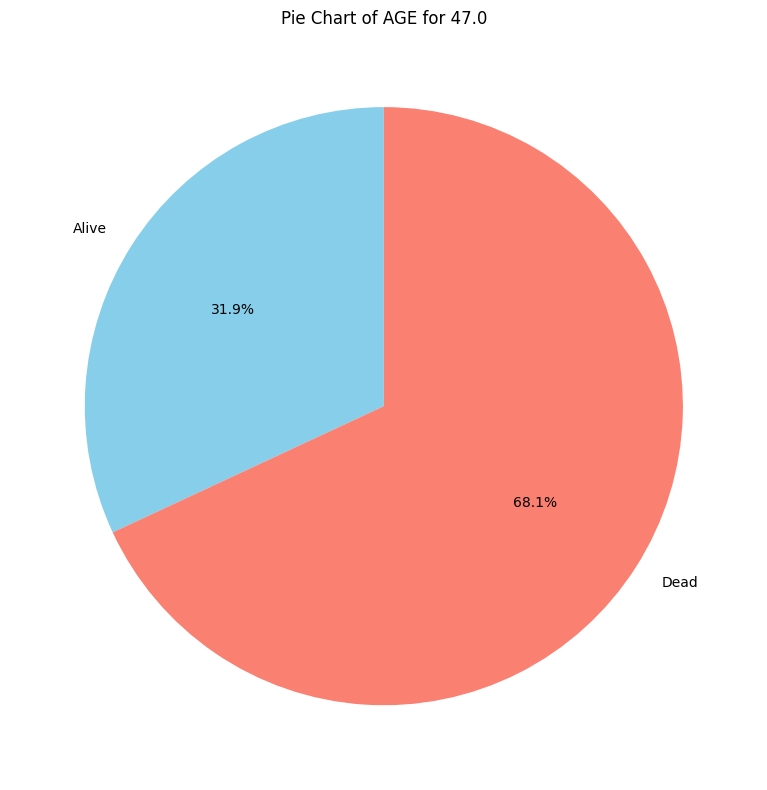

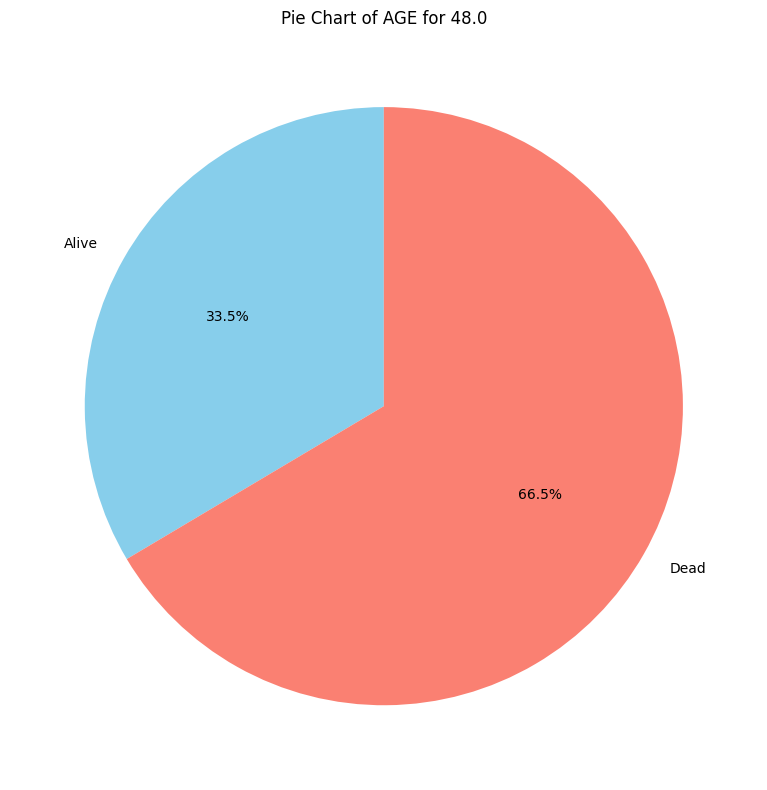

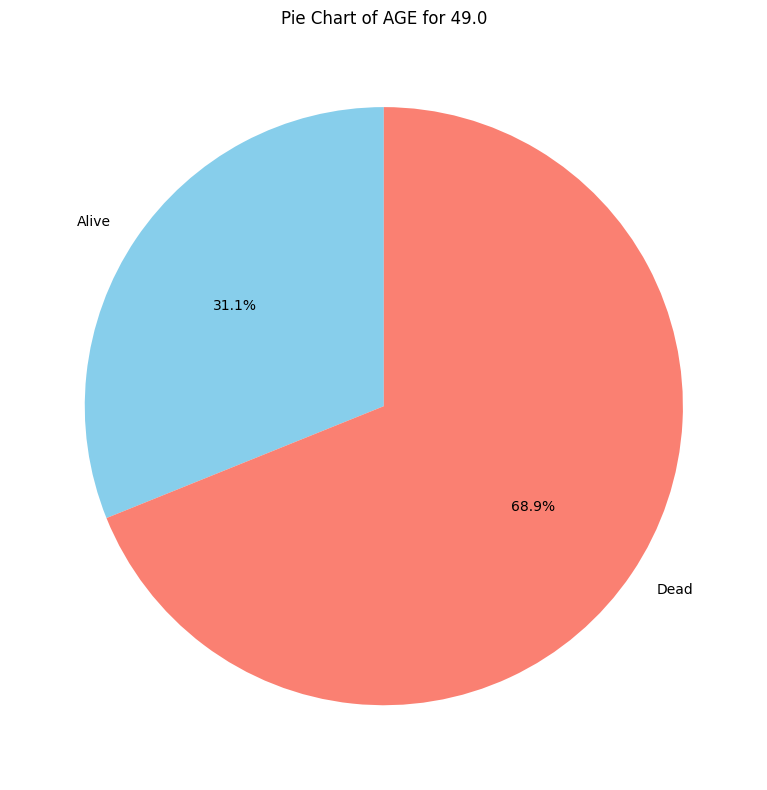

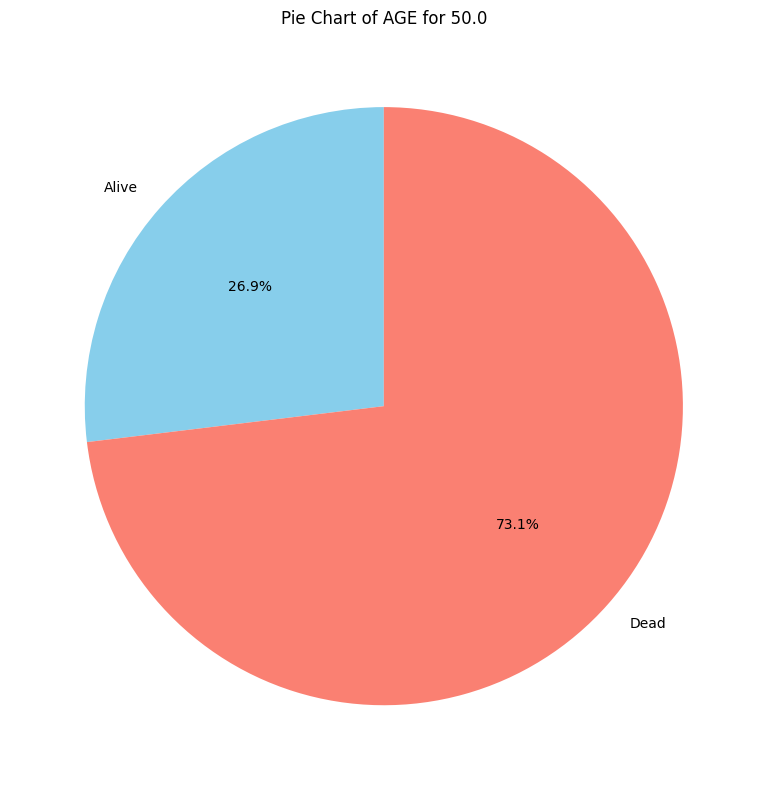

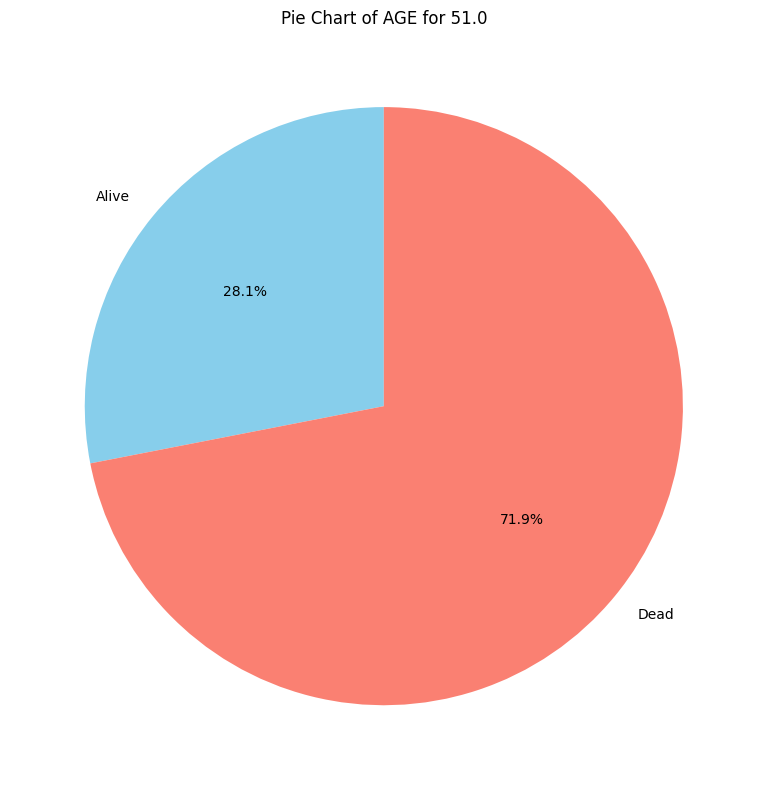

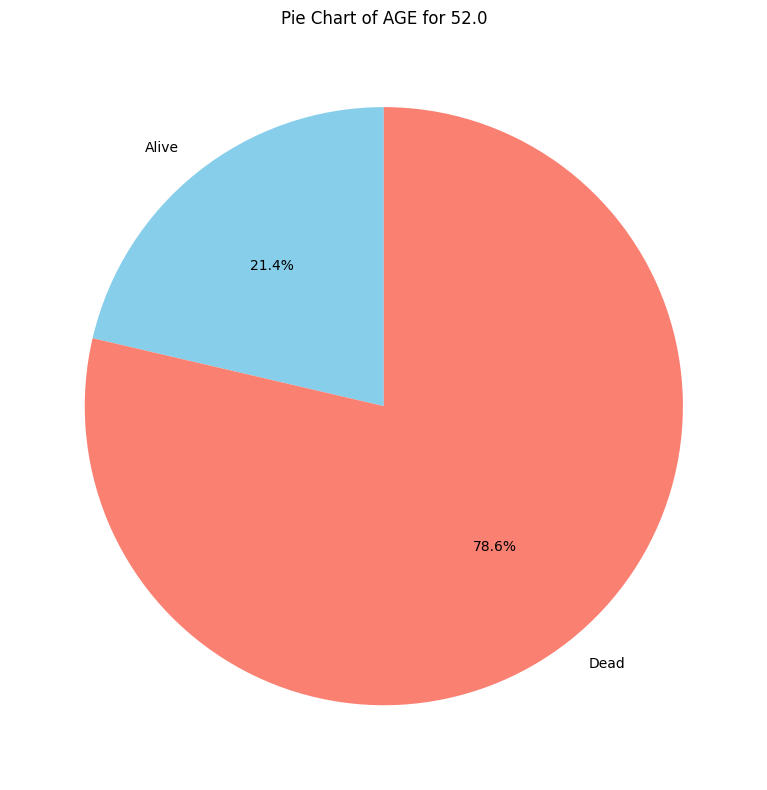

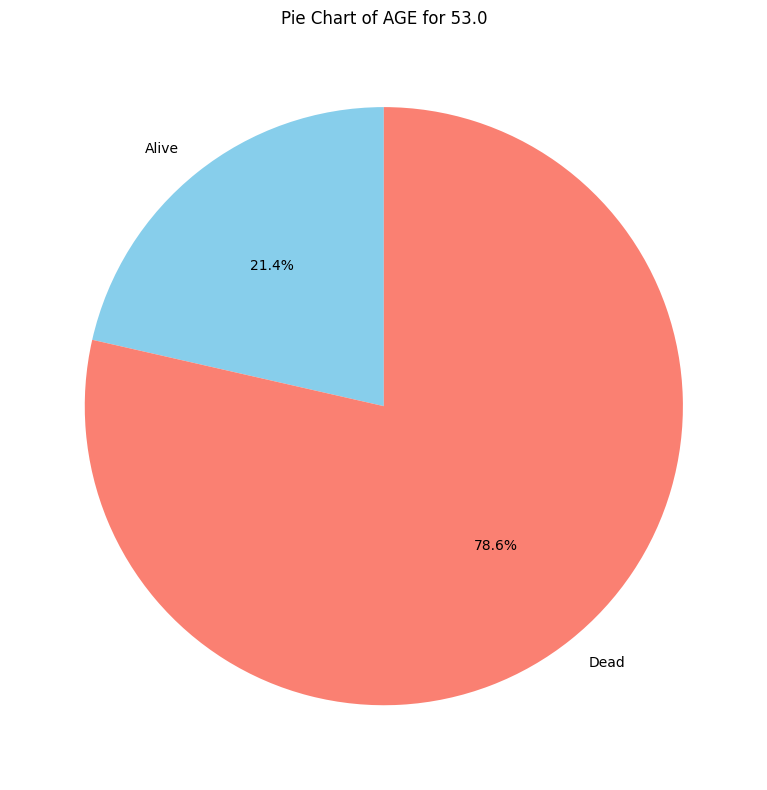

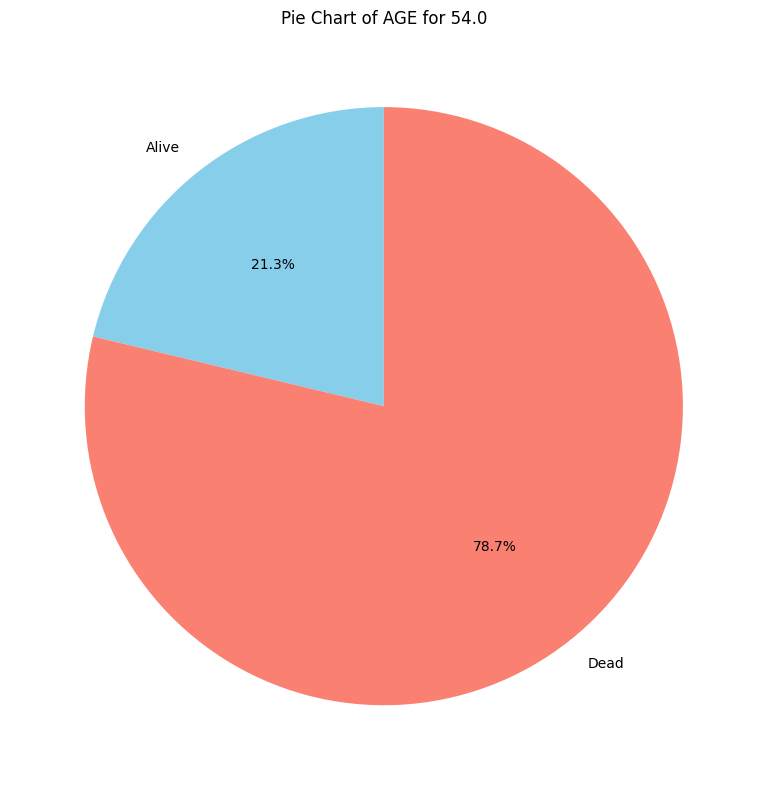

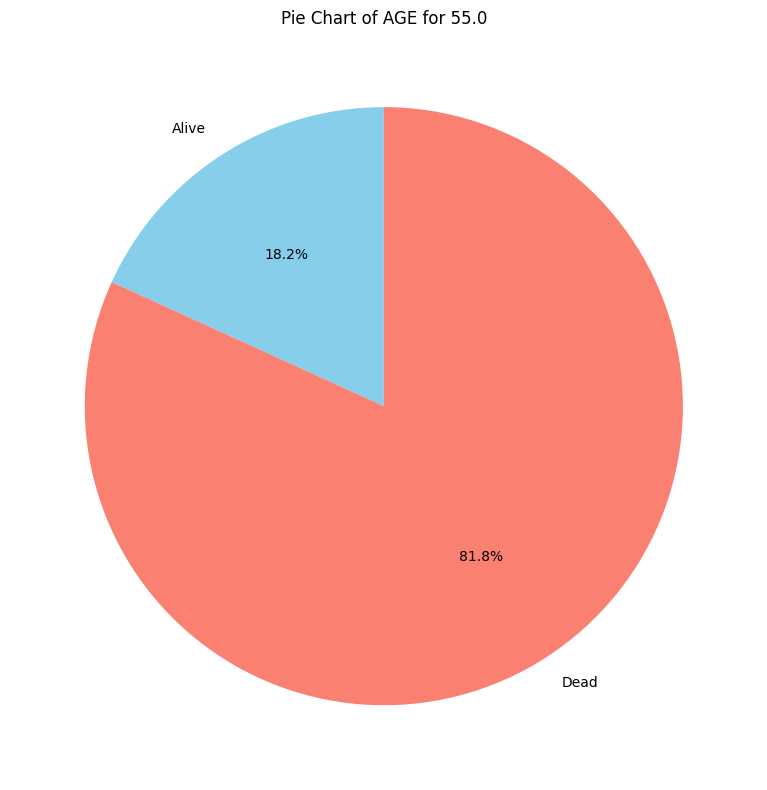

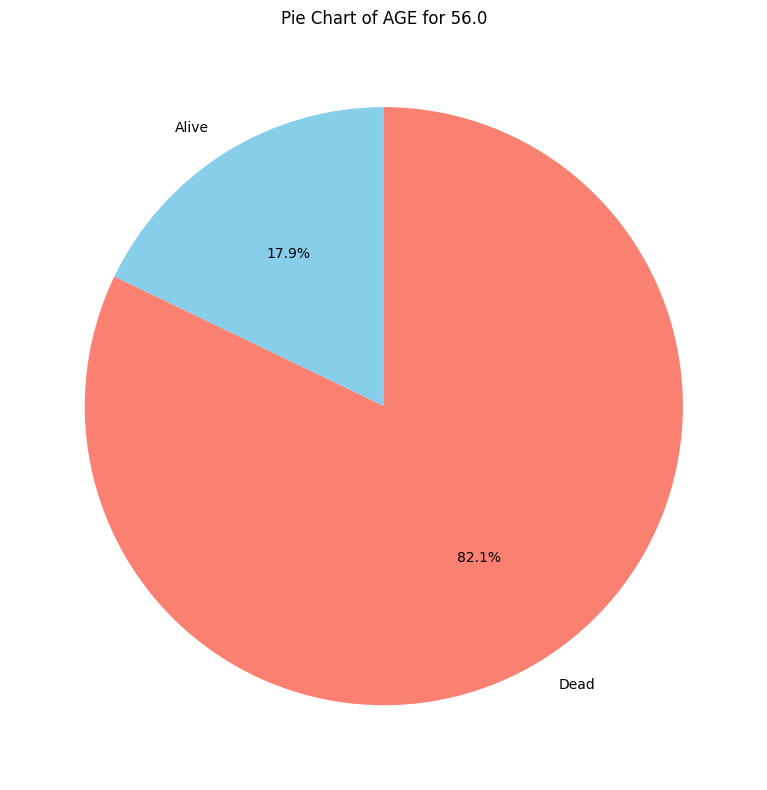

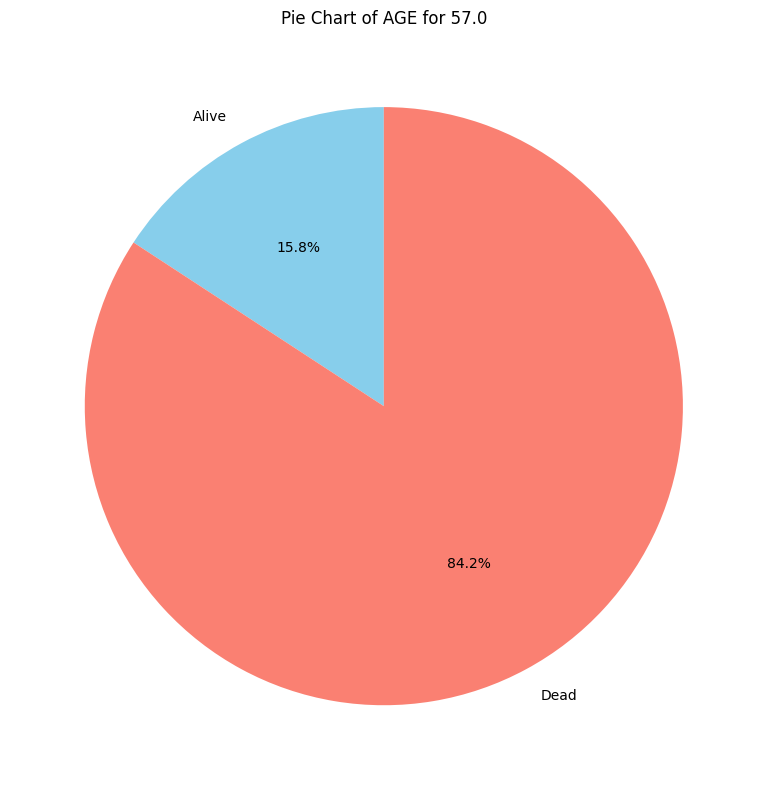

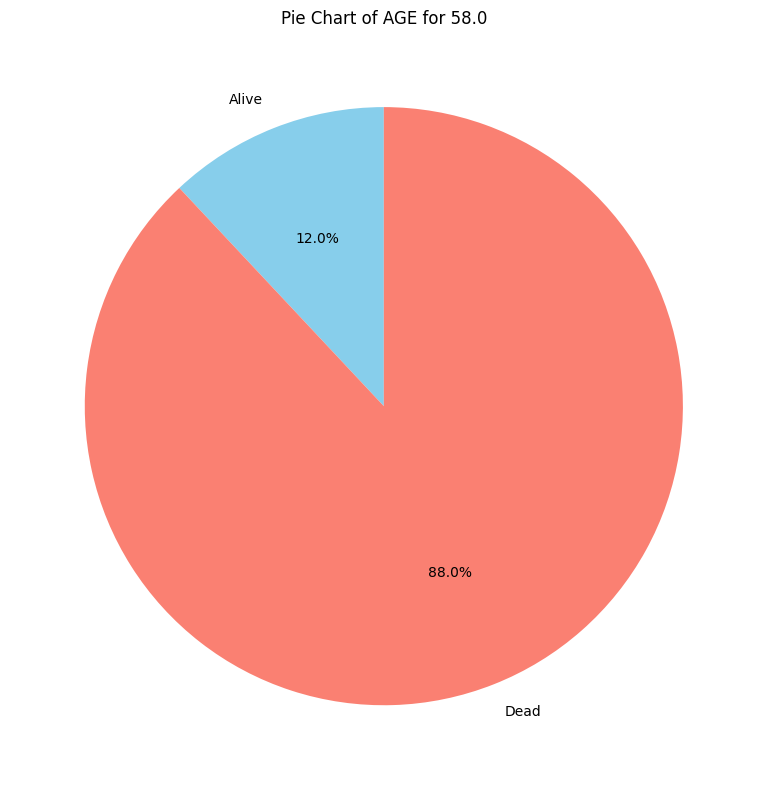

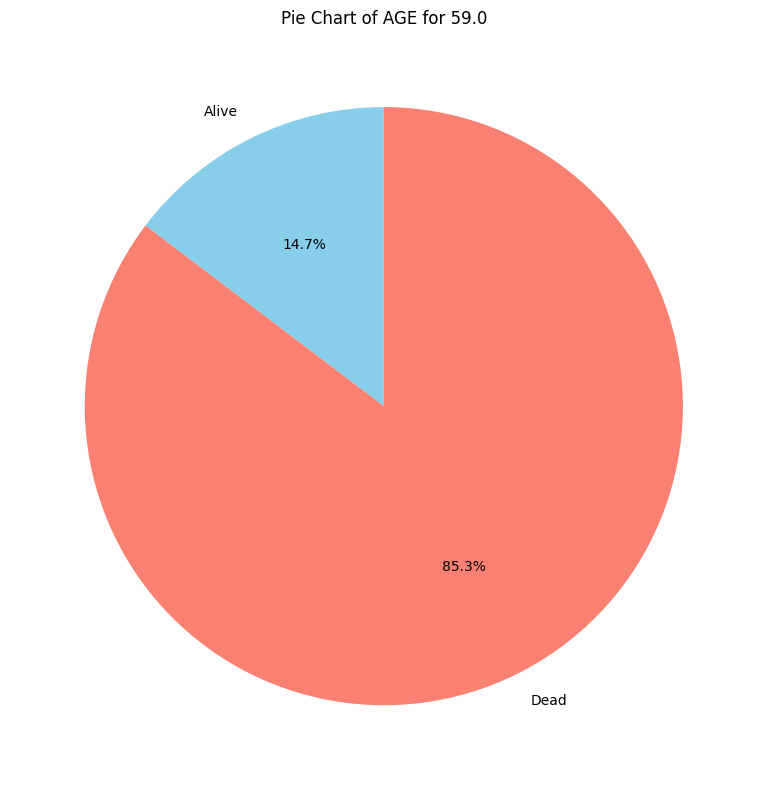

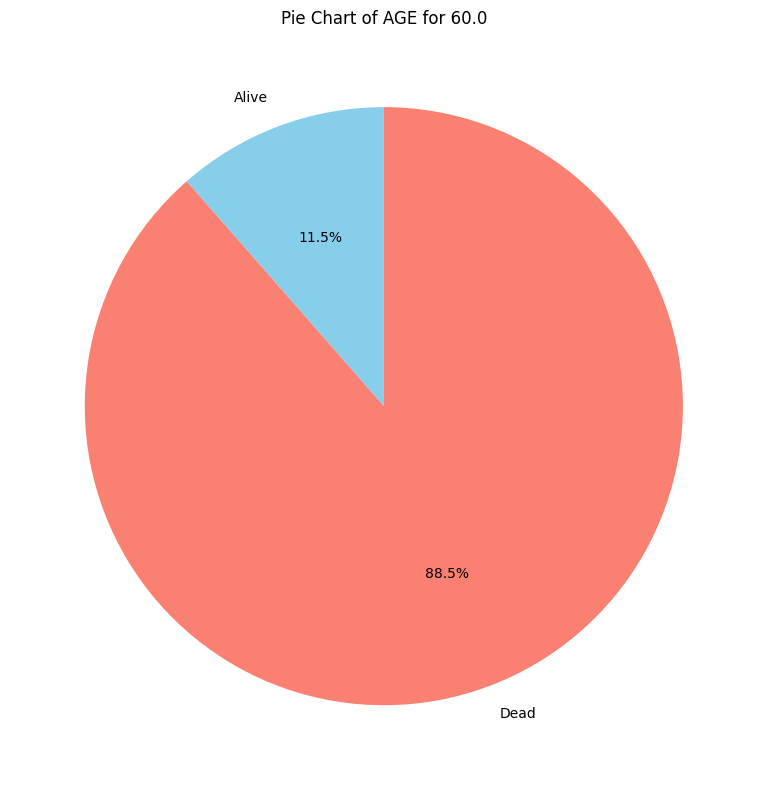

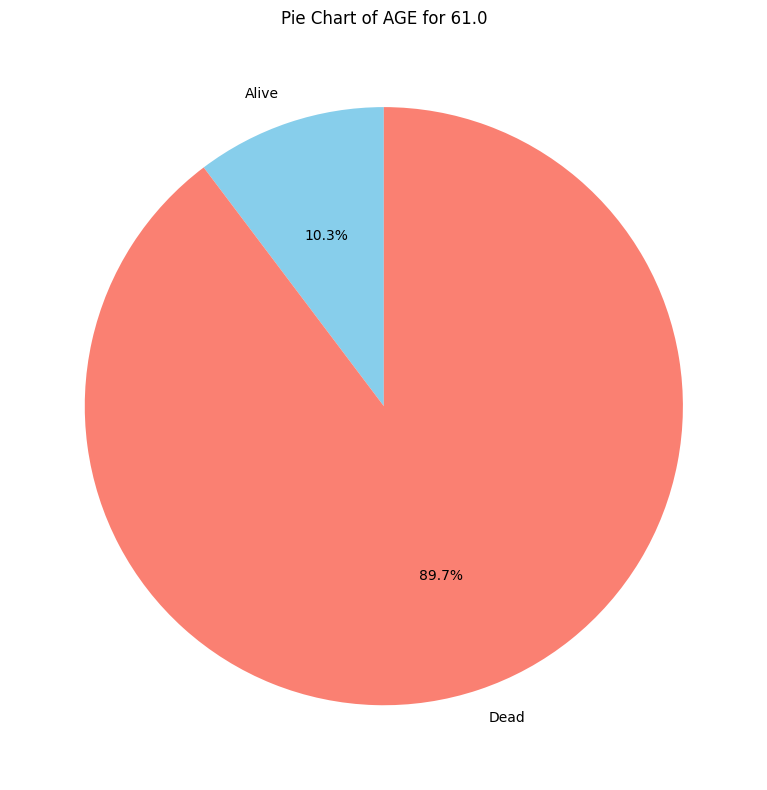

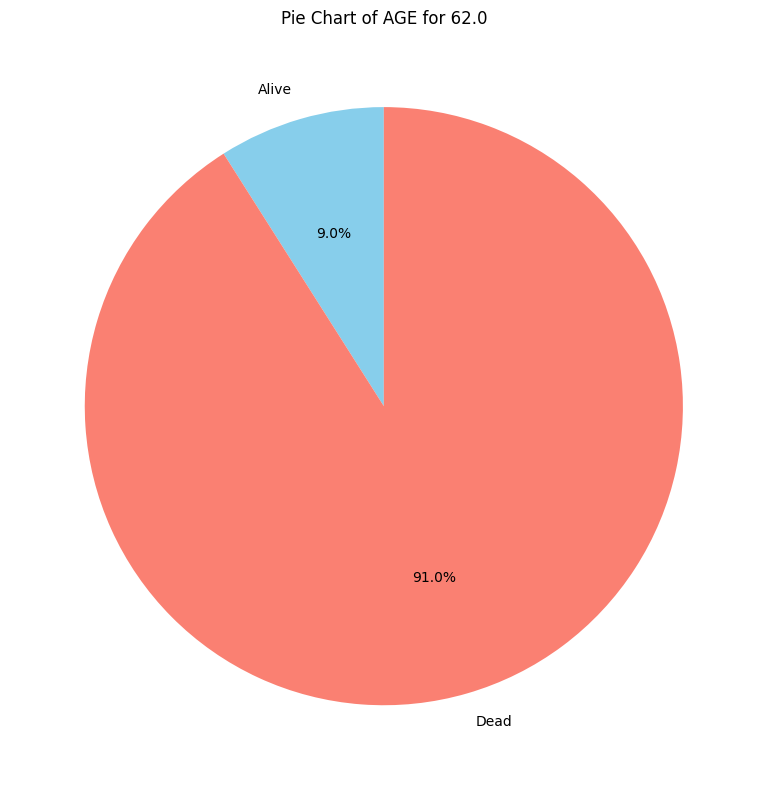

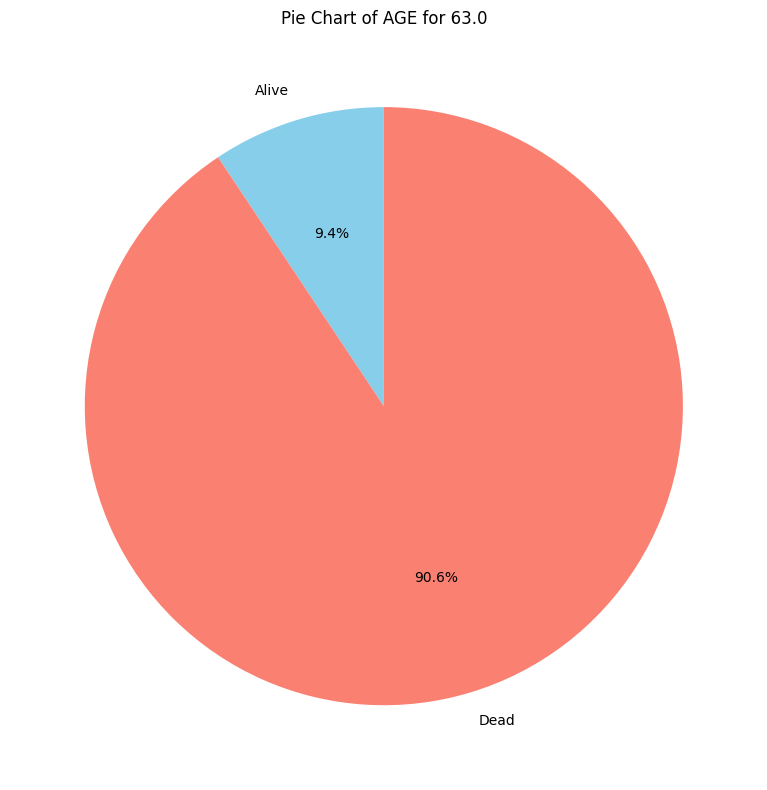

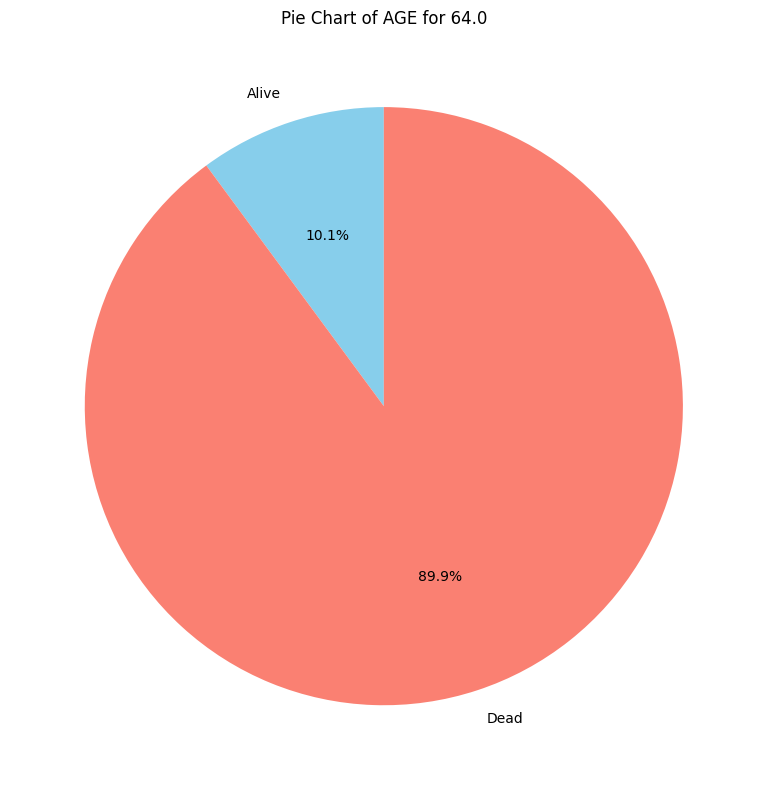

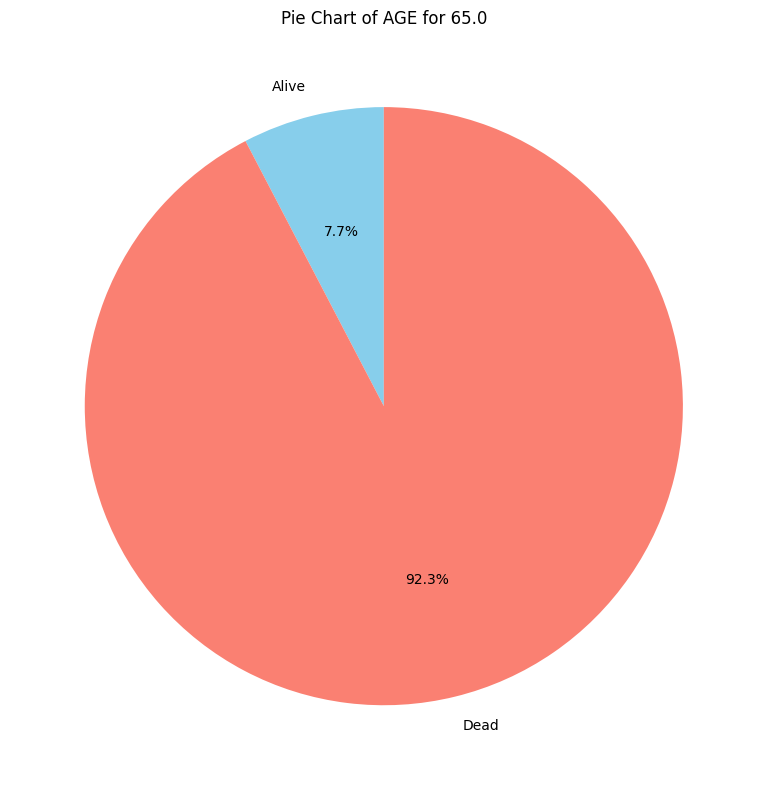

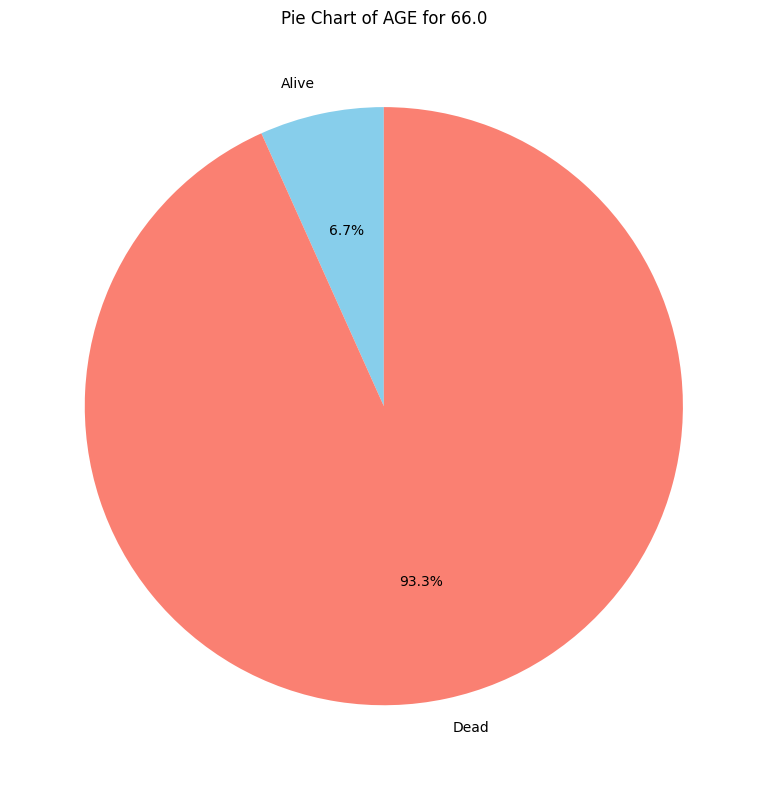

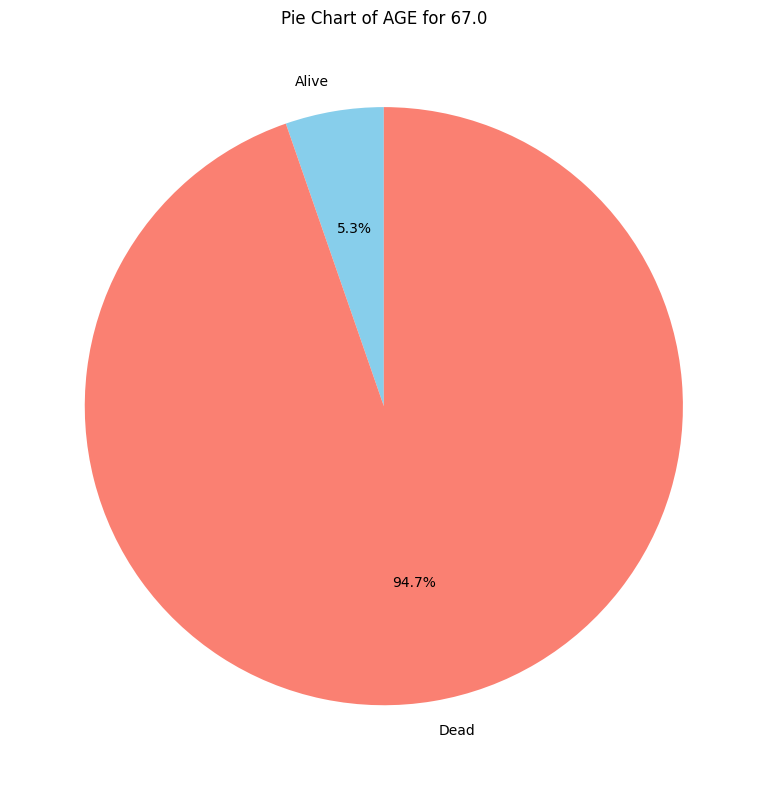

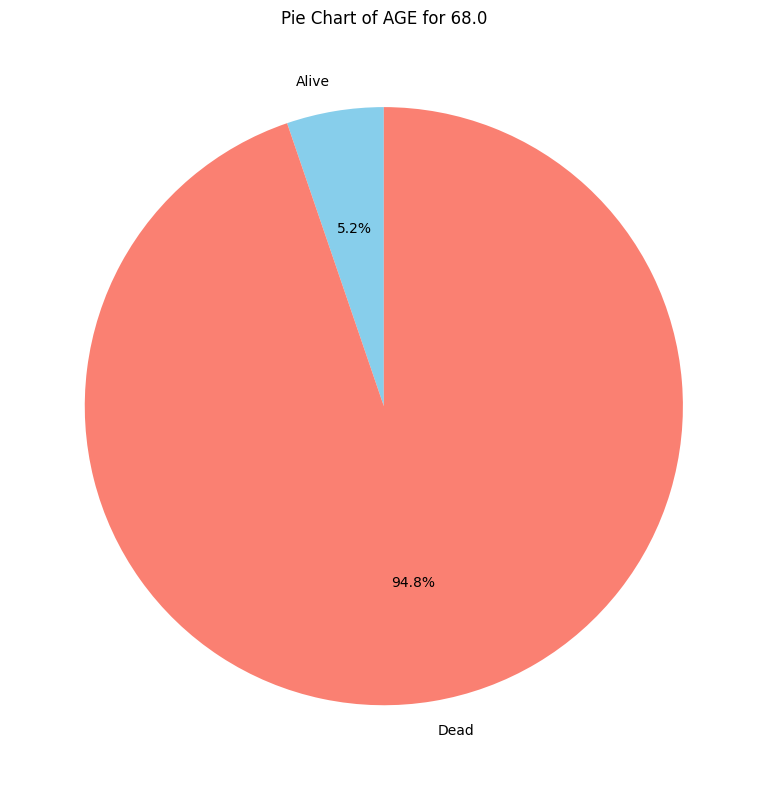

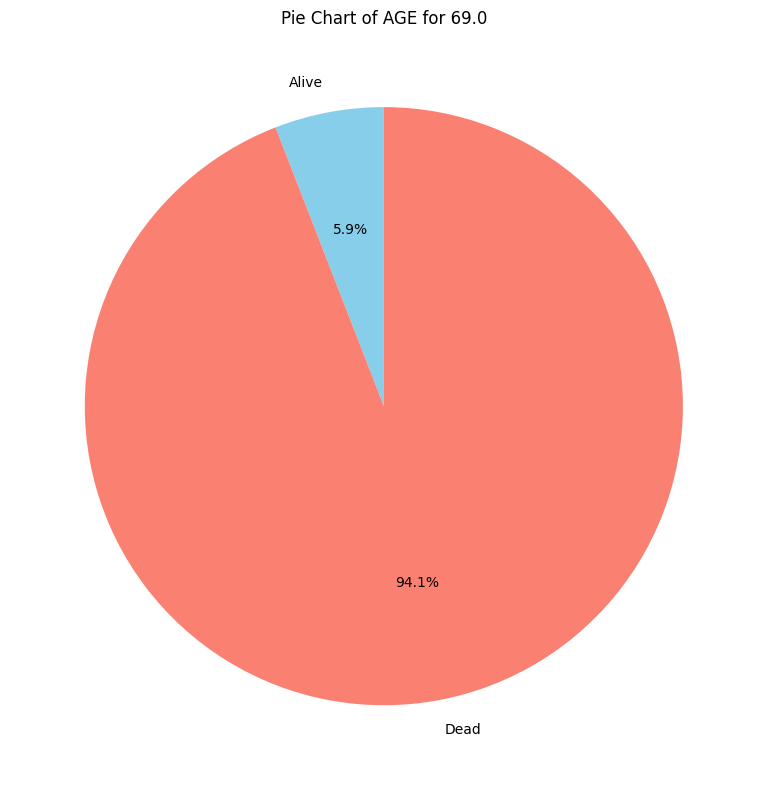

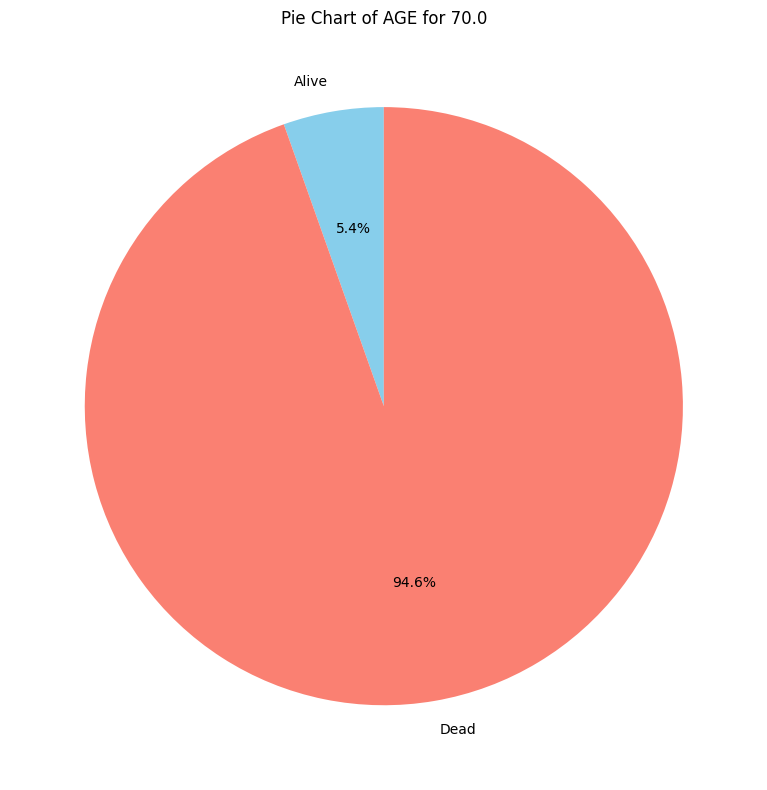

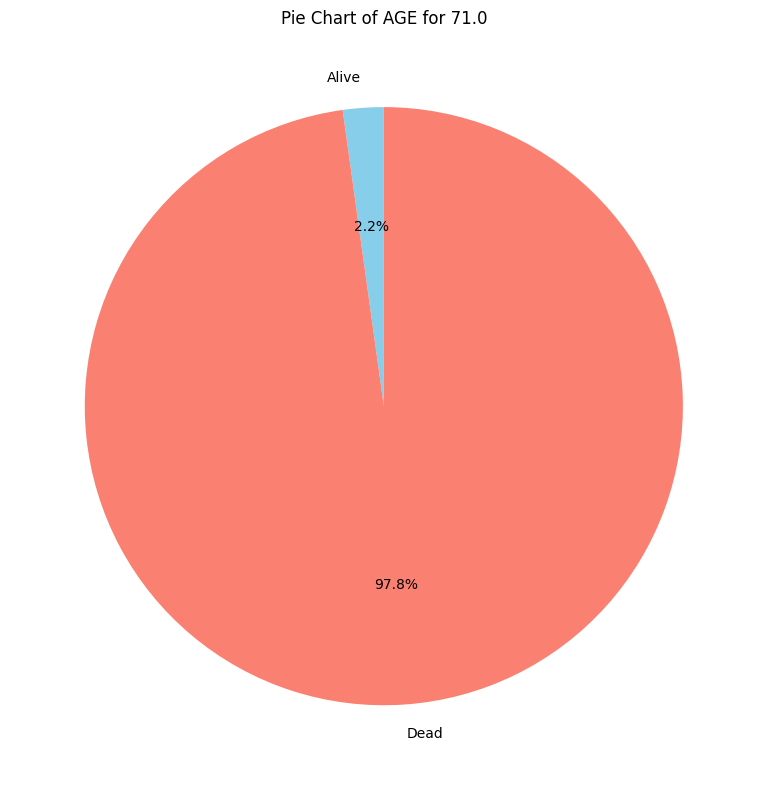

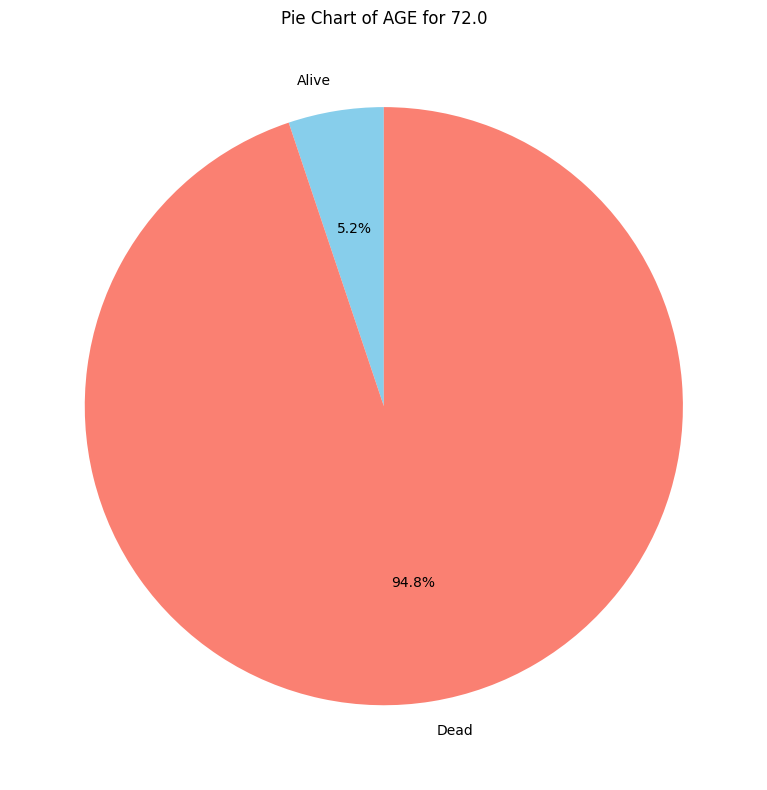

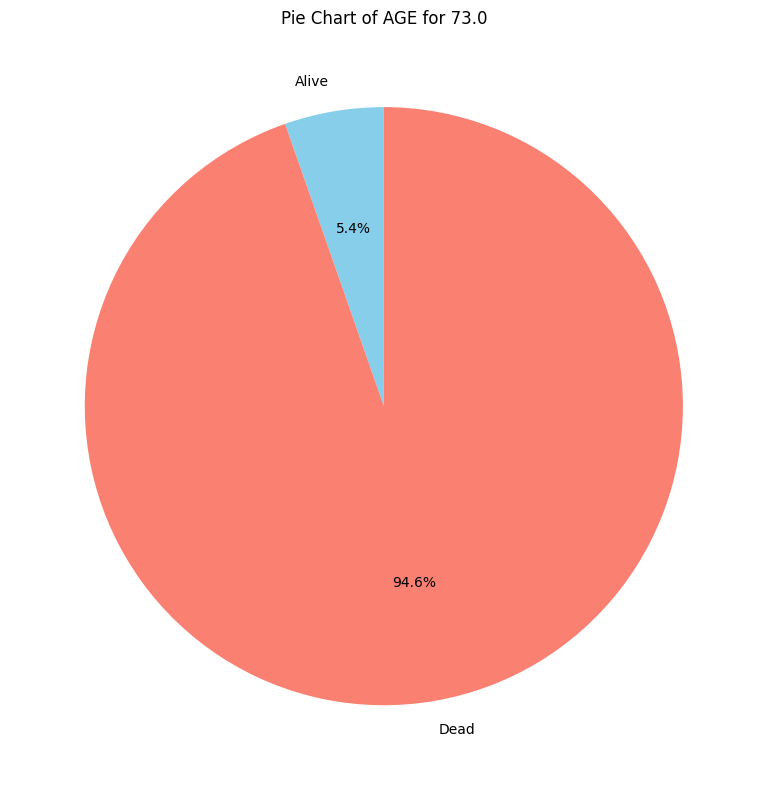

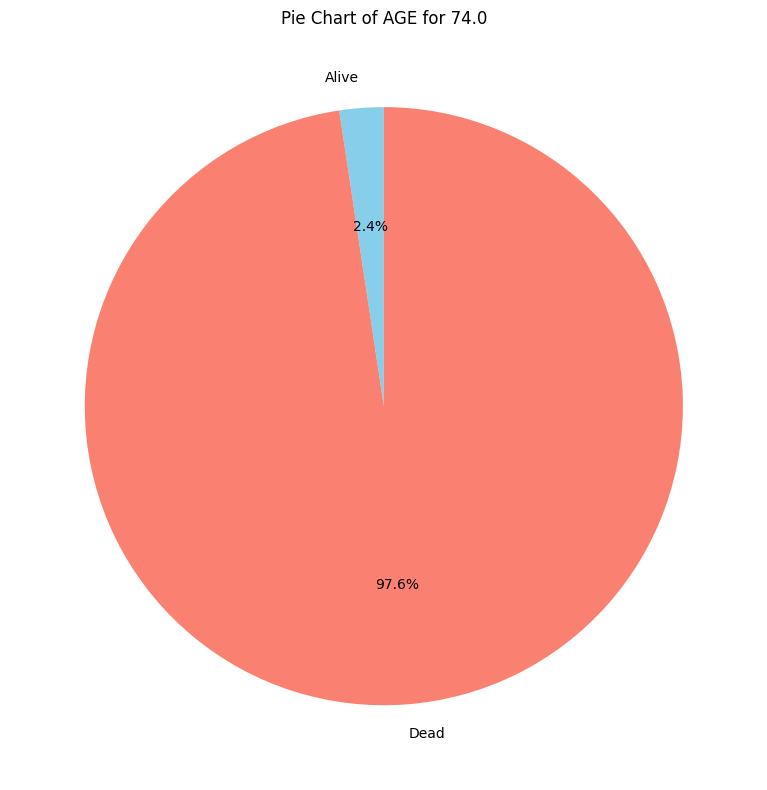

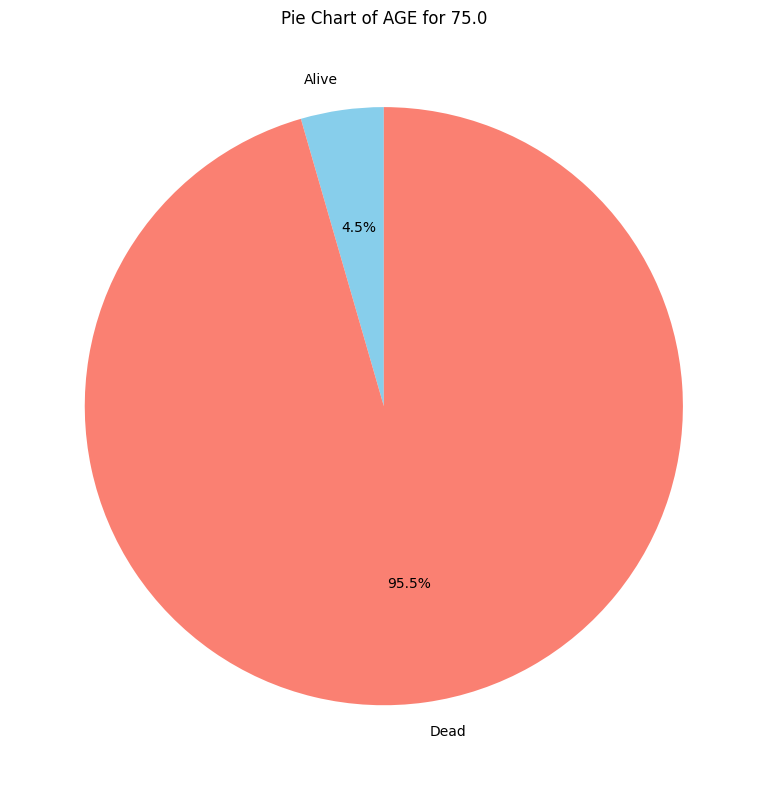

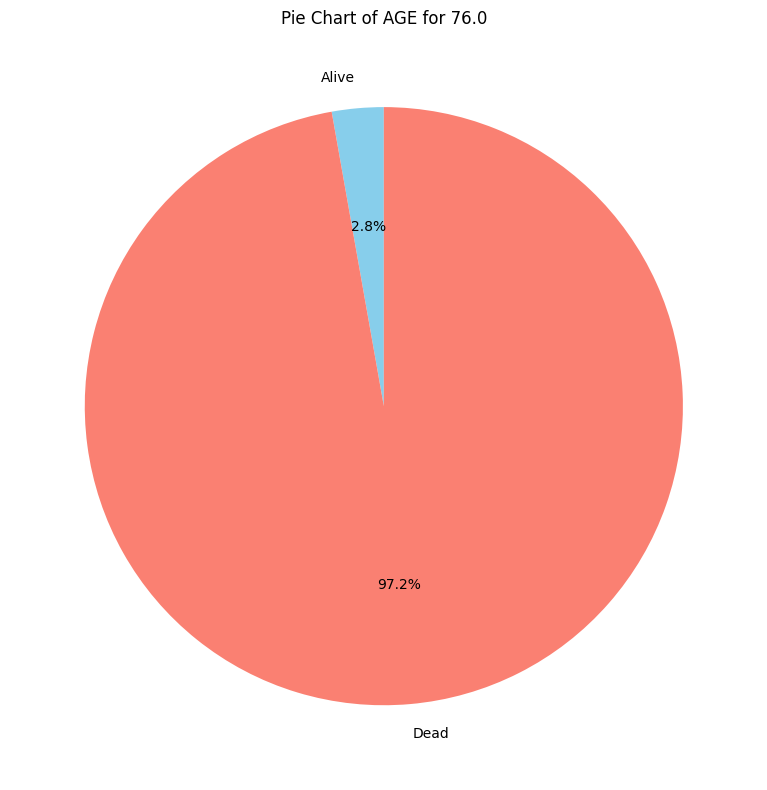

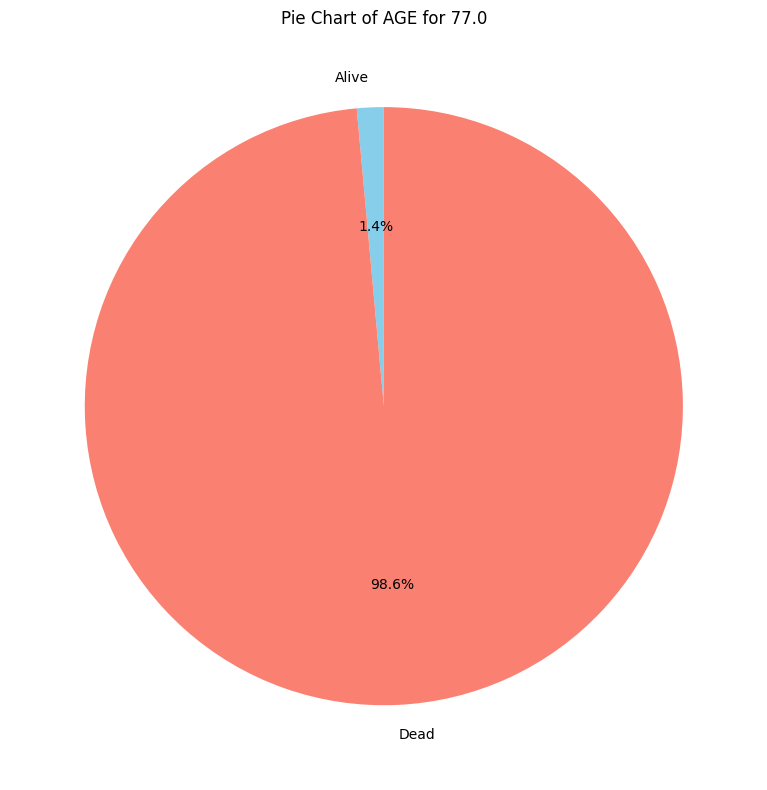

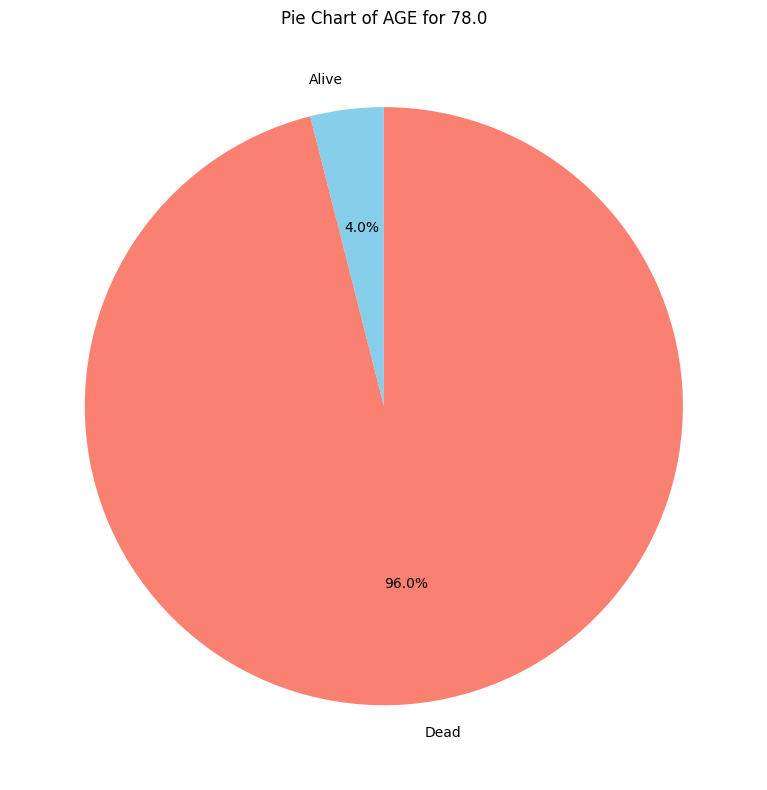

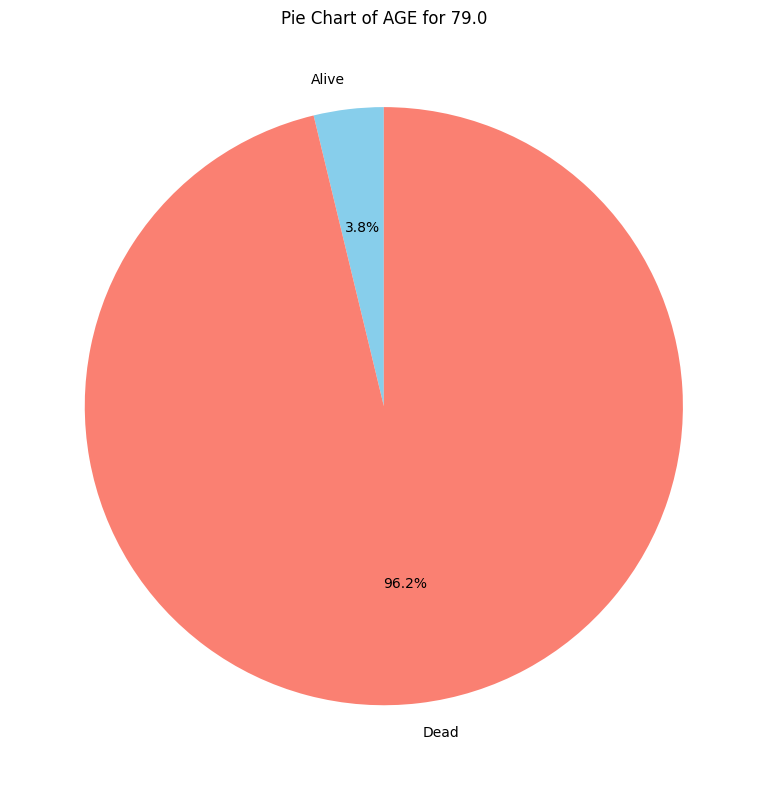

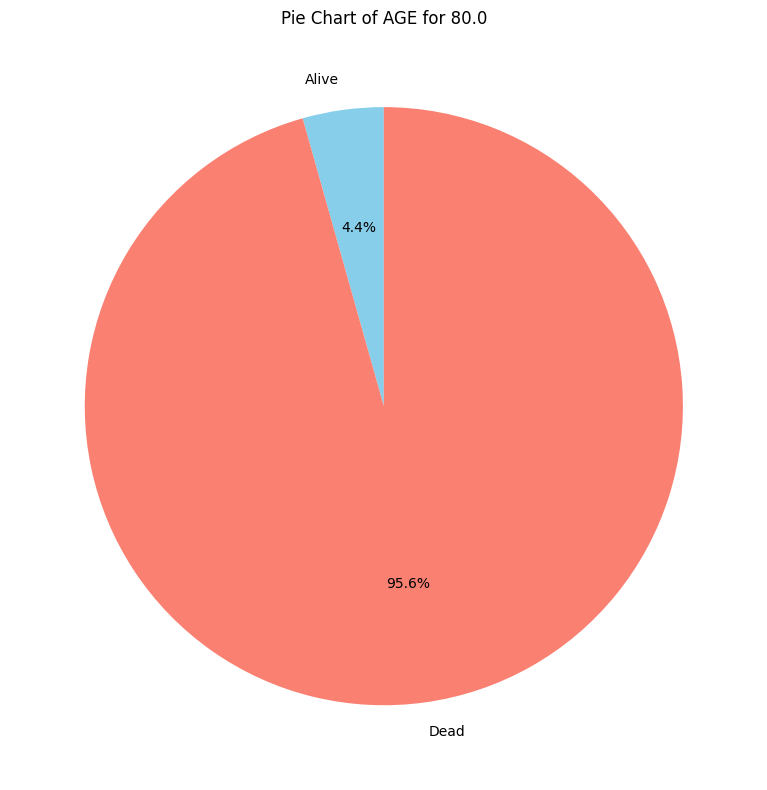

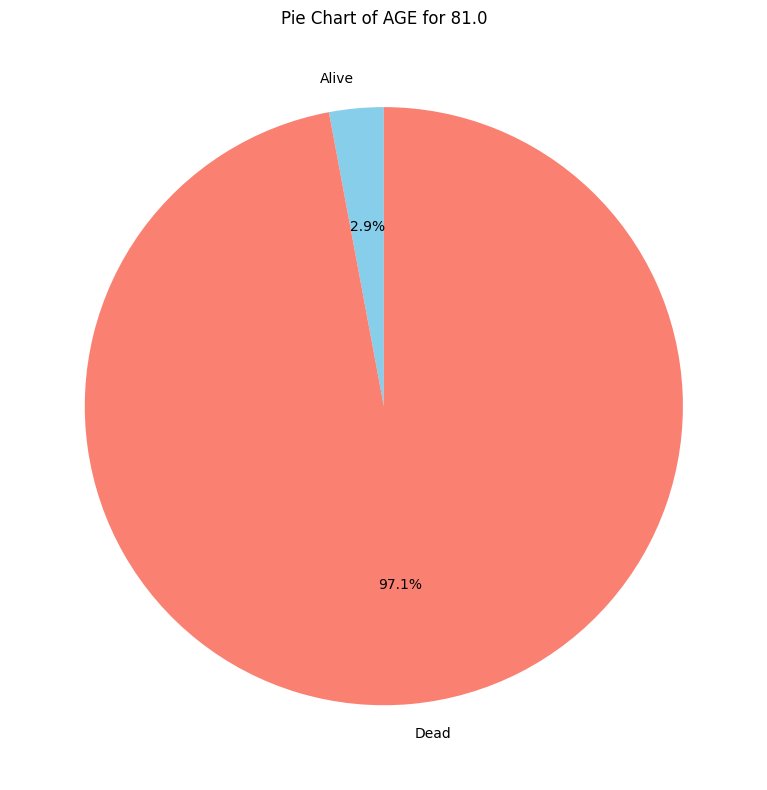

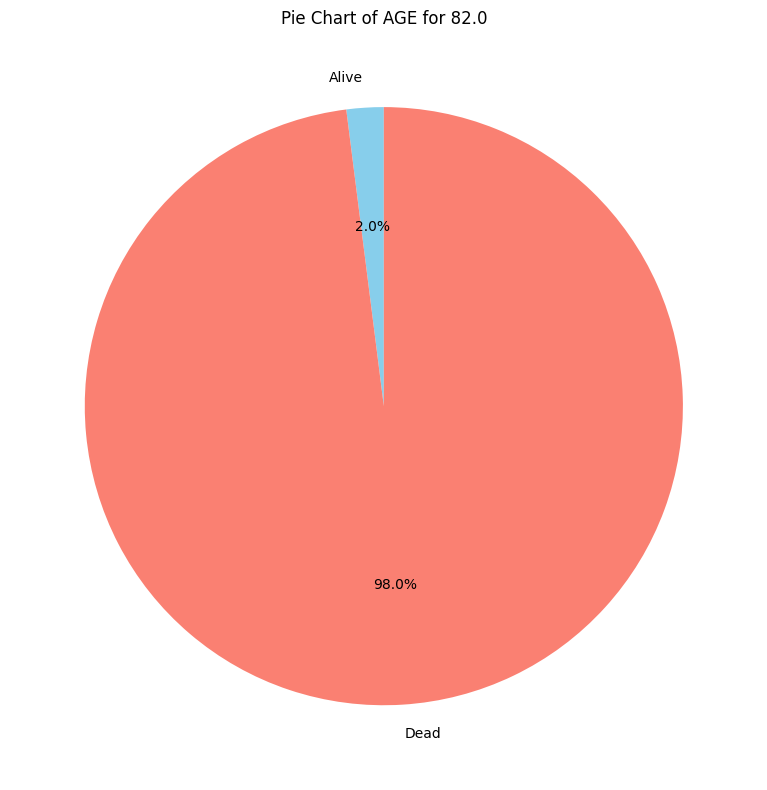

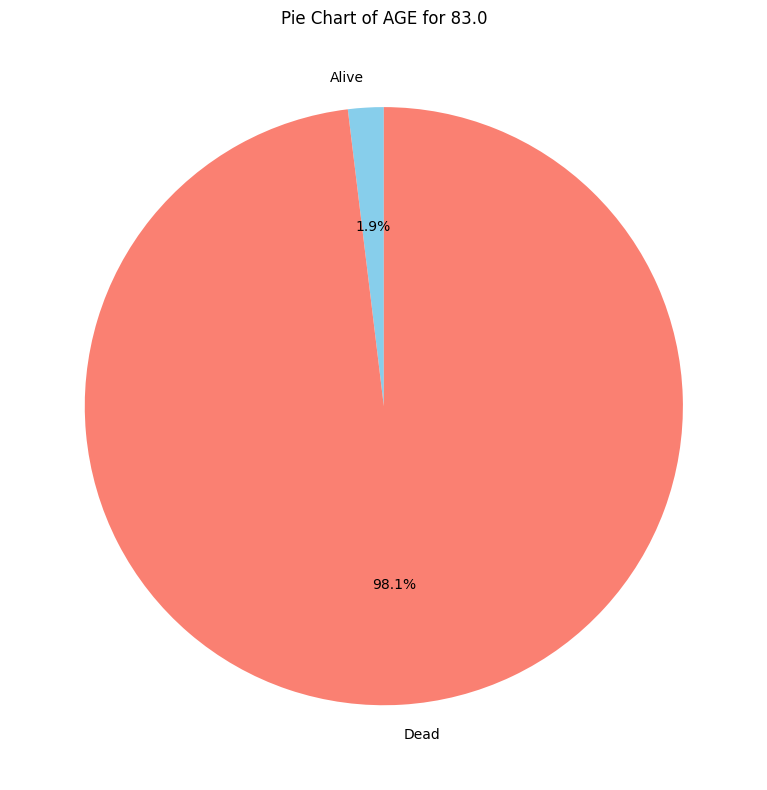

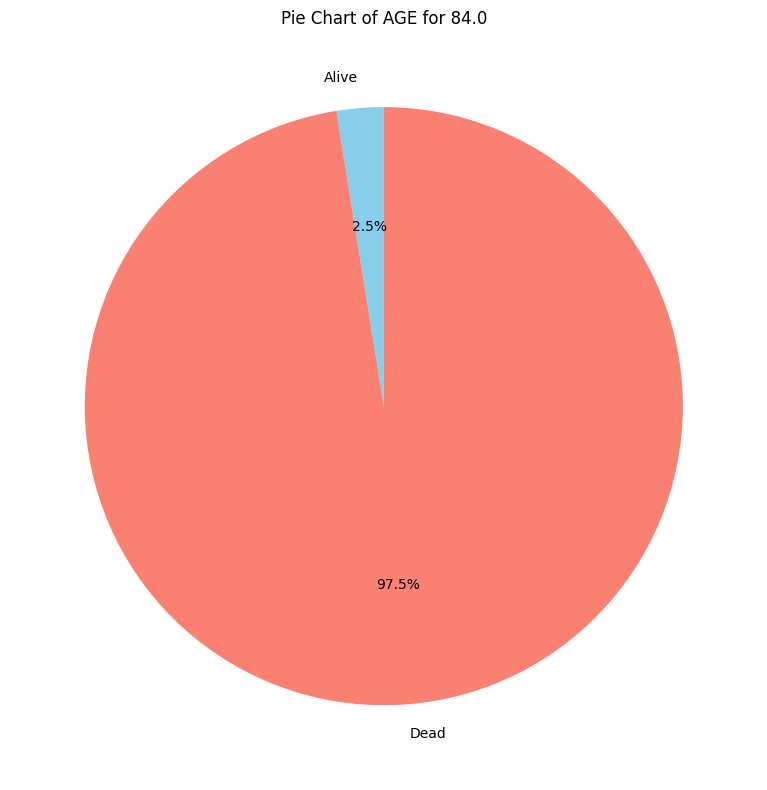

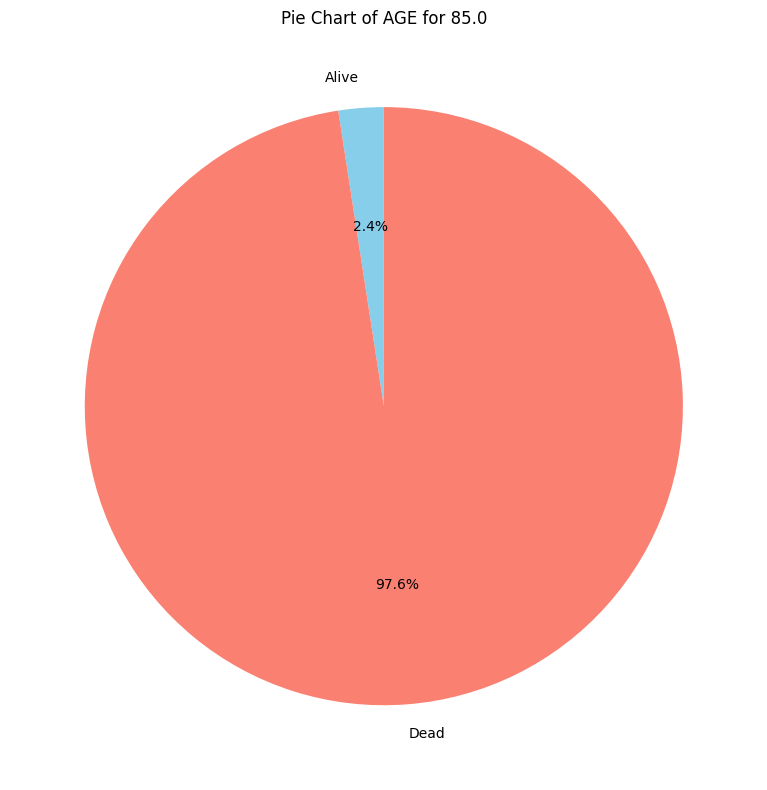

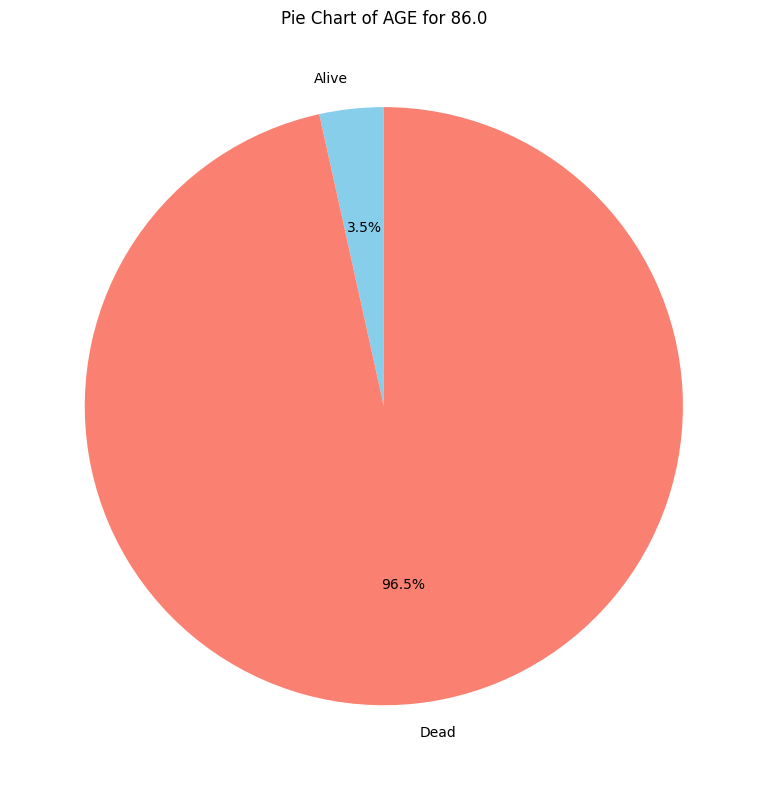

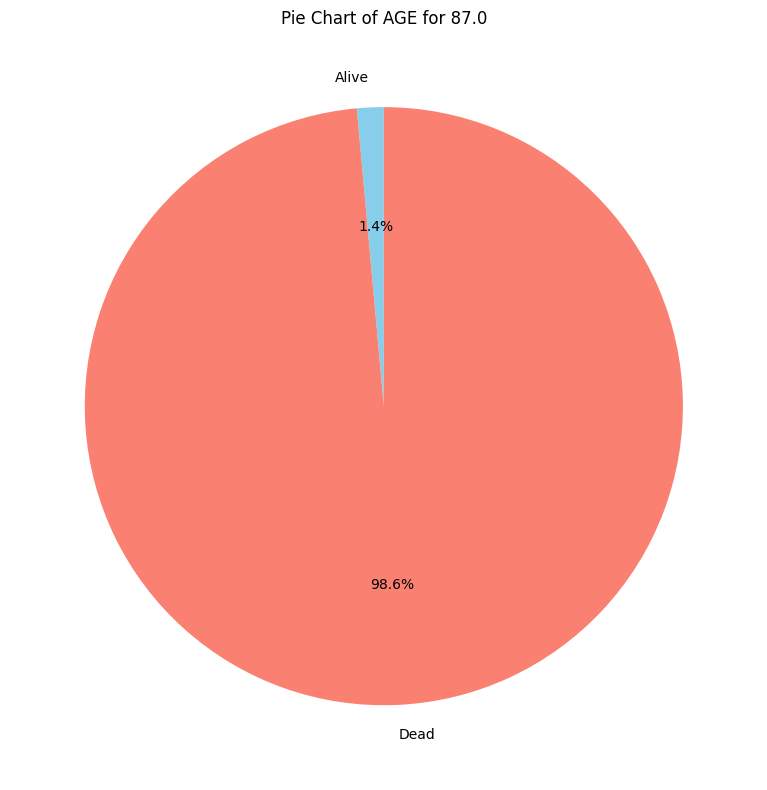

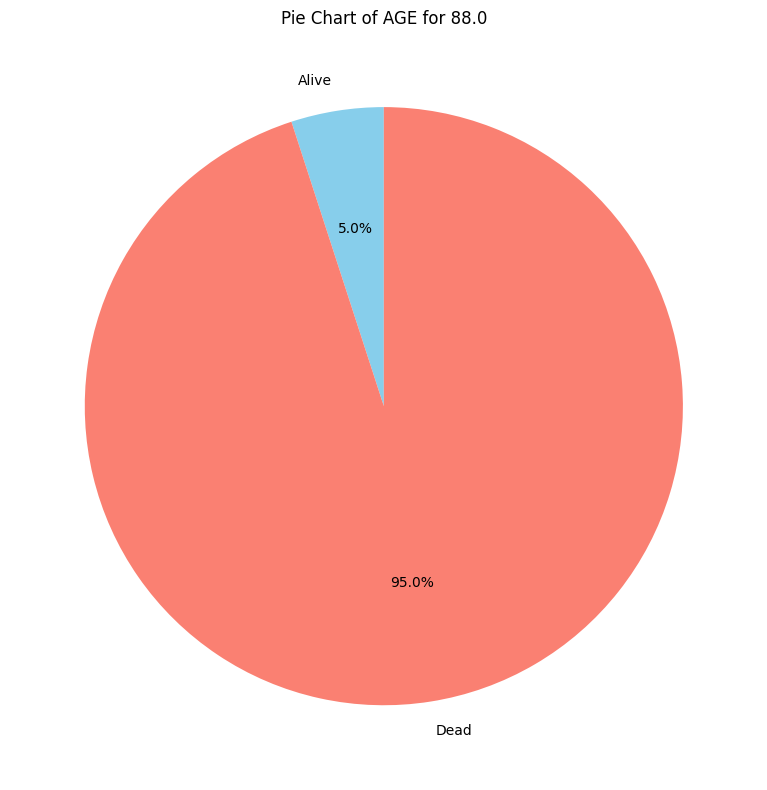

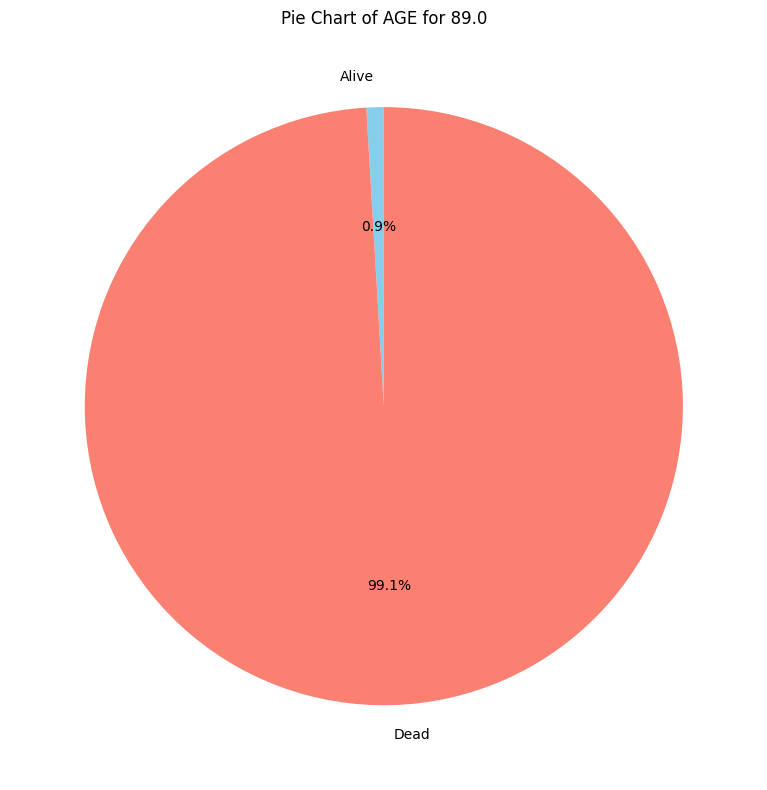

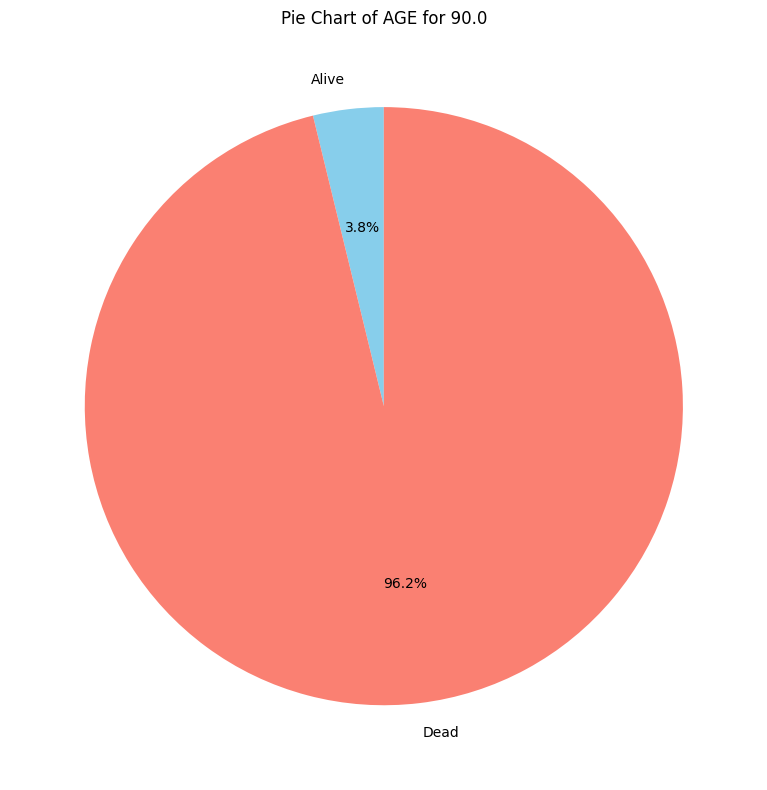

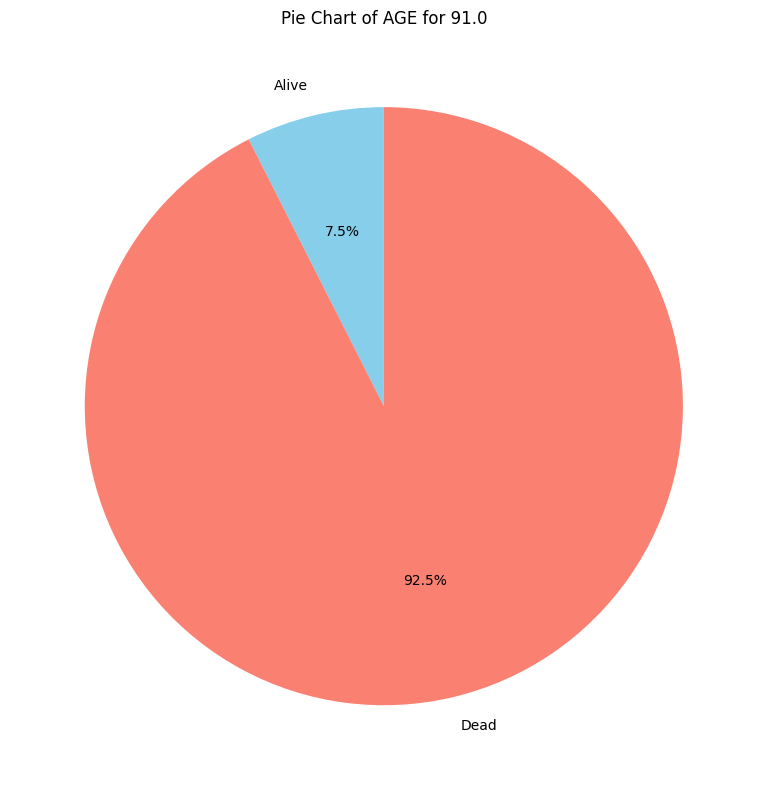

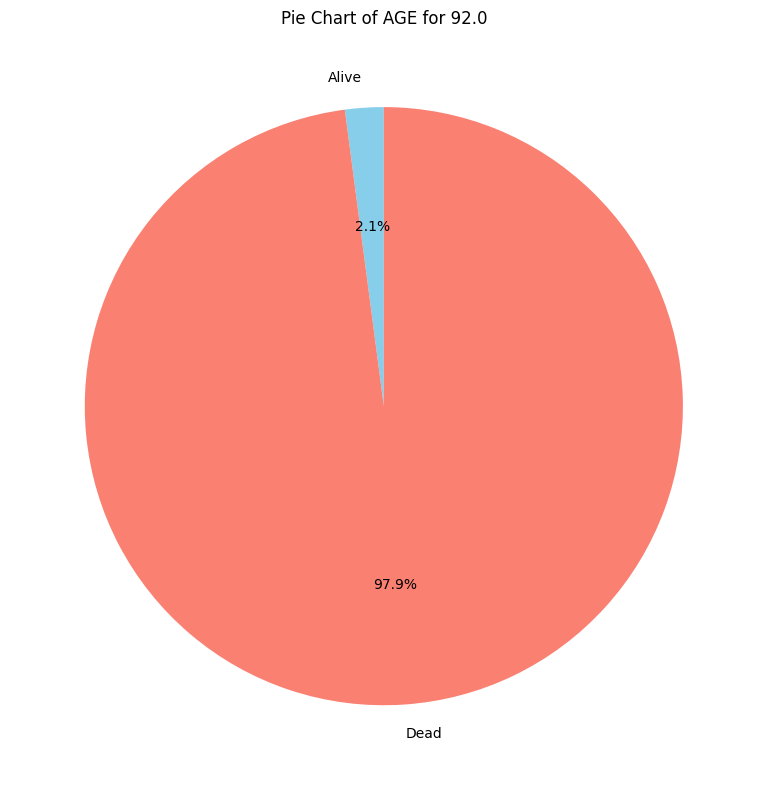

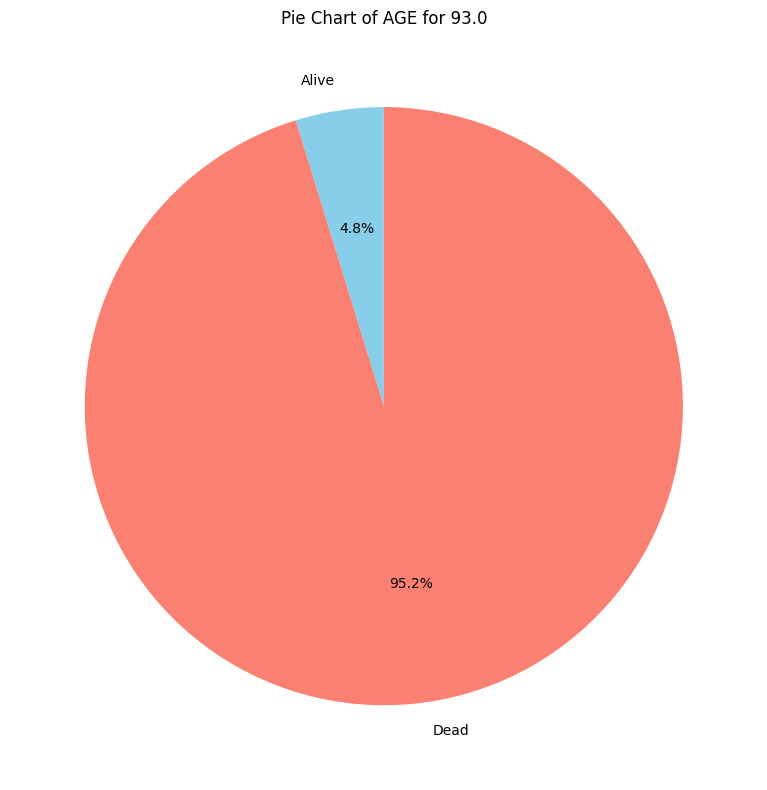

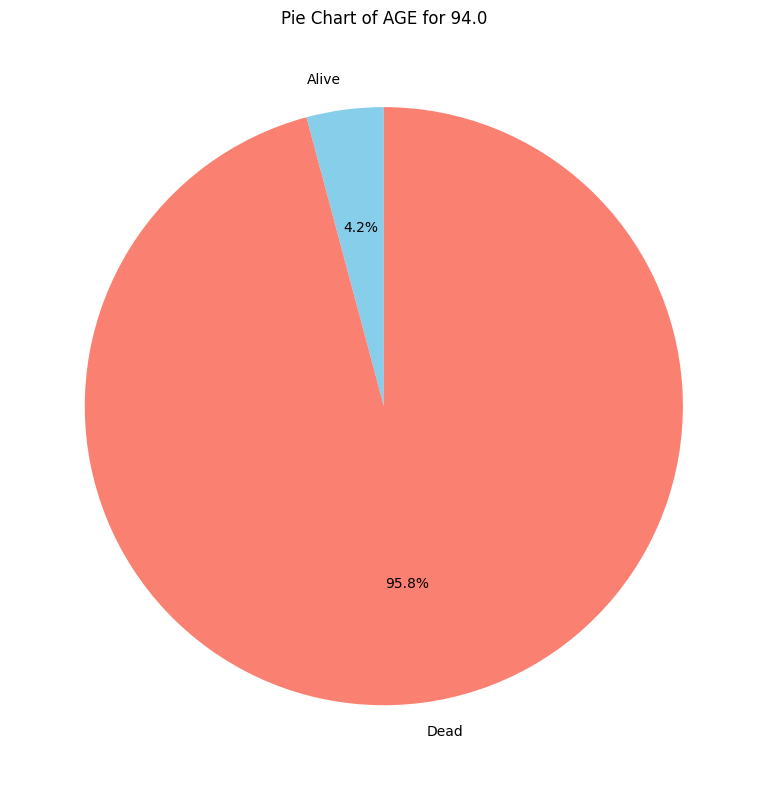

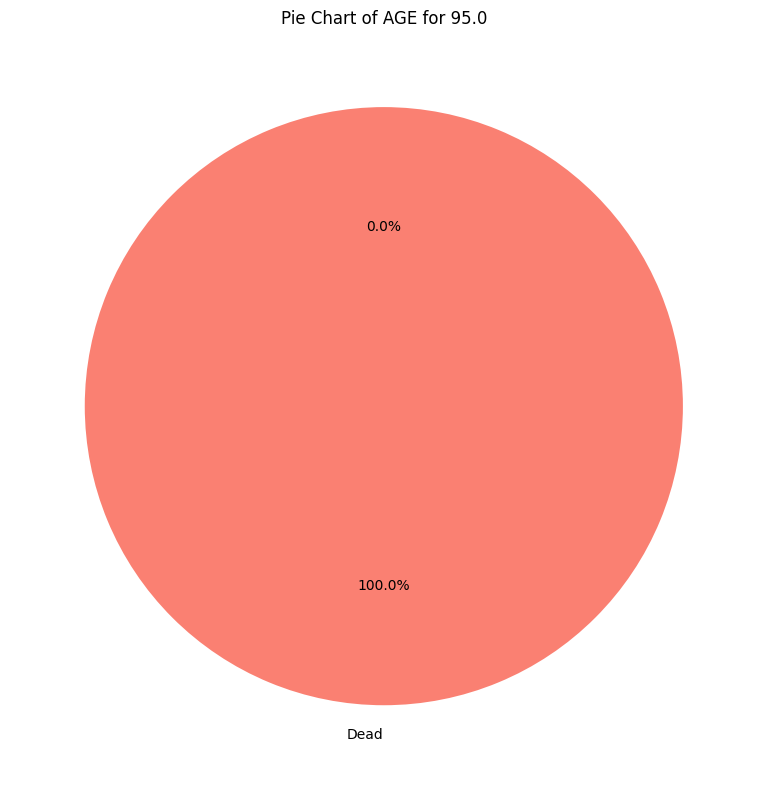

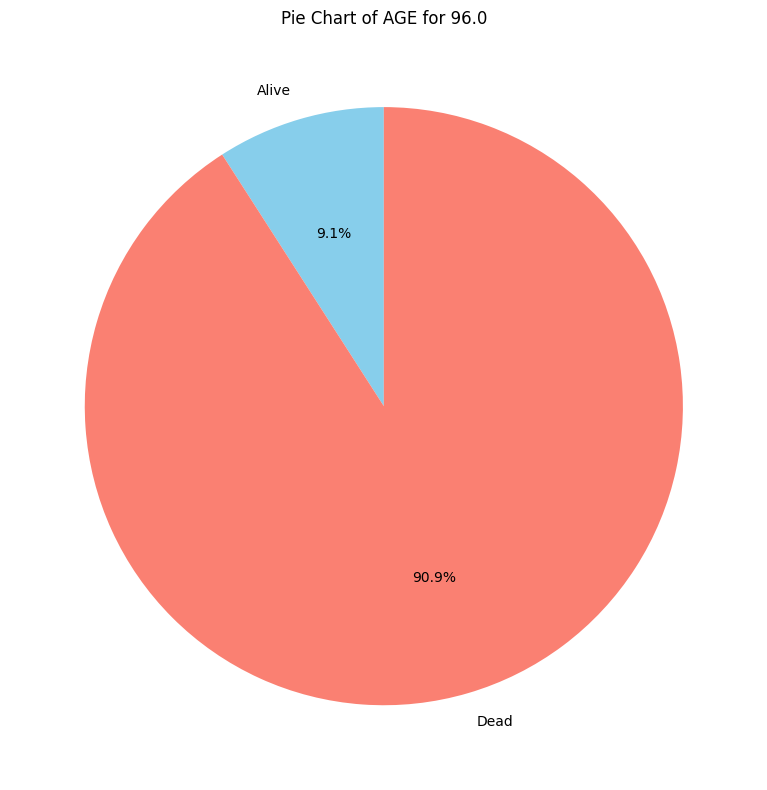

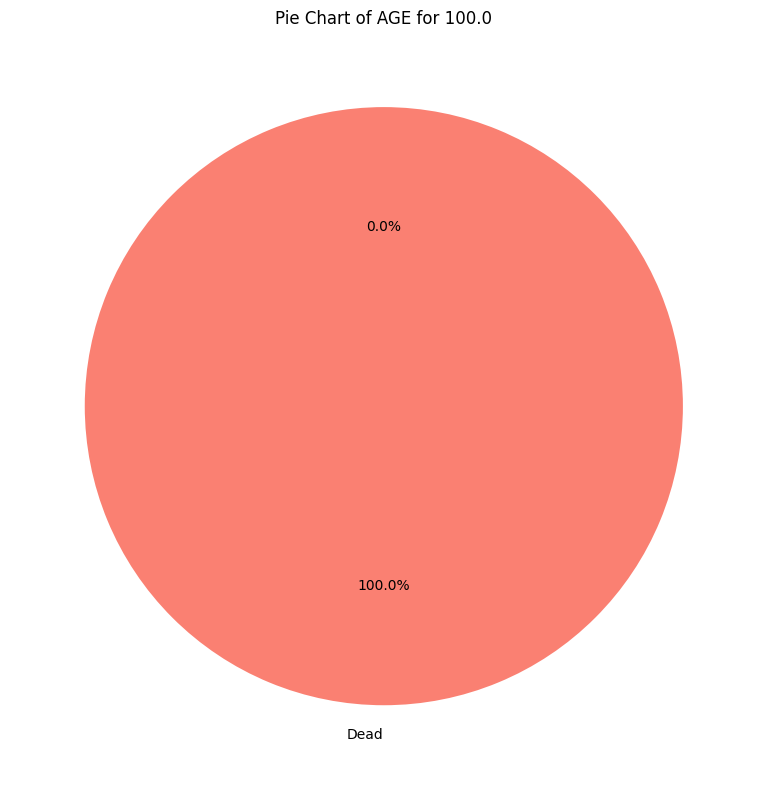

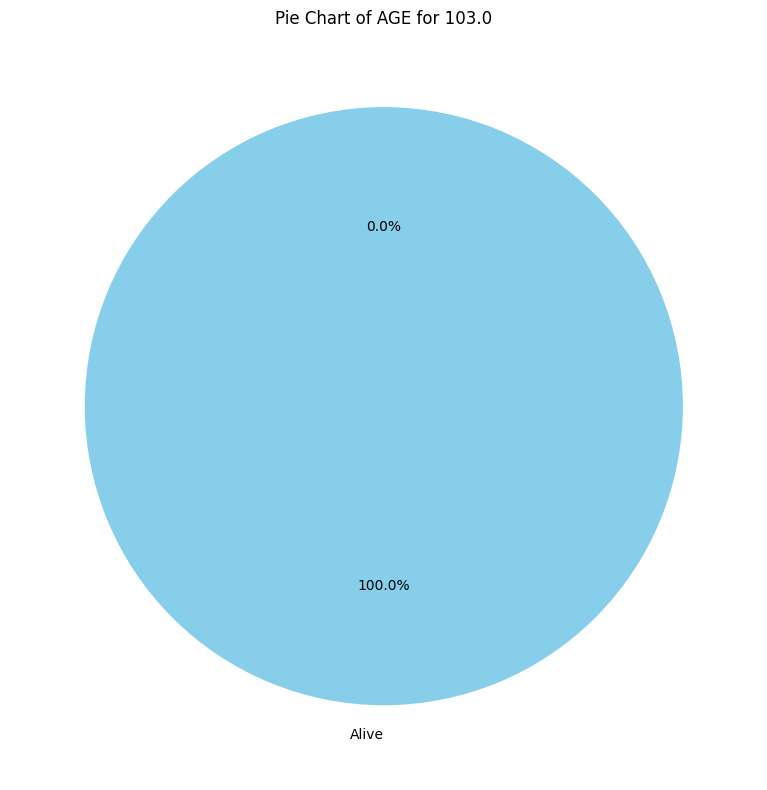

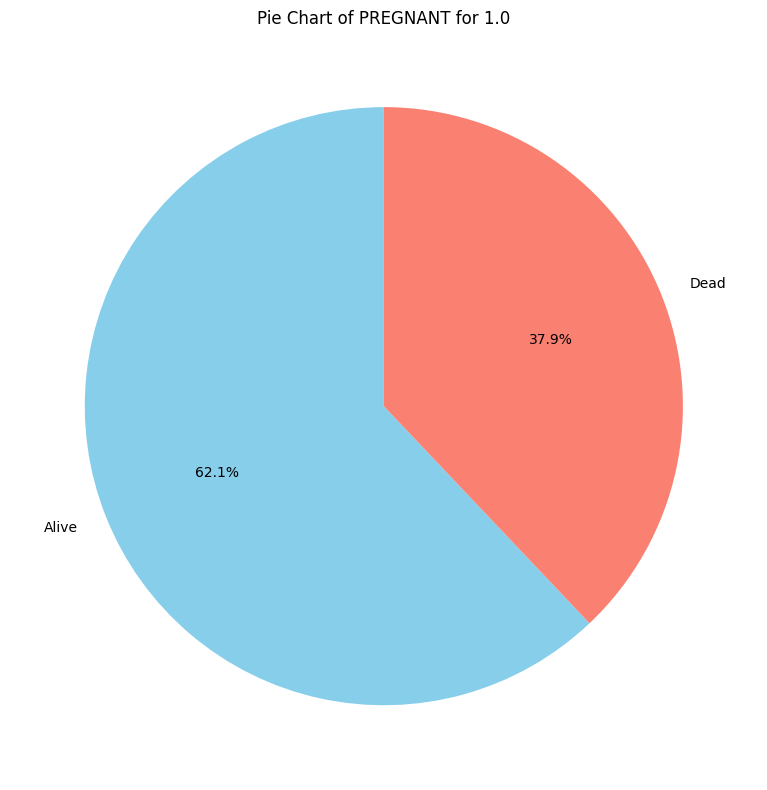

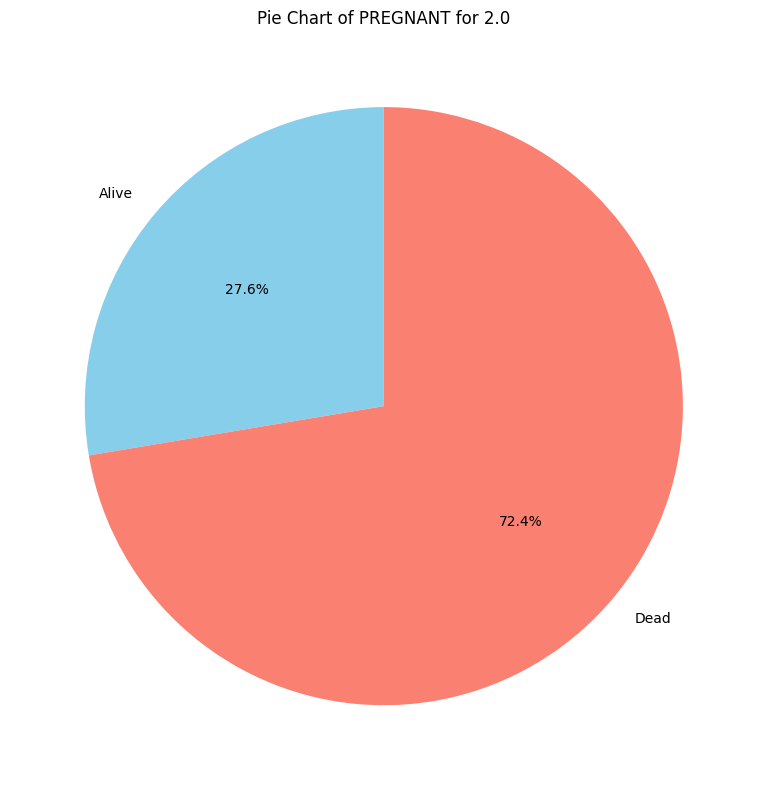

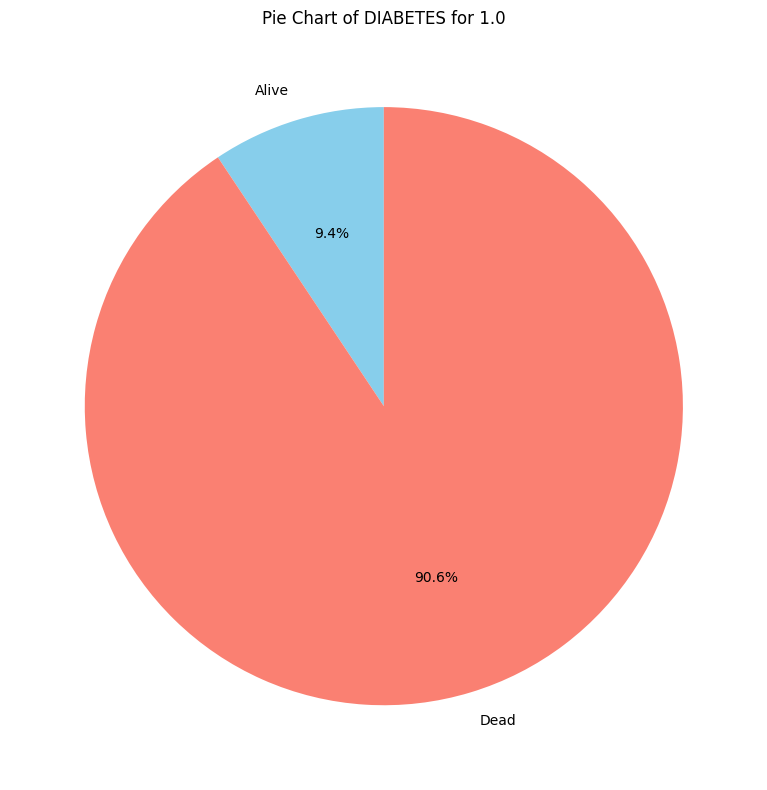

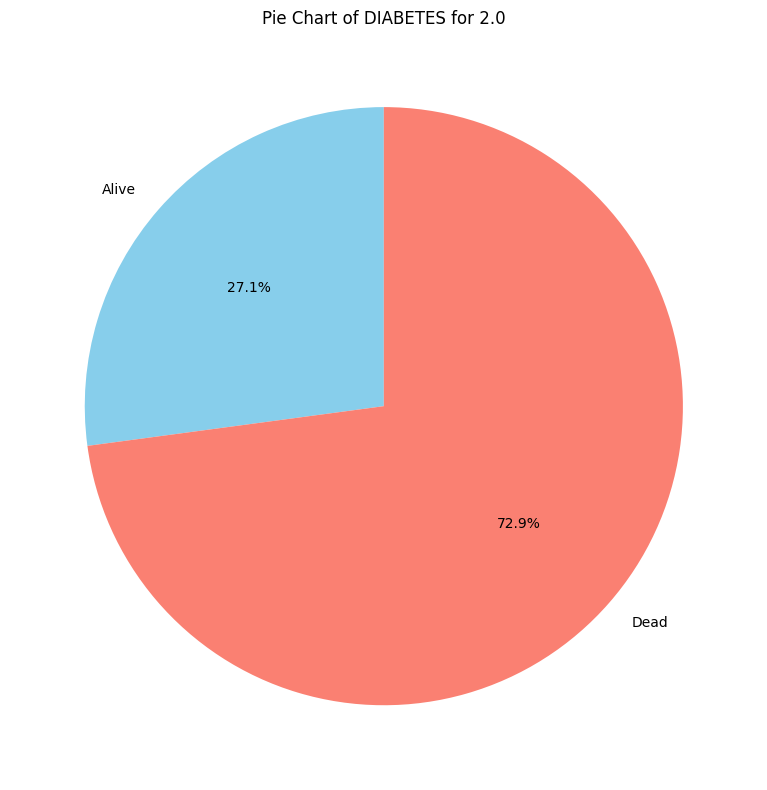

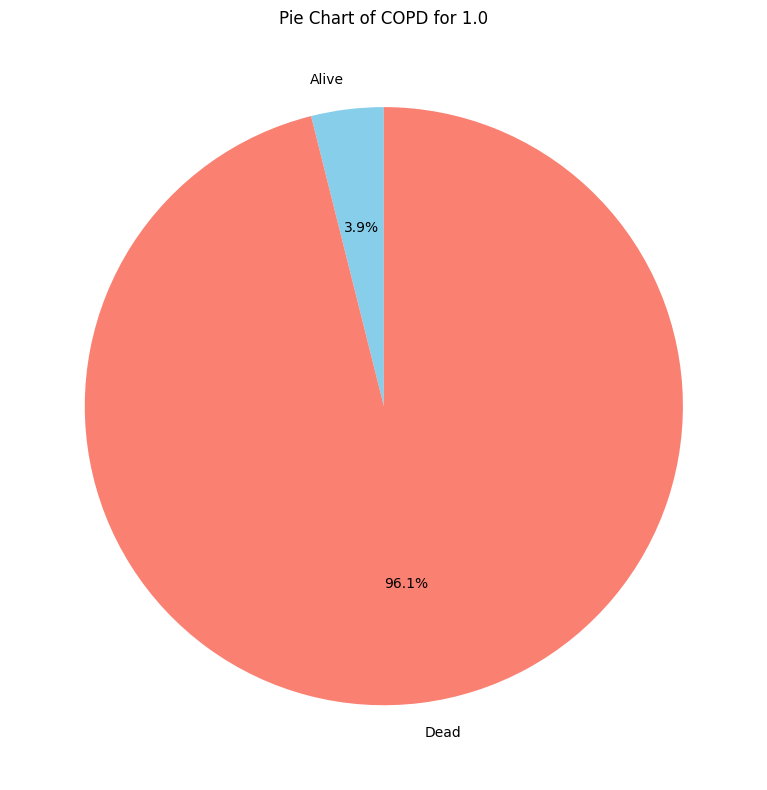

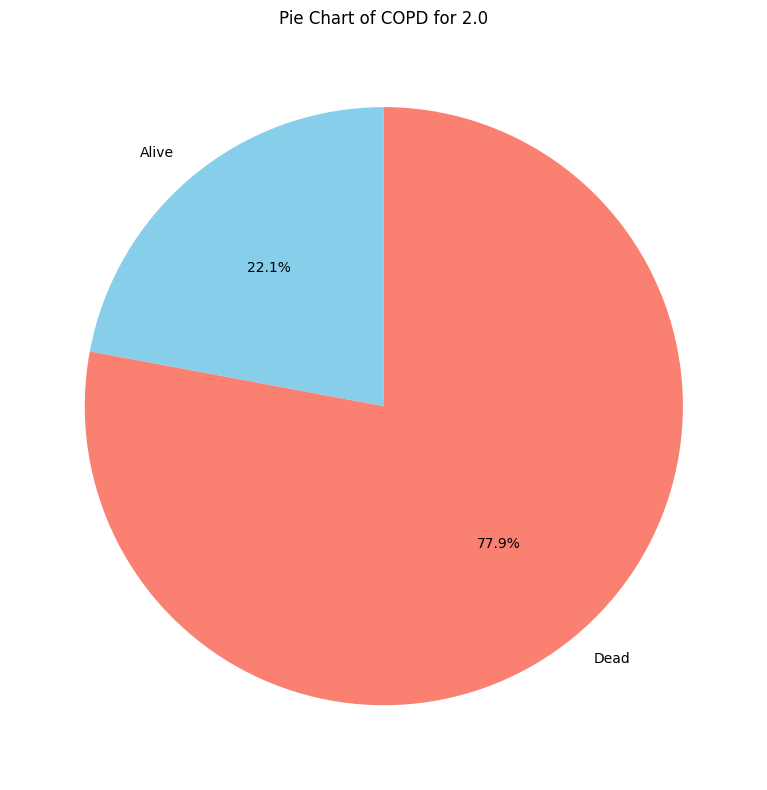

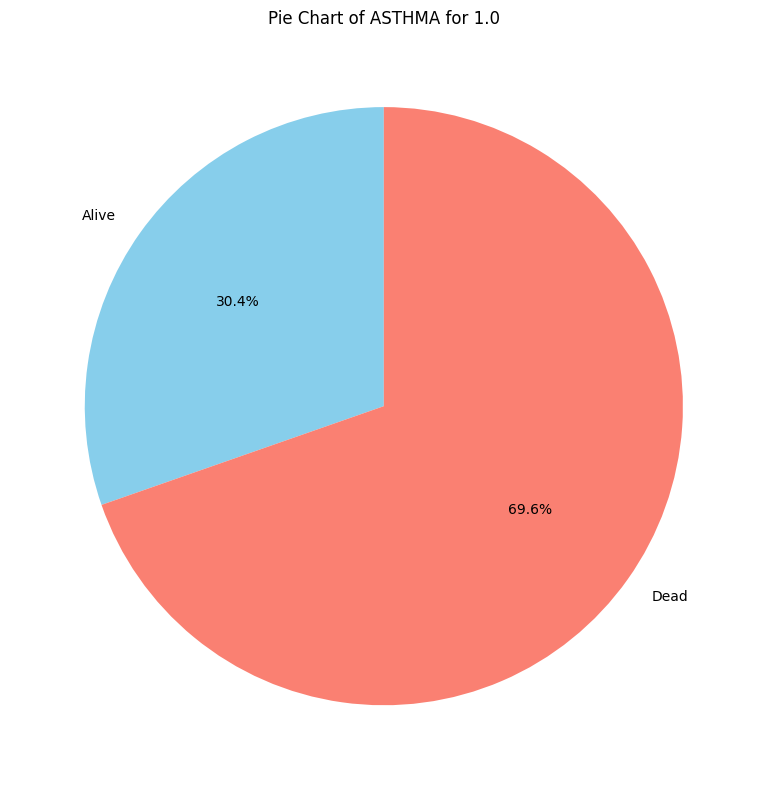

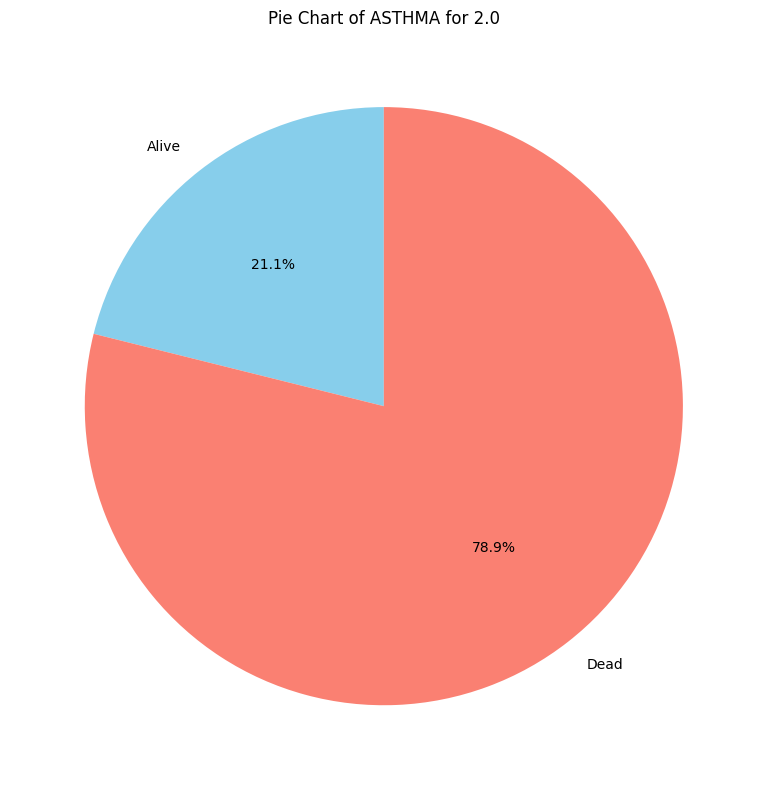

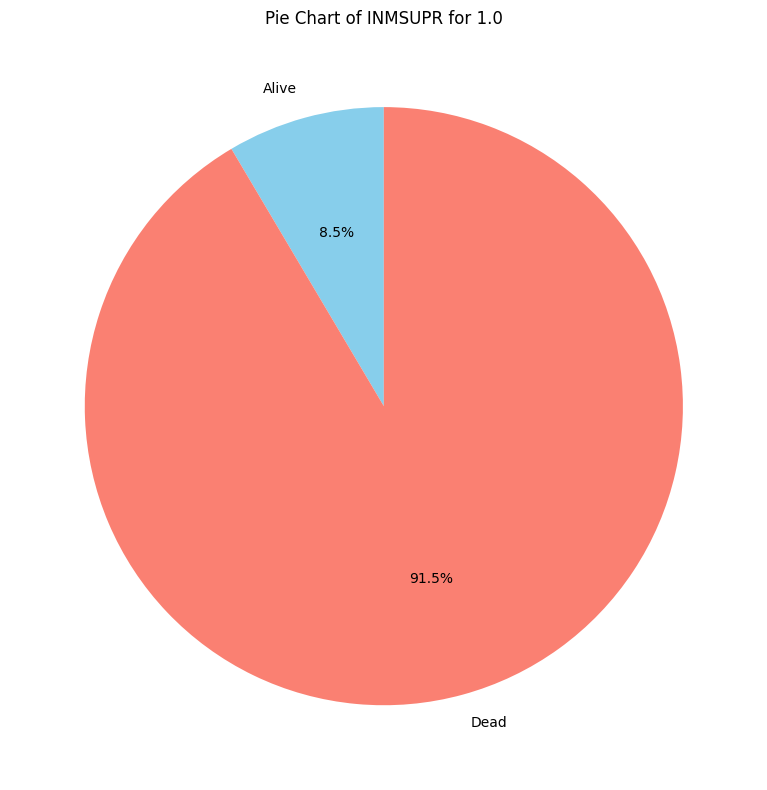

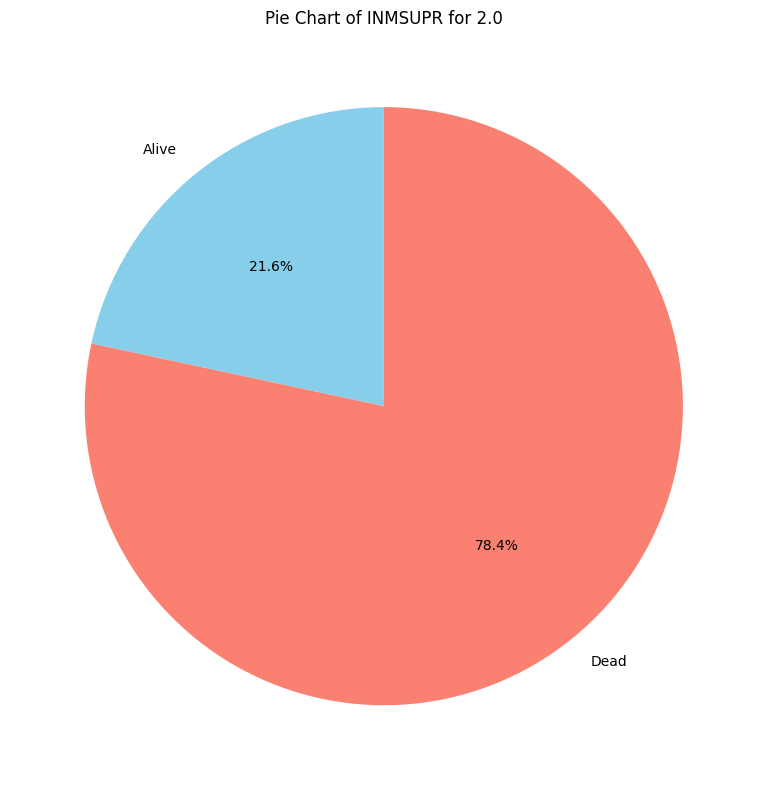

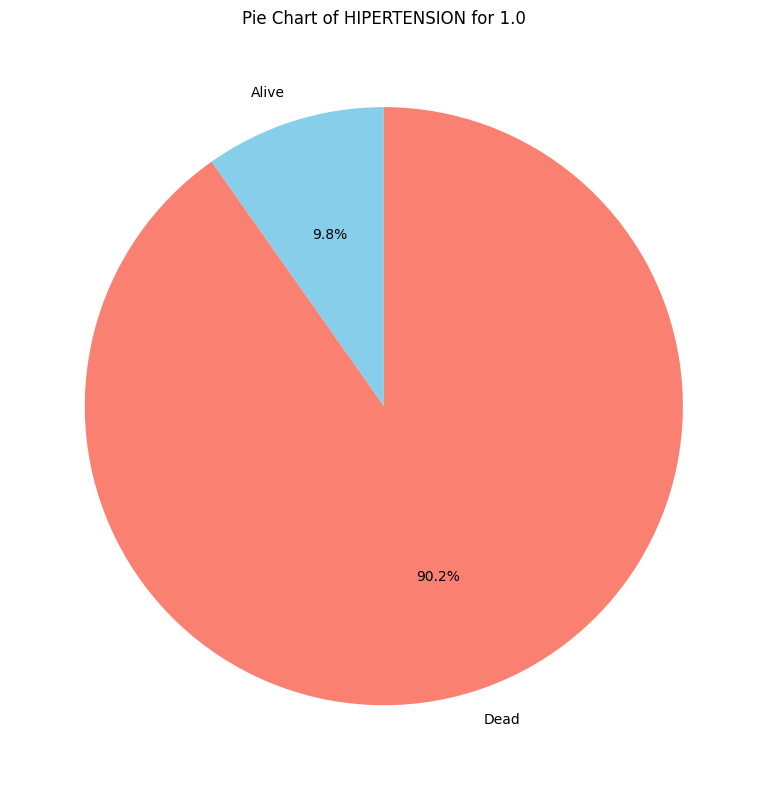

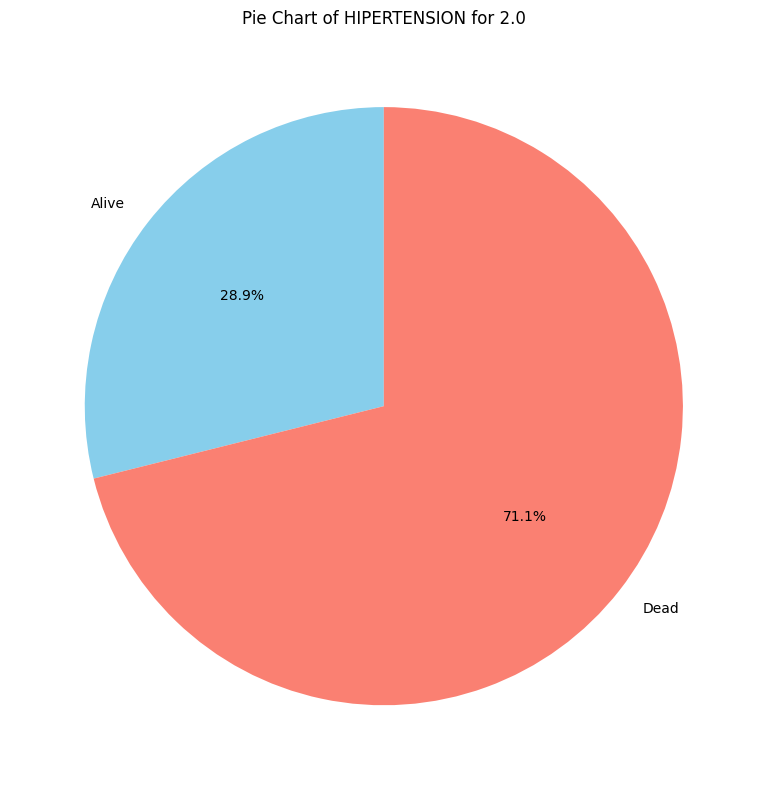

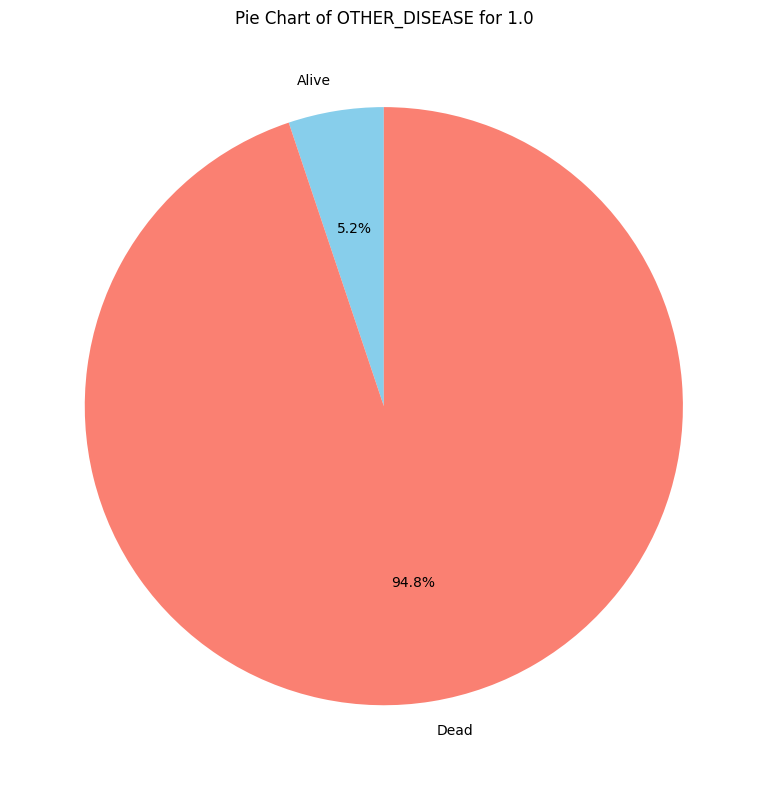

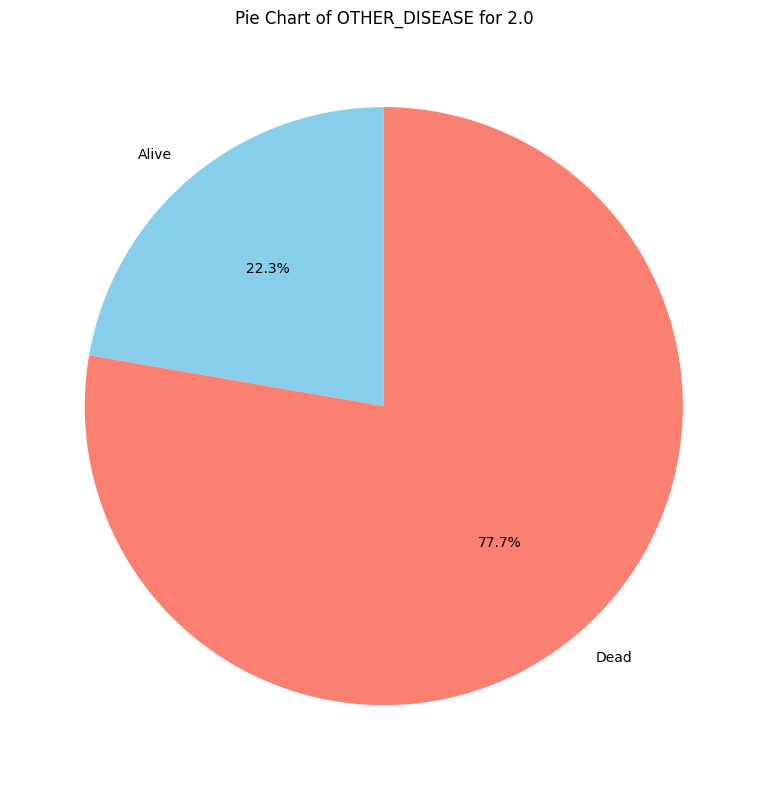

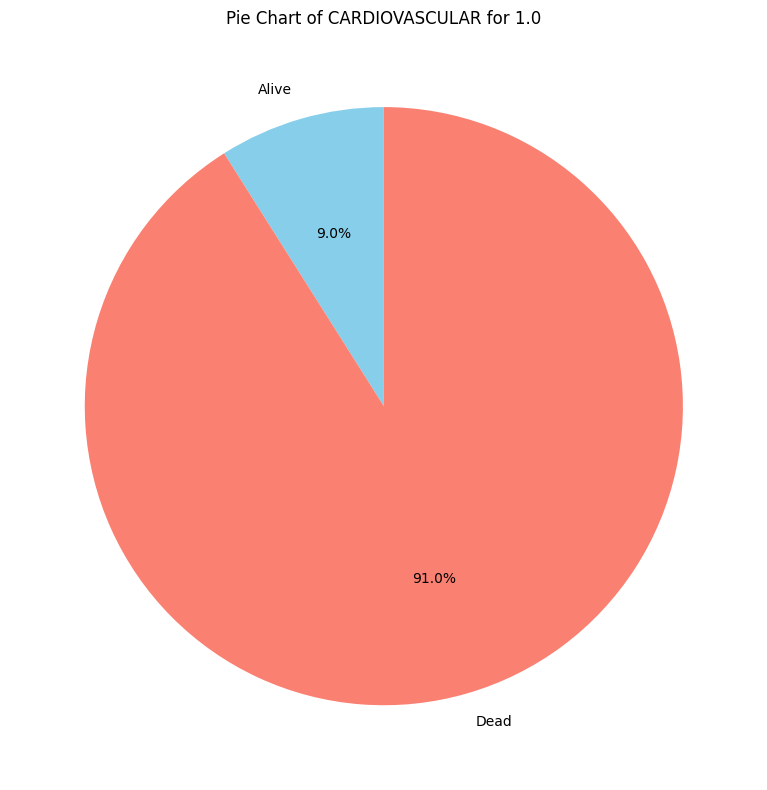

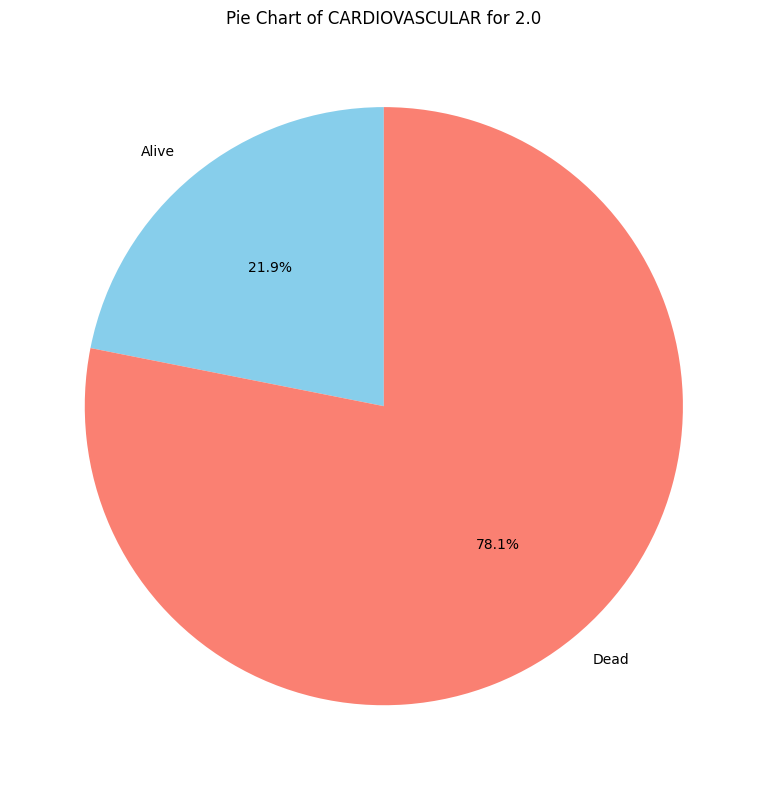

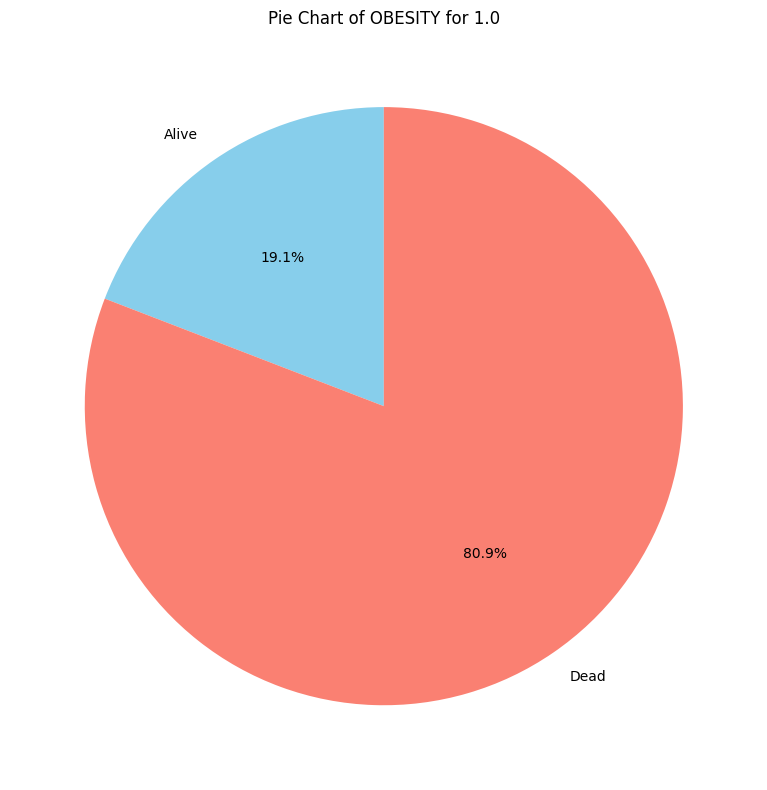

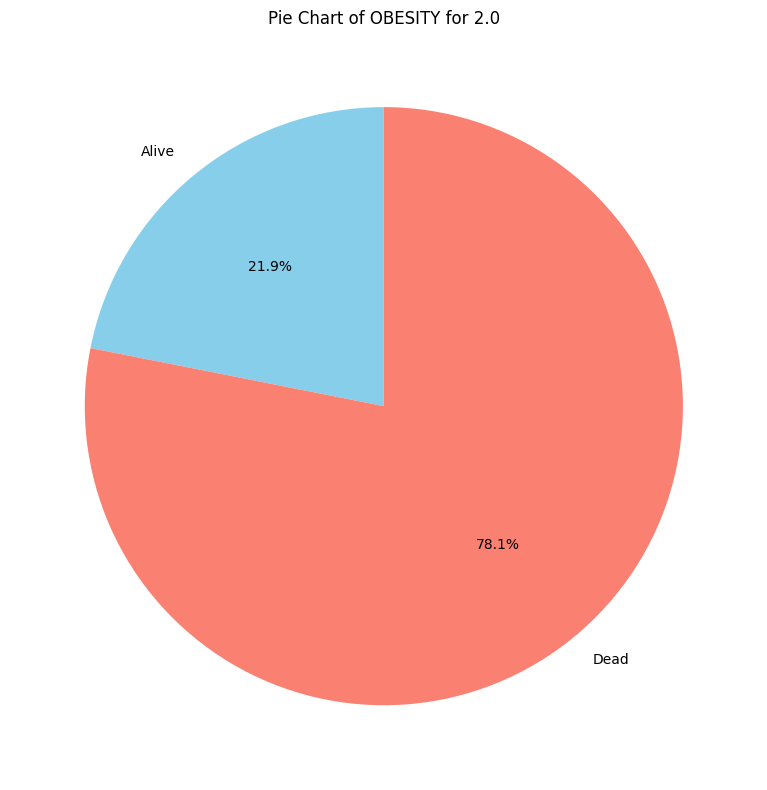

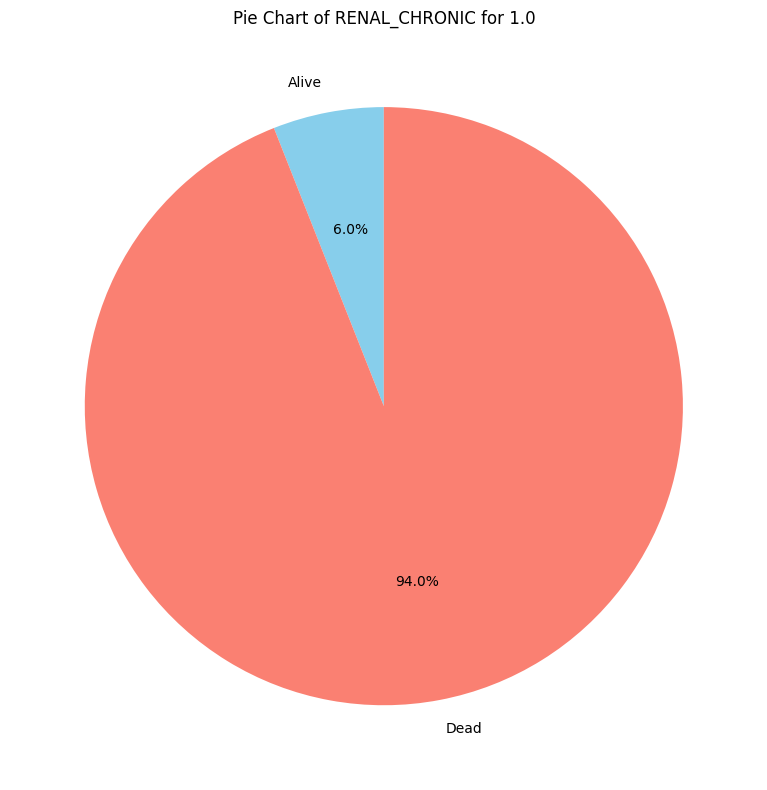

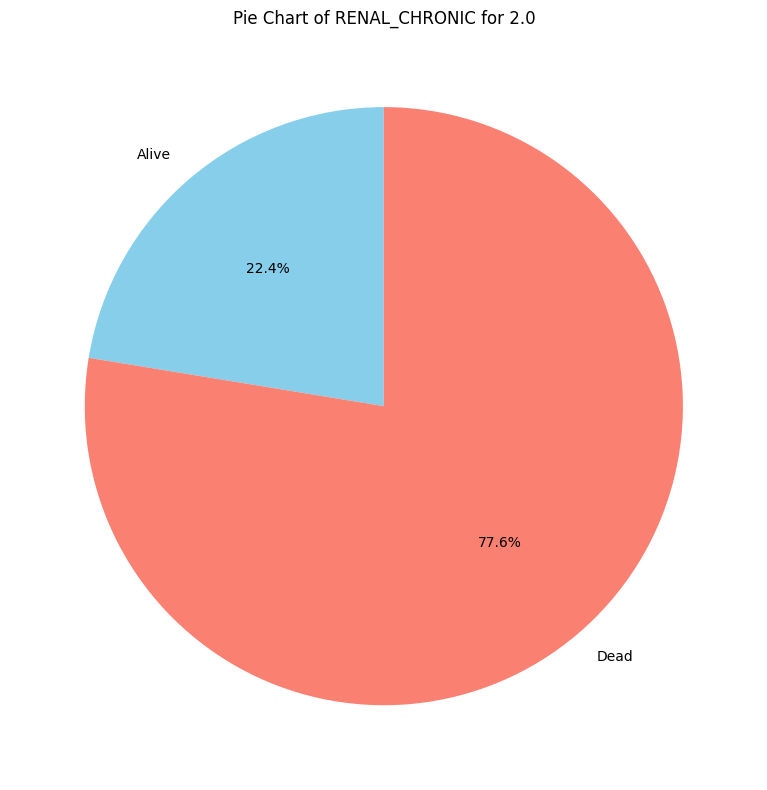

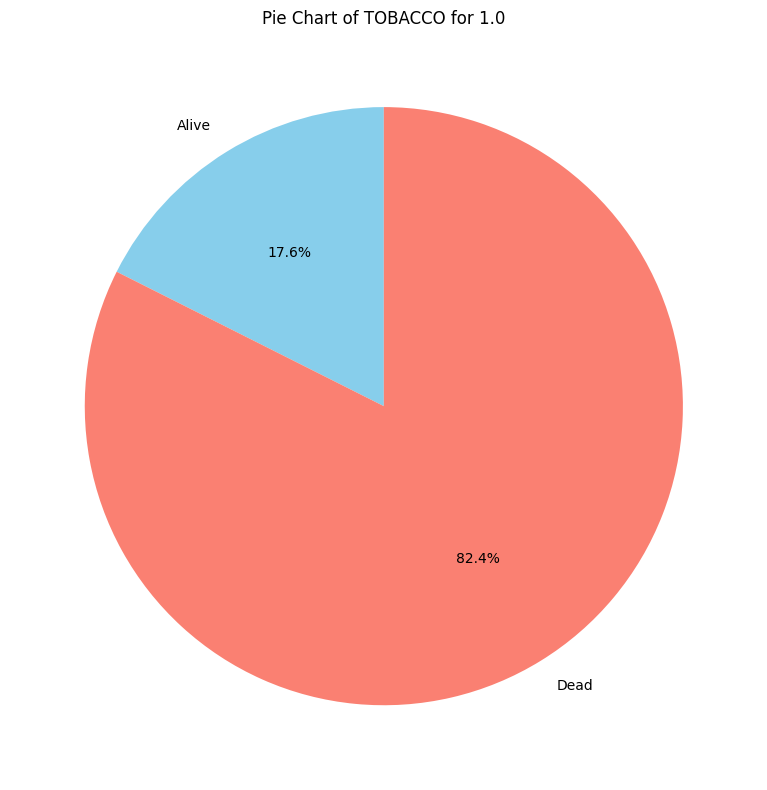

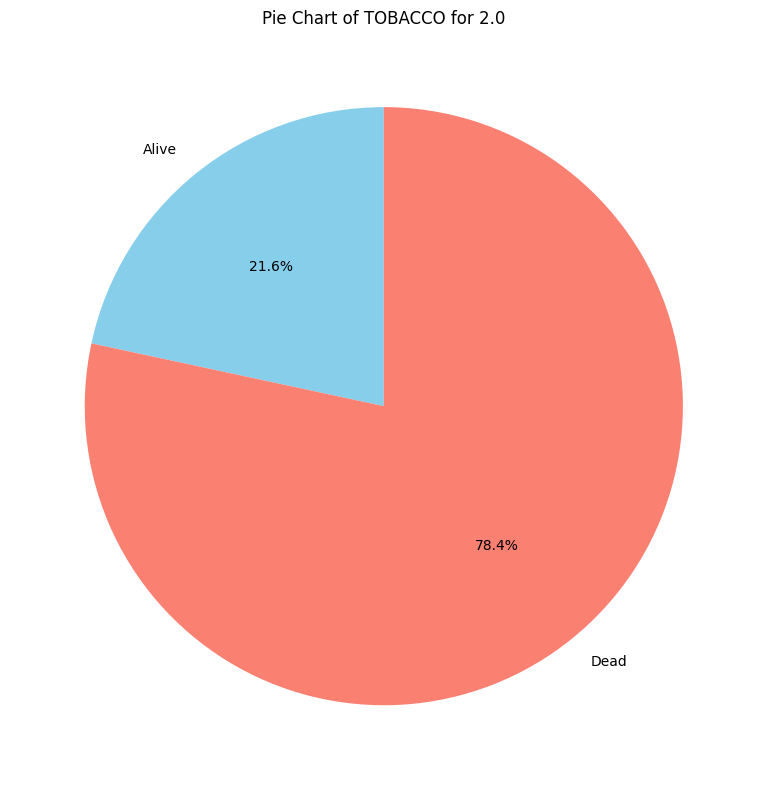

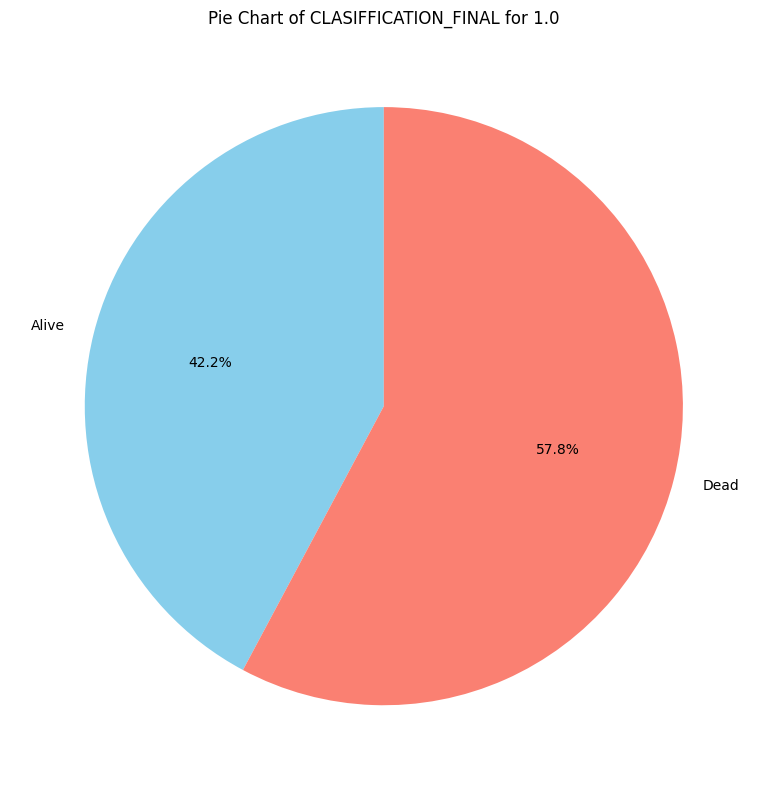

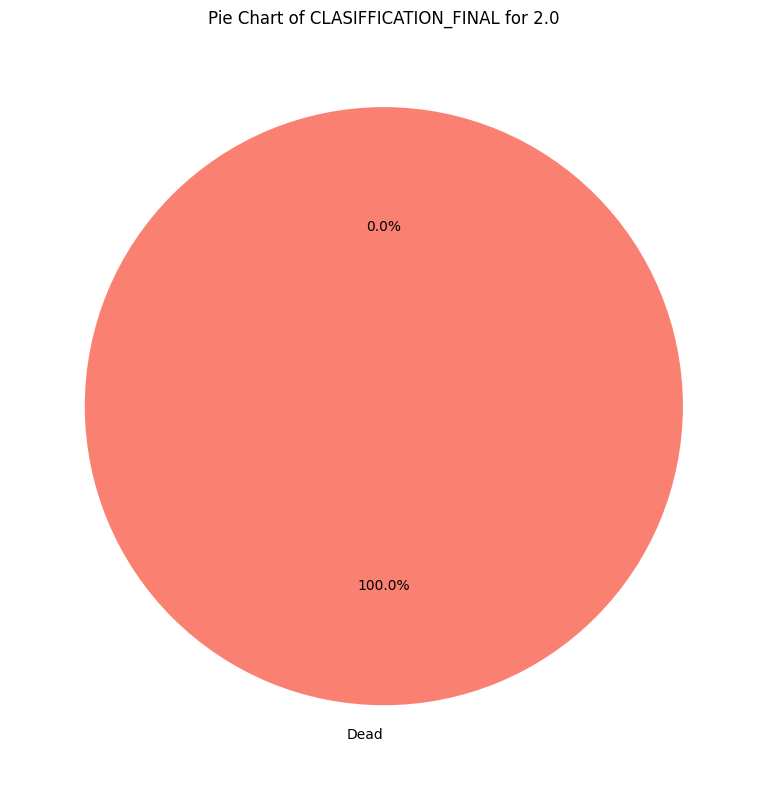

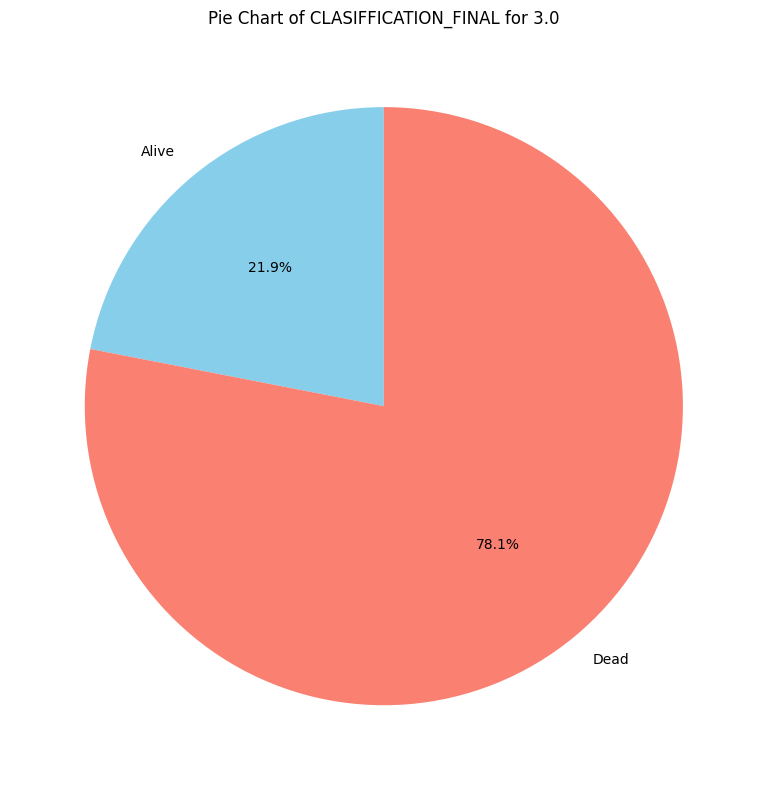

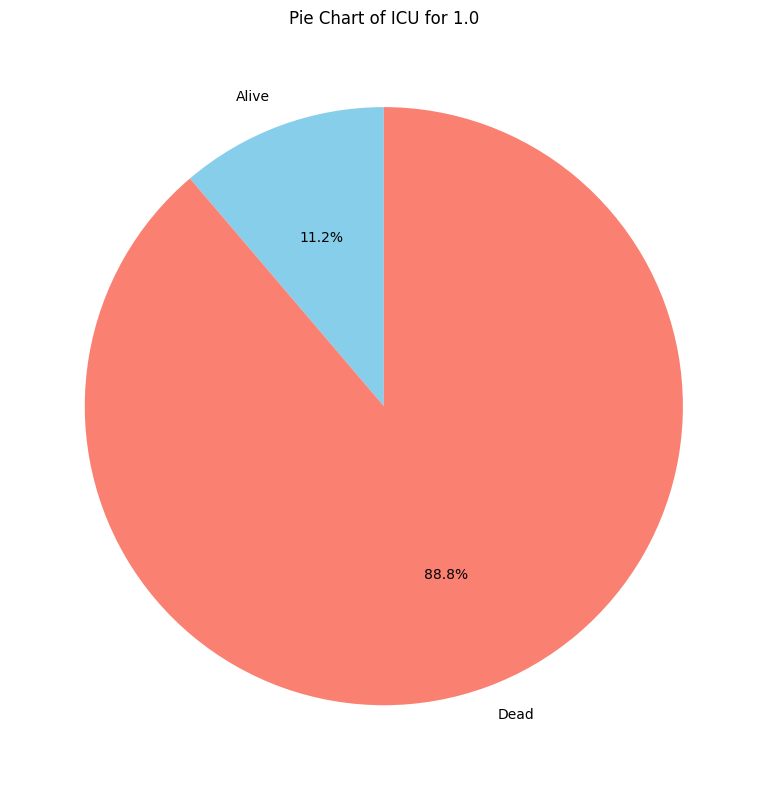

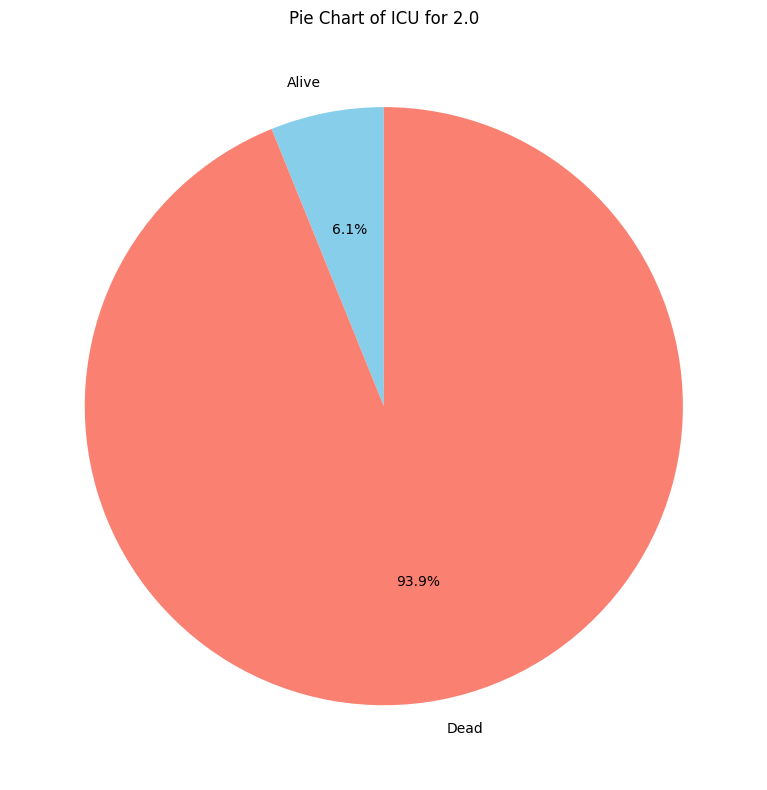

In [ ]:
# Percentage of alive and dead for each symptom
for symptom in symptoms:
  count_data = died.groupby([symptom, "DATE_DIED"]).size().unstack(fill_value=0)
  for category in count_data.index:
    plt.figure(figsize=(8, 8))
    count_data.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title(f"Pie Chart of {symptom} for {category}")
    plt.ylabel('')  # Hide y-label
    plt.tight_layout()
    plt.show()

In [ ]:
missing_values = df['CLASIFFICATION_FINAL'].isnull().sum()
missing_values

1

In [ ]:
df = df.dropna(subset=['CLASIFFICATION_FINAL'])

##### Logistic Regression (Classification Final)

In [ ]:
filtered_df = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])].copy()
filtered_df.drop(columns=["ICU", "INTUBED"], axis=1, inplace=True)
filtered_df

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  \
0          2             1    1             1  03/05/2020        1.0  65.0   
2          2             1    2             2  09/06/2020        2.0  55.0   
4          2             1    2             1  21/06/2020        2.0  68.0   
5          2             1    1             2         NaN        1.0  40.0   
6          2             1    1             1         NaN        2.0  64.0   
...      ...           ...  ...           ...         ...        ...   ...   
57964      2             4    2             2  25/07/2020        1.0  67.0   
57965      2             4    1             2  25/07/2020        1.0  84.0   
57966      2             4    2             2  25/07/2020        1.0  49.0   
57967      1             4    2             2  25/07/2020        1.0  71.0   
57968      2             4    2             2  25/07/2020        1.0  68.0   

       PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0           2.0       2.0   2.0     2.0      2.0           1.0            2.0   
2           NaN       1.0   2.0     2.0      2.0           2.0            2.0   
4           NaN       1.0   2.0     2.0      2.0           1.0            2.0   
5           2.0       2.0   2.0     2.0      2.0           2.0            2.0   
6           2.0       2.0   2.0     2.0      2.0           2.0            2.0   
...         ...       ...   ...     ...      ...           ...            ...   
57964       NaN       2.0   2.0     2.0      2.0           1.0            2.0   
57965       2.0       2.0   2.0     2.0      2.0           2.0            2.0   
57966       NaN       1.0   2.0     2.0      2.0           1.0            2.0   
57967       NaN       2.0   1.0     2.0      2.0           1.0            2.0   
57968       NaN       1.0   2.0     2.0      2.0           2.0            2.0   

       CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  
0                 2.0      2.0            2.0      2.0                   3.0  
2                 2.0      2.0            2.0      2.0                   3.0  
4                 2.0      2.0            2.0      2.0                   3.0  
5                 2.0      2.0            2.0      2.0                   3.0  
6                 2.0      2.0            2.0      2.0                   3.0  
...               ...      ...            ...      ...                   ...  
57964             2.0      2.0            2.0      2.0                   3.0  
57965             2.0      2.0            2.0      2.0                   3.0  
57966             2.0      2.0            2.0      2.0                   3.0  
57967             2.0      2.0            2.0      2.0                   3.0  
57968             2.0      2.0            2.0      2.0                   3.0  

[34946 rows x 19 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_1 = { 'accuracy': accuracy_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred, average='weighted'),
              'recall': recall_score(y_test, y_pred, average='weighted'),
              'f1': f1_score(y_test, y_pred, average='weighted')
}

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        42
         2.0       0.00      0.00      0.00       258
         3.0       0.65      0.85      0.74      6726
         4.0       0.00      0.00      0.00        41
         5.0       0.00      0.00      0.00       221
         6.0       0.11      0.00      0.00      1184
         7.0       0.50      0.45      0.47      2987

    accuracy                           0.61     11459
   macro avg       0.18      0.19      0.17     11459
weighted avg       0.52      0.61      0.56     11459



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [ ]:
X = filtered_df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = filtered_df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_2 = { 'accuracy': accuracy_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred, average='weighted'),
              'recall': recall_score(y_test, y_pred, average='weighted'),
              'f1': f1_score(y_test, y_pred, average='weighted')
}

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        46
         2.0       0.00      0.00      0.00       256
         3.0       0.96      1.00      0.98      6688

    accuracy                           0.96      6990
   macro avg       0.32      0.33      0.33      6990
weighted avg       0.92      0.96      0.94      6990



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

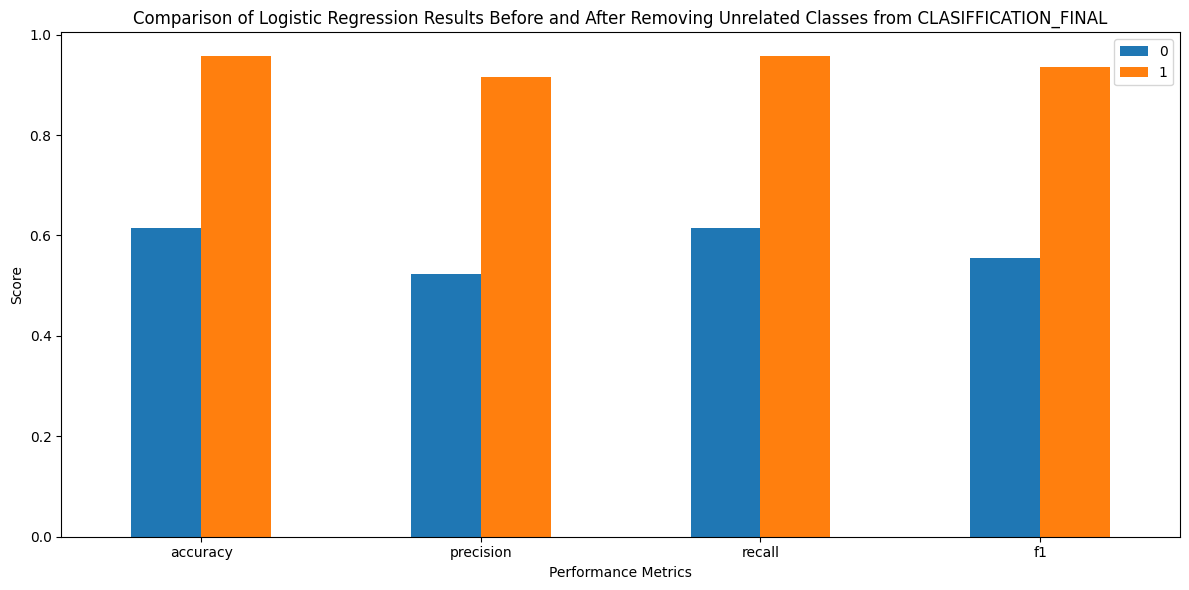

In [ ]:
results_df = pd.DataFrame([results_1, results_2])
results_df = results_df.T
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Logistic Regression Results Before and After Removing Unrelated Classes from CLASIFFICATION_FINAL")
plt.xlabel("Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()